In [18]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score


print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('matplotlib version : ', matplotlib.__version__)
print('seaborn version : ', sns.__version__)

# statistic tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


pandas version :  2.2.2
numpy version :  1.26.4
matplotlib version :  3.9.0
seaborn version :  0.13.2


In [19]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

# Load Data

In [20]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [21]:
df.sample(20)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
44396        44396   9848223   11700049      14000        14000   
144225      144225   4567077    5819360       8000         8000   
221530      221530   1219084    1460251      23500        23500   
148990      148990   4295182    5467386      12500        12500   
226501      226501   1140001    1380408      29500        29500   
62291        62291   8945965   10738037      24000        24000   
250774      250774  35063847   37747150      25000        25000   
426146      426146  13045740   15077936       3025         3025   
402306      402306  14938970   17011413      12000        12000   
274783      274783  31707879   34311056      35000        35000   
341875      341875  21730976   24053925      20000        20000   
84365        84365   7584678    4857242      16000        16000   
182206      182206   2092816    2425569       7000         7000   
152102      152102   3964800    5066951       6075         6075   
67708        67708   8224988    9967126      24000        24000   
73080        73080   8305356   10047468      28000        28000   
401006      401006  15289287   17361737      19675        19675   
113731      113731   6296816    5474417       5000         5000   
134447      134447   5435185    6817353      24000        24000   
342880      342880  21470766   23793667      35000        35000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
44396          14000.00   36 months      9.67       449.58     B        B1   
144225          8000.00   36 months     13.11       269.98     B        B4   
221530         23500.00   60 months     21.97       648.65     E        E5   
148990         12500.00   60 months     15.80       302.65     C        C3   
226501         29467.39   60 months     19.42       772.08     E        E3   
62291          24000.00   60 months     15.61       578.68     C        C3   
250774         25000.00   60 months     25.57       742.17     F        F5   
426146          3025.00   36 months     11.99       100.46     B        B3   
402306         12000.00   36 months      7.62       373.94     A        A3   
274783         35000.00   60 months     20.20       931.19     E        E3   
341875         20000.00   36 months     15.61       699.30     D        D1   
84365          16000.00   60 months     23.40       454.74     E        E5   
182206          7000.00   36 months     14.33       240.37     C        C1   
152102          6075.00   36 months     12.12       202.13     B        B3   
67708          24000.00   36 months      9.67       770.70     B        B1   
73080          28000.00   60 months     12.99       636.95     B        B4   
401006         19675.00   60 months     15.61       474.40     C        C5   
113731          5000.00   36 months     15.88       175.49     C        C4   
134447         24000.00   36 months     12.12       798.52     B        B3   
342880         34950.00   36 months     15.61      1223.77     D        D1   

                                    emp_title emp_length home_ownership  \
44396                    Financial Specialist  10+ years           RENT   
144225           NYC Department of Correction    6 years           RENT   
221530       MTS - Black Box Network Services    2 years       MORTGAGE   
148990         Massachusetts General Hospital   < 1 year           RENT   
226501                    Partners Healthcare    4 years           RENT   
62291                                     NaN        NaN       MORTGAGE   
250774                           dis operator    8 years           RENT   
426146                               cook iii     1 year           RENT   
402306                    Director of Nursing    3 years       MORTGAGE   
274783   Global Director Government Solutions    5 years            OWN   
341875                               Sergeant  10+ years       MORTGAGE   
84365                                 Teacher    7 years     

# Data Understanding & Explorating

In [22]:
df.shape

(466285, 75)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [24]:
df.isna().sum()
pd.set_option('display.max_rows', None)
print(df.isna().sum())

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [25]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())

Unique values in Unnamed: 0:
[     0      1      2 ... 466282 466283 466284]
Unique values in id:
[1077501 1077430 1077175 ... 9584776 9604874 9199665]
Unique values in member_id:
[ 1296599  1314167  1313524 ... 11436914 11457002 11061576]
Unique values in loan_amnt:
[ 5000  2500  2400 ... 33675 27775 33175]
Unique values in funded_amnt:
[ 5000  2500  2400 ... 27775 33175 31725]
Unique values in funded_amnt_inv:
[ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Unique values in term:
[' 36 months' ' 60 months']
Unique values in int_rate:
[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.

In [26]:
df.duplicated().sum()

0

In [27]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

feature  data_type   null_values   null_percentage  \
0                    Unnamed: 0      int64             0              0.00   
1                            id      int64             0              0.00   
2                     member_id      int64             0              0.00   
3                     loan_amnt      int64             0              0.00   
4                   funded_amnt      int64             0              0.00   
5               funded_amnt_inv    float64             0              0.00   
6                          term     object             0              0.00   
7                      int_rate    float64             0              0.00   
8                   installment    float64             0              0.00   
9                         grade     object             0              0.00   
10                    sub_grade     object             0              0.00   
11                    emp_title     object         27588              5.92   
12                   emp_length     object         21008              4.51   
13               home_ownership     object             0              0.00   
14                   annual_inc    float64             4              0.00   
15          verification_status     object             0              0.00   
16                      issue_d     object             0              0.00   
17                  loan_status     object             0              0.00   
18                   pymnt_plan     object             0              0.00   
19                          url     object             0              0.00   
20                         desc     object        340304             72.98   
21                      purpose     object             0              0.00   
22                        title     object            21              0.00   
23                     zip_code     object             0              0.00   
24                   addr_state     object             0              0.00   
25                          dti    float64             0              0.00   
26                  delinq_2yrs    float64            29              0.01   
27             earliest_cr_line     object            29              0.01   
28               inq_last_6mths    float64            29              0.01   
29       mths_since_last_delinq    float64        250351             53.69   
30       mths_since_last_record    float64        403647             86.57   
31                     open_acc    float64            29              0.01   
32                      pub_rec    float64            29              0.01   
33                    revol_bal      int64             0              0.00   
34                   revol_util    float64           340              0.07   
35                    total_acc    float64            29              0.01   
36          initial_list_status     object             0              0.00   
37                    out_prncp    float64             0              0.00   
38                out_prncp_inv    float64             0              0.00   
39                  total_pymnt    float64             0              0.00   
40              total_pymnt_inv    float64             0              0.00   
41              total_rec_prncp    float64             0              0.00   
42                total_rec_int    float64             0              0.00   
43           total_rec_late_fee    float64             0              0.00   
44                   recoveries    float64             0              0.00   
45      collection_recovery_fee    float64             0              0.00   
46                 last_pymnt_d     object           376              0.08   
47              last_pymnt_amnt    float64             0              0.00   
48                 next_pymnt_d     object        227214             48.73   
49           last_credit_pull_d     object            42              0.01   
50   collections_12_mths_ex_med    float64    

# Pendekatan Numerik

In [28]:
num = ['Unnamed: 0', 'id', 'member_id', 'loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

cat =['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']

date = ['issue_d', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [29]:
df[num].describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

In [30]:
df[cat].describe()

term   grade sub_grade emp_title emp_length home_ownership  \
count       466285  466285    466285    438697     445277         466285   
unique           2       7        35    205475         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        337953  136929     31686      5399     150049         235875   

       verification_status loan_status pymnt_plan  \
count               466285      466285     466285   
unique                   3           9          2   
top               Verified     Current          n   
freq                168055      224226     466276   

                                                      url    desc  \
count                                              466285  125981   
unique                                             466285  124435   
top     https://www.lendingclub.com/browse/loanDetail....           
freq                                                    1     234   

                   purpose               title zip_code addr_state  \
count               466285              466264   466285     466285   
unique                  14               63098      888         50   
top     debt_consolidation  Debt consolidation    945xx         CA   
freq                274195              164075     5304      71450   

       initial_list_status application_type  
count               466285           466285  
unique                   2                1  
top                      f       INDIVIDUAL  
freq                303005           466285

# Feature Engineering

Pemrosesan Awal Data:
Kita perlu menghapus kolom yang memiliki > 70% nilai yang hilang.

Fitur berikut adalah pengidentifikasi dan tidak dapat digunakan dalam membangun model. id, id anggota, url, judul, desc, kode pos dan emp_title

Kolom sub_grade juga akan dihilangkan karena berisi informasi yang sama dengan kolom nilai.

Fitur yang berisi informasi tentang masa depan tidak akan disertakan dalam pembuatan model karena peristiwa tersebut belum terjadi. Fitur-fiturnya termasuk next_pymnt_d, recovery, collection_recovery_fee, total_rec_prncp dan total_rec_late_fee

In [31]:
df['loan_bad'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
df.drop(columns = ['loan_status'], inplace = True)
df.drop('Unnamed: 0', inplace=True, axis=1)

1. Charged Off
Mengindikasikan pinjaman telah gagal bayar dan dianggap tidak akan dilunasi oleh peminjam.

2. Default
Secara langsung menunjukkan kegagalan pembayaran dalam jangka waktu tertentu dan dianggap tidak akan diselesaikan.

3. Late (31-120 days)
Pinjaman dengan keterlambatan pembayaran lebih dari 30 hari, dianggap berisiko tinggi untuk gagal bayar.

4. Late (16-30 days)
Walaupun keterlambatan lebih pendek, ini tetap menjadi indikator risiko kegagalan pembayaran jika tidak ditangani.

5. Does not meet the credit policy. Status: Charged Off
Mengacu pada pinjaman yang gagal bayar sekaligus tidak memenuhi kebijakan kredit, semakin mempertegas statusnya sebagai pinjaman buruk.

Bukan Bad Loan:
- Fully Paid: Pinjaman telah lunas, tidak termasuk kategori gagal bayar.
- Current: Pinjaman masih dalam pembayaran sesuai jadwal.
- In Grace Period: Pembayaran tertunda tetapi masih dalam periode tenggang yang diizinkan.
Does not meet the credit policy. Status: Fully Paid: Meskipun tidak sesuai kebijakan kredit, pinjaman telah dilunasi, sehingga bukan kategori gagal bayar.

Kesimpulan:
Pinjaman yang tergolong bad loan:
Charged Off, Default, Late (31-120 days), Late (16-30 days), dan Does not meet the credit policy. Status: Charged Off.
Kategori ini menunjukkan risiko tinggi atau sudah gagal bayar.

We will now create a variable which will facilitate us whether the loan is good or bad

good --> 0
bad --> 1

In [32]:
# Hitung jumlah masing-masing kategori dalam kolom 'loan_bad'
proporsi = df['loan_bad'].value_counts(normalize=True) * 100

# Tampilkan hasil
for kategori, persen in proporsi.items():
    jenis = "Loan Good" if kategori == 1 else "Loan Bad"
    print(f"{jenis}: {persen:.2f}%")

Loan Good: 89.07%
Loan Bad: 10.93%


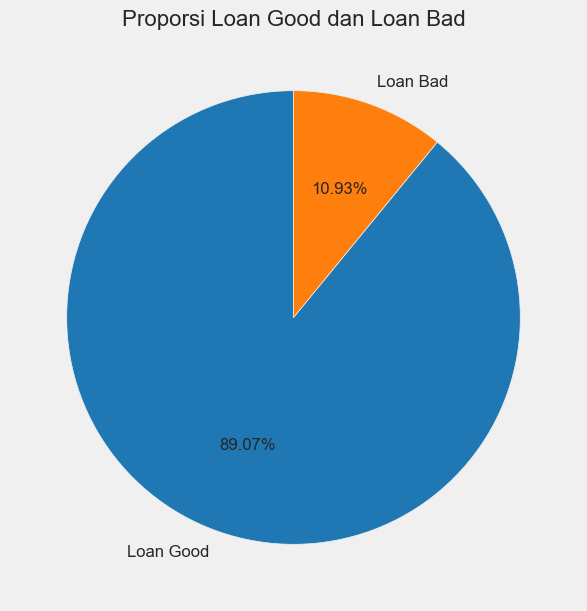

In [33]:
import matplotlib.pyplot as plt

# Hitung proporsi masing-masing kategori
proporsi = df['loan_bad'].value_counts(normalize=True) * 100

# Buat pie chart
labels = ['Loan Good', 'Loan Bad']
colors = ['#1f77b4', '#ff7f0e']  # Warna untuk masing-masing kategori
plt.figure(figsize=(7, 7))
plt.pie(proporsi, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Proporsi Loan Good dan Loan Bad', fontsize=16)
plt.show()

In [34]:
X = df.drop('loan_bad', axis = 1)
y = df['loan_bad']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [36]:
df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

   int_rate  installment grade sub_grade                  emp_title  \
0     10.65       162.87     B        B2                        NaN   
1     15.27        59.83     C        C4                      Ryder   
2     15.96        84.33     C        C5                        NaN   
3     13.49       339.31     C        C1        AIR RESOURCES BOARD   
4     12.69        67.79     B        B5   University Medical Group   
5      7.90       156.46     A        A4       Veolia Transportaton   
6     15.96       170.08     C        C5  Southern Star Photography   
7     18.64       109.43     E        E1            MKC Accounting    
8     21.28       152.39     F        F2                        NaN   
9     12.69       121.45     B        B5                  Starbucks   

  emp_length home_ownership  annual_inc verification_status issue_d  \
0  10+ years           RENT     24000.0            Verified  Dec-11   
1   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2  10+ years           RENT     12252.0        Not Verified  Dec-11   
3  10+ years           RENT     49200.0     Source Verified  Dec-11   
4     1 year           RENT     80000.0     Source Verified  Dec-11   
5    3 years           RENT     36000.0     Source Verified  Dec-11   
6    8 years           RENT     47004.0        Not Verified  Dec-11   
7    9 years           RENT     48000.0     Source Verified  Dec-11   
8    4 years            OWN     40000.0     Source Verified  Dec-11   
9   < 1 year           RENT     15000.0            Verified  Dec-11   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   
5          n  https://www.lendingclub.com/browse/loanDetail....   
6          n  https://www.lendingclub.com/browse/loanDetail....   
7          n  https://www.lendingclub.com/browse/loanDetail....   
8          n  https://www.lendingclub.com/browse/loanDetail....   
9          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11 > I own a small h...      small_business   
9    Borrower added on 12/16/11 > I'm trying to b...               other   

          

In [37]:
#cols that have > 70% missing values
missing_values = df.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729820
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [38]:
null_percentage = df.isnull().mean() * 100
print(null_percentage)

id                               0.000000
member_id                        0.000000
loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_title                        5.916553
emp_length                       4.505399
home_ownership                   0.000000
annual_inc                       0.000858
verification_status              0.000000
issue_d                          0.000000
pymnt_plan                       0.000000
url                              0.000000
desc                            72.981975
purpose                          0.000000
title                            0.004504
zip_code                         0.000000
addr_state                       0.000000
dti                              0

In [39]:
#dropping irrelevant cols & cols with missing values

columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
df.drop(columns=columns_to_drop, inplace=True, axis=1)

df.dropna(inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   181686 non-null  int64  
 1   funded_amnt                 181686 non-null  int64  
 2   funded_amnt_inv             181686 non-null  float64
 3   term                        181686 non-null  object 
 4   int_rate                    181686 non-null  float64
 5   installment                 181686 non-null  float64
 6   grade                       181686 non-null  object 
 7   emp_length                  181686 non-null  object 
 8   home_ownership              181686 non-null  object 
 9   annual_inc                  181686 non-null  float64
 10  verification_status         181686 non-null  object 
 11  issue_d                     181686 non-null  object 
 12  pymnt_plan                  181686 non-null  object 
 13  purpose        

# EDA

# Multivariate Analisis

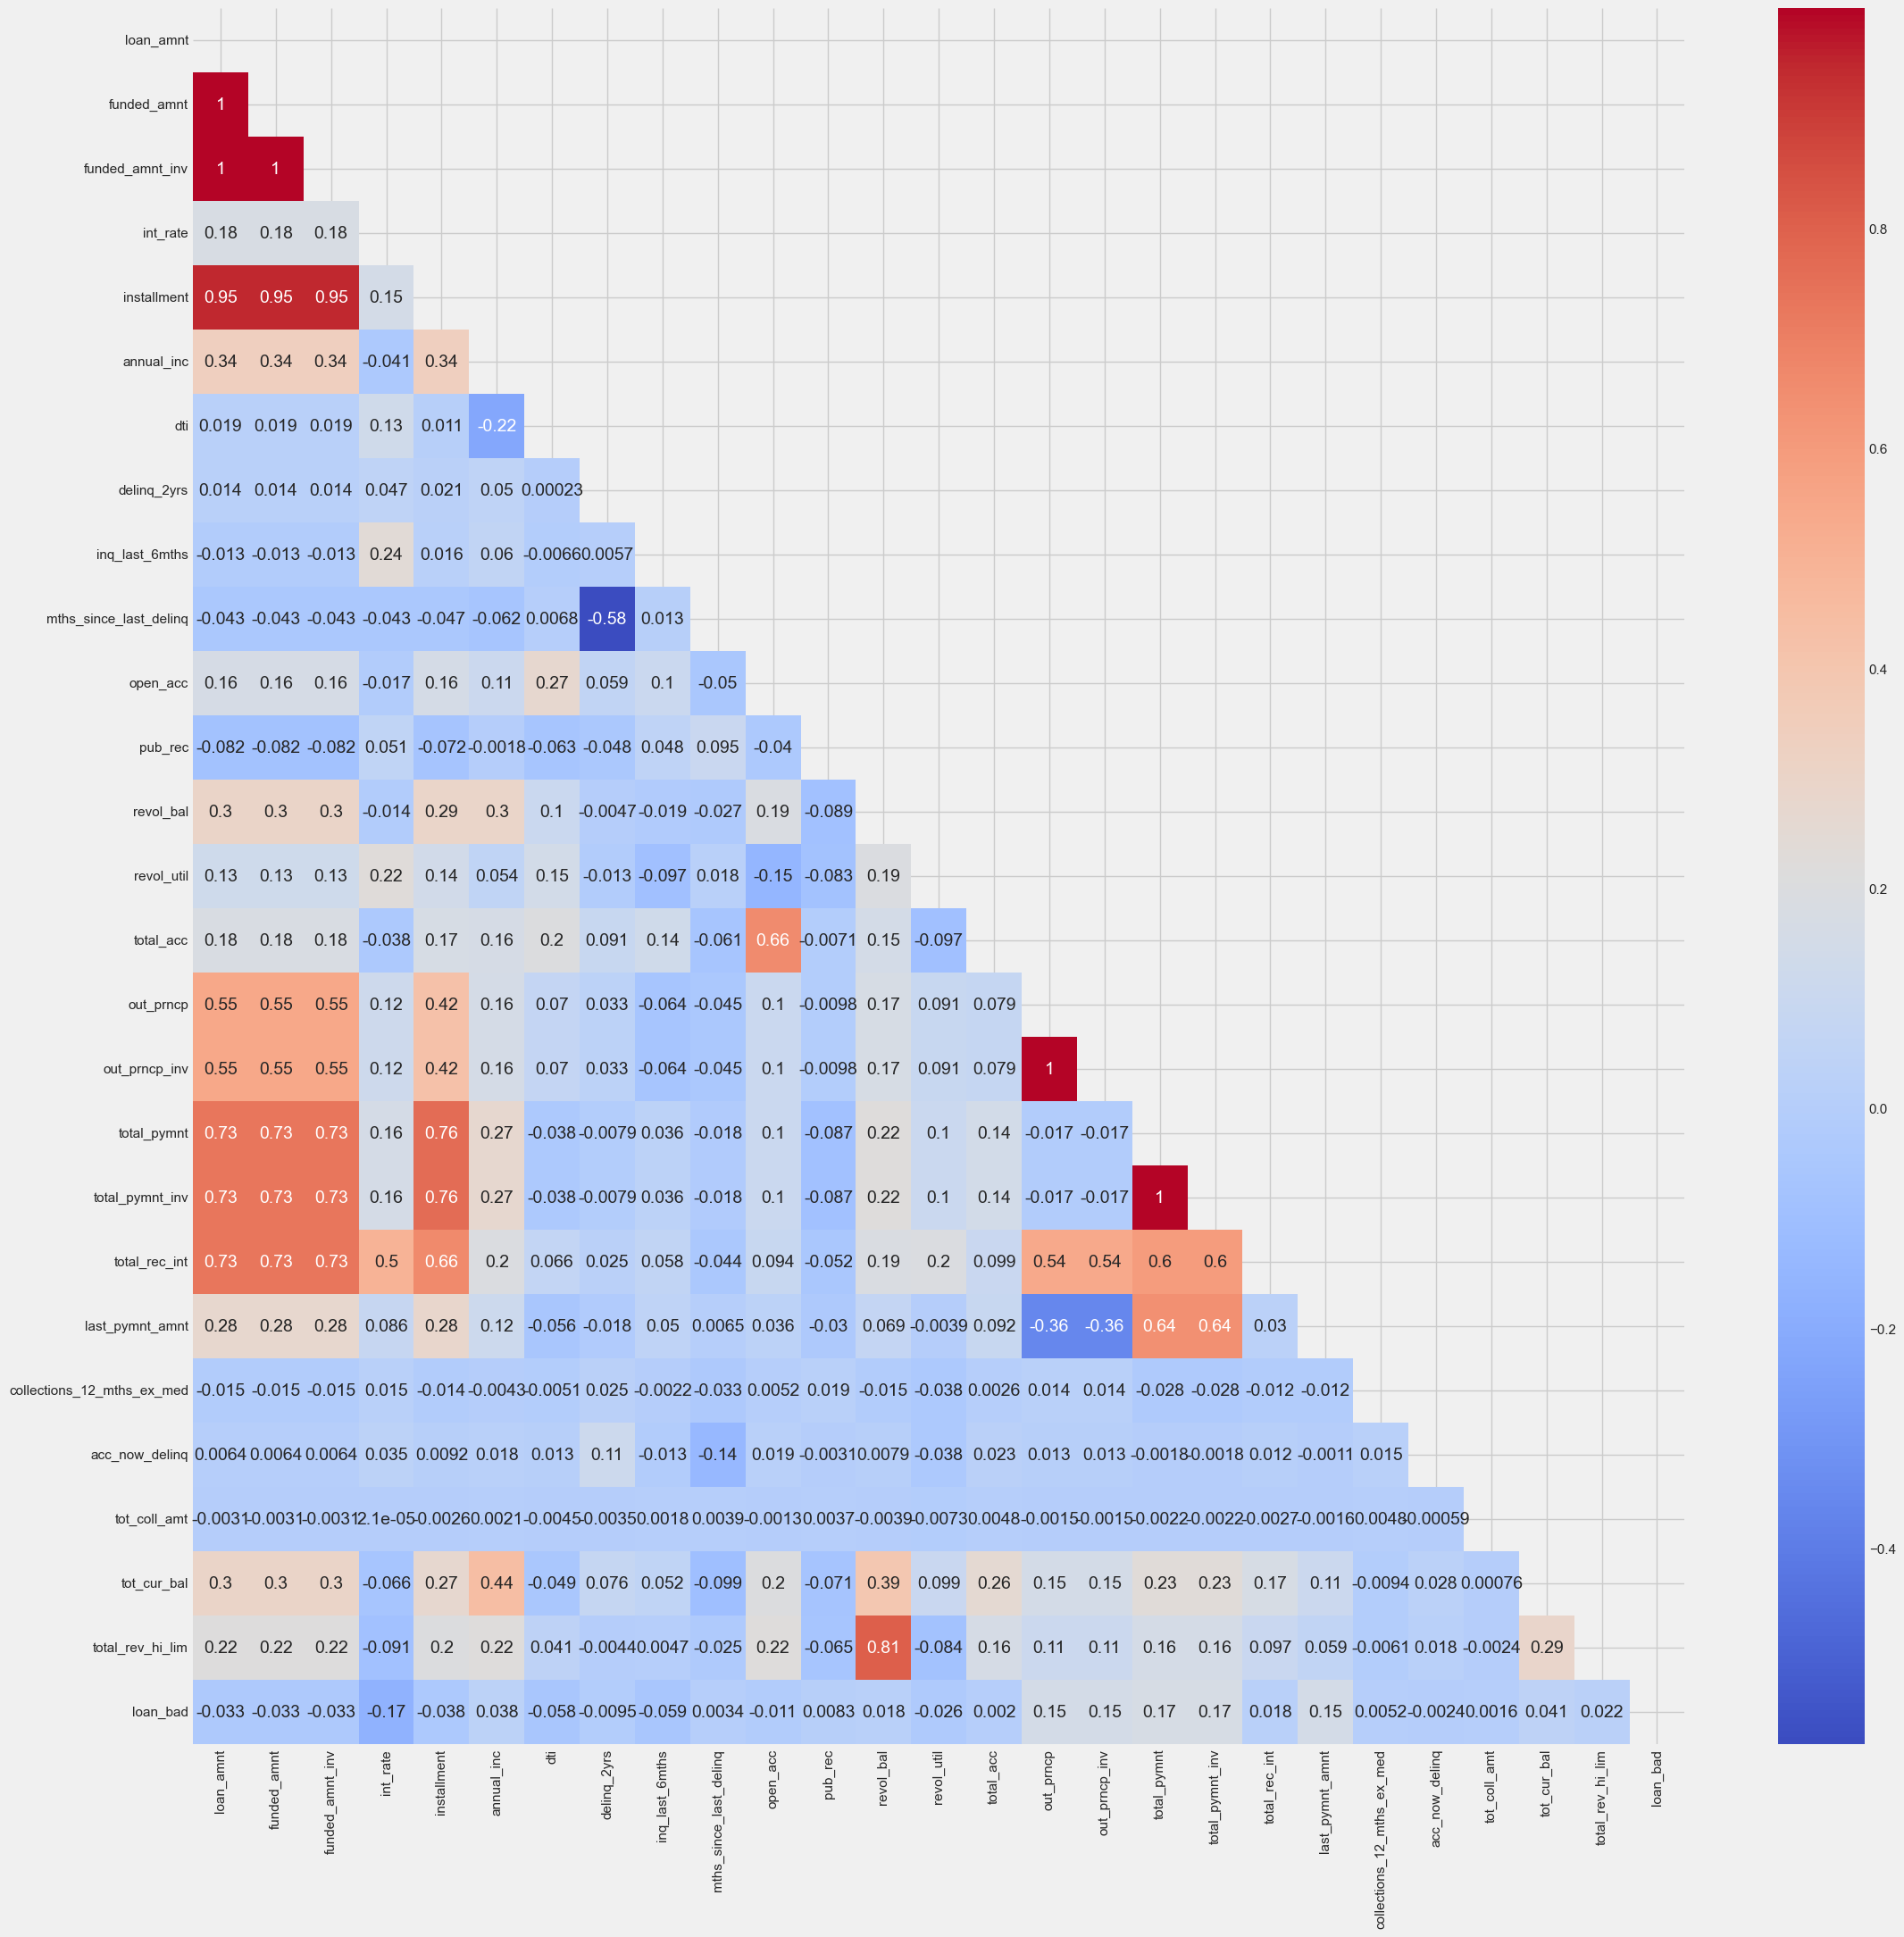

In [41]:
# Memilih kolom numerik
df_num = df.select_dtypes(include=['number'])

# Membuat mask untuk heatmap
import numpy as np
import matplotlib.pyplot as plt
mask = np.zeros_like(df_num.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plotting heatmap
plt.figure(figsize=(24, 24))
import seaborn as sns
sns.heatmap(df_num.corr(), mask=mask, annot=True, cmap='coolwarm')
plt.show()

In [42]:
columns_to_drop = ['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  
                   'total_pymnt_inv', 'out_prncp_inv', 'total_acc']
columns_in_df = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_in_df, inplace=True)

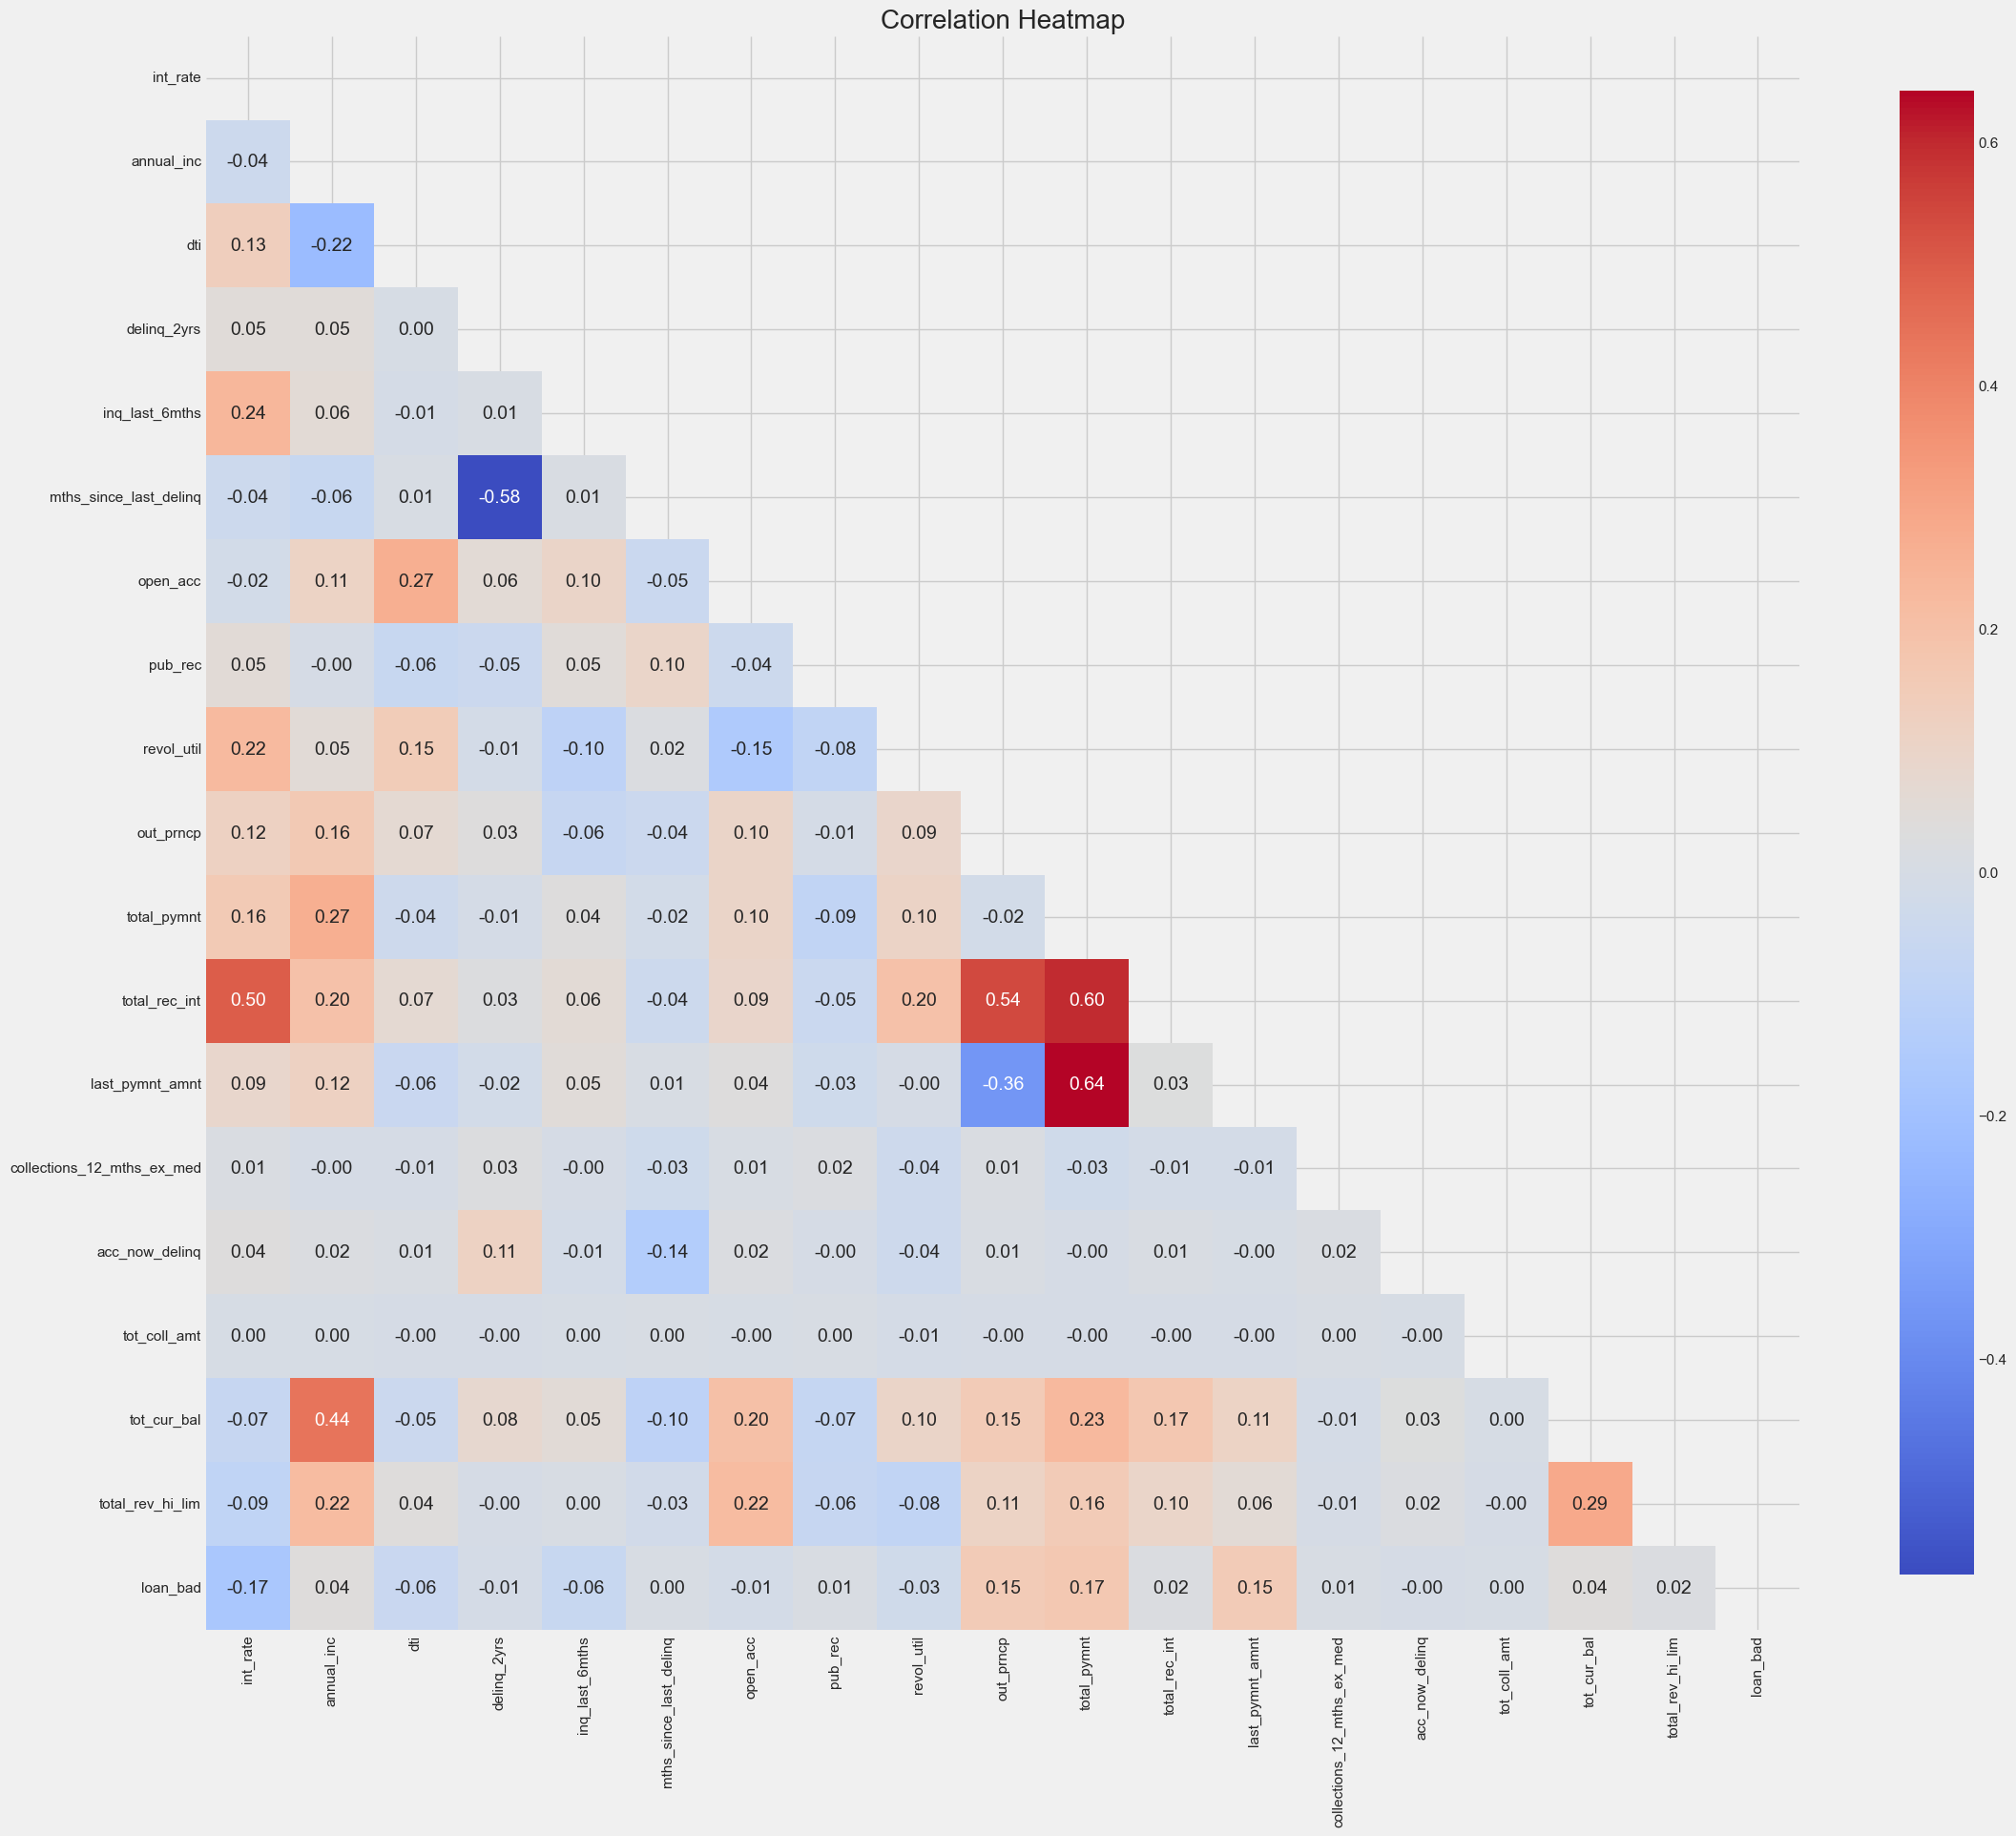

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# 2. Membersihkan nilai non-numerik tersembunyi di kolom numerik (jika ada)
for col in numeric_df.columns:
    numeric_df[col] = pd.to_numeric(numeric_df[col], errors='coerce')

# 3. Menghapus baris dengan NaN yang muncul akibat konversi
numeric_df.dropna(inplace=True)

# 4. Menghitung matriks korelasi
corr_matrix = numeric_df.corr()

# 5. Membuat mask untuk heatmap (segitiga atas)
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# 6. Plot heatmap korelasi
plt.figure(figsize=(24, 24))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_cr_lin

In [45]:
df.sample(10)

term  int_rate grade emp_length home_ownership  annual_inc  \
376919   36 months     14.99     C  10+ years            OWN    133000.0   
307560   36 months      7.12     A  10+ years            OWN    109000.0   
188176   36 months     14.09     B    5 years       MORTGAGE     56441.0   
393910   36 months     15.31     C    2 years       MORTGAGE     82000.0   
377121   36 months     17.57     D    8 years           RENT     90000.0   
406864   60 months     21.99     E    7 years           RENT     52000.0   
178228   36 months     13.11     B     1 year       MORTGAGE     80000.0   
136354   36 months     13.11     B    8 years       MORTGAGE    110000.0   
116576   60 months     11.55     B    9 years           RENT     52000.0   
356979   36 months     11.67     B    8 years           RENT    125000.0   

       verification_status issue_d pymnt_plan             purpose addr_state  \
376919     Source Verified  Jun-14          n  debt_consolidation         NJ   
307560        Not Verified  Sep-14          n      major_purchase         CA   
188176            Verified  Nov-12          n  debt_consolidation         NC   
393910            Verified  May-14          n    home_improvement         CA   
377121            Verified  Jun-14          n  debt_consolidation         CA   
406864     Source Verified  Apr-14          n  debt_consolidation         AZ   
178228            Verified  Dec-12          n         credit_card         NM   
136354     Source Verified  May-13          n         credit_card         NJ   
116576            Verified  Jul-13          n         credit_card         AZ   
356979        Not Verified  Jul-14          n         credit_card         CA   

          dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
376919  15.71          2.0           Jul-93             0.0   
307560   1.55          0.0           Sep-01             0.0   
188176   5.34          0.0           Mar-01             3.0   
393910   8.20          0.0           Apr-02             1.0   
377121  20.53          1.0           Jun-95             3.0   
406864  16.59          0.0           May-96             1.0   
178228  12.54          0.0           Feb-97             0.0   
136354  18.25          0.0           Aug-99             1.0   
116576  18.42          0.0           Jul-95             0.0   
356979  10.88          2.0           Oct-01             0.0   

        mths_since_last_delinq  open_acc  pub_rec  revol_util  \
376919                     3.0      20.0      0.0        69.1   
307560                    41.0       5.0      0.0        20.3   
188176                    37.0      14.0      0.0        39.5   
393910                    51.0       8.0      0.0        47.7   
377121                    10.0      15.0      1.0        72.9   
406864                    69.0       6.0      1.0        68.9   
178228                    34.0      12.0      0.0        82.7   
136354                    35.0      14.0      1.0        64.4   
116576                    52.0      16.0      0.0        24.8   
356979                     5.0       9.0      0.0        87.8   

       initial_list_status  out_prncp   total_pymnt  total_rec_int  \
376919                   w       0.00  22281.570000        2281.58   
307560                   f    3199.39   2722.080000         421.47   
188176                   f       0.00   1706.150000          73.97   
393910                   f       0.00   7281.080000         881.08   
377121                   w       0.00  10317.710000        1742.71   
406864                   w   11470.32   8698.200000        5168.52   
178228                   f       0.00  35766.895410        5766.90   
136354                   w       0.00   4599.560517         599.56   
116576                   f   10284.95  11888.480000        4173.43   
356979                   f    8694.88   9520.560000        2215.44   

       last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
376919       May-15           305.75             Jan-16 

In [46]:
df.describe()

int_rate    annual_inc            dti    delinq_2yrs  \
count  181686.000000  1.816860e+05  181686.000000  181686.000000   
mean       14.449868  7.886698e+04      17.389873       0.638040   
std         4.252272  6.078531e+04       7.787230       1.104461   
min         6.000000  4.000000e+03       0.000000       0.000000   
25%        11.670000  5.000000e+04      11.530000       0.000000   
50%        14.160000  6.800000e+04      16.910000       0.000000   
75%        17.140000  9.402825e+04      22.900000       1.000000   
max        26.060000  7.500000e+06      39.990000      29.000000   

       inq_last_6mths  mths_since_last_delinq       open_acc        pub_rec  \
count   181686.000000           181686.000000  181686.000000  181686.000000   
mean         0.822942               33.724167      11.756382       0.189244   
std          1.059299               21.716923       4.997763       0.557625   
min          0.000000                0.000000       1.000000       0.000000   
25%          0.000000               15.000000       8.000000       0.000000   
50%          0.000000               30.000000      11.000000       0.000000   
75%          1.000000               49.000000      14.000000       0.000000   
max          7.000000              188.000000      84.000000      21.000000   

          revol_util      out_prncp    total_pymnt  total_rec_int  \
count  181686.000000  181686.000000  181686.000000  181686.000000   
mean       56.548318    5291.496180   11215.608032    2679.857733   
std        22.583195    6660.857513    7986.951463    2470.226061   
min         0.000000       0.000000      35.690000       0.000000   
25%        40.300000       0.000000    5485.875000    1037.310000   
50%        57.400000    2637.215000    9127.115000    1925.520000   
75%        73.900000    8883.127500   14685.300000    3432.090000   
max       892.300000   31898.770000   56087.909920   21840.000000   

       last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  \
count    181686.000000               181686.000000   181686.000000   
mean       3146.519033                    0.016418        0.009808   
std        5633.250884                    0.149082        0.107319   
min           0.010000                    0.000000        0.000000   
25%         321.130000                    0.000000        0.000000   
50%         539.810000                    0.000000        0.000000   
75%        3048.777500                    0.000000        0.000000   
max       36170.140000                   20.000000        5.000000   

       tot_coll_amt   tot_cur_bal  total_rev_hi_lim       loan_bad  
count  1.816860e+05  1.816860e+05      1.816860e+05  181686.000000  
mean   3.263843e+02  1.505644e+05      2.735155e+04       0.901897  
std    2.157745e+04  1.595617e+05      4.243696e+04       0.297455  
min    0.000000e+00  0.000000e+00      1.000000e+02       0.000000  
25%    0.000000e+00  3.245125e+04      1.230000e+04       1.000000  
50%    0.000000e+00  9.847150e+04      2.060000e+04       1.000000  
75%    0.000000e+00  2.255148e+05      3.400000e+04       1.000000  
max    9.152545e+06  8.000078e+06      9.999999e+06       1.000000

# Univariate Analysis 

In [47]:
numb = [
    'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
    'open_acc', 'pub_rec', 'revol_util', 'out_prncp', 'total_pymnt', 'total_rec_int', 
    'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 
    'tot_cur_bal', 'total_rev_hi_lim', 'loan_bad'
]

cate = [
    'term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 
    'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 
    'last_pymnt_d', 'last_credit_pull_d', 'application_type']

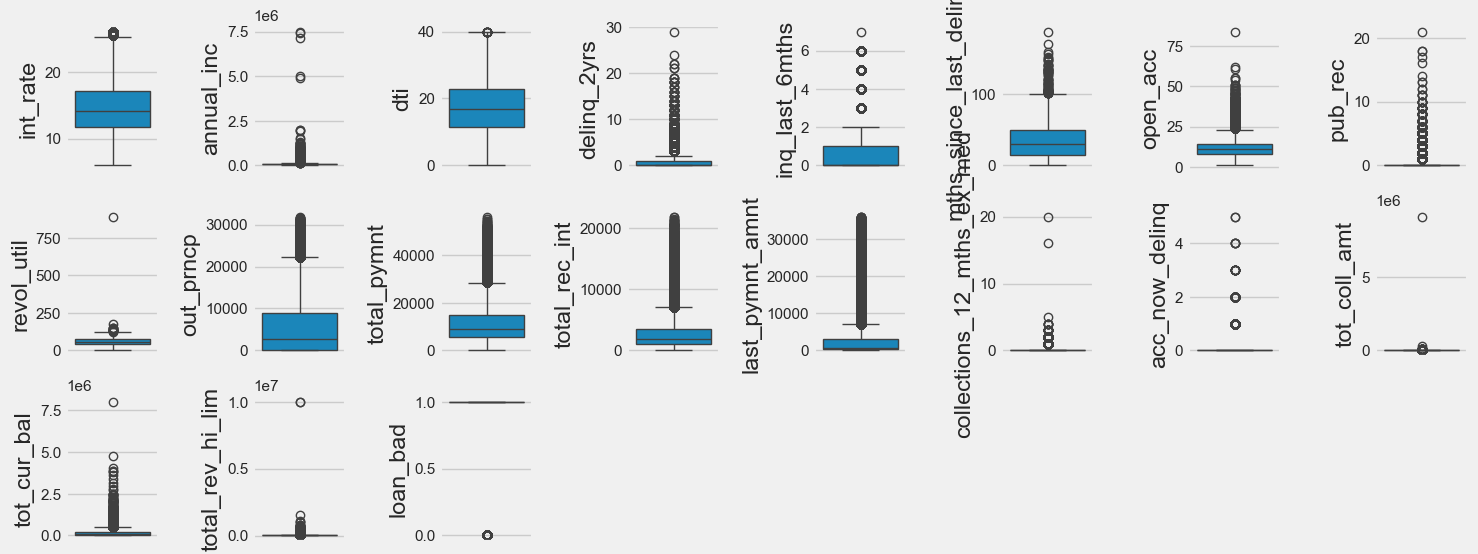

In [48]:
num = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 15))
for i in range(len(numb)):
    plt.subplot(8, 8, i + 1)
    sns.boxplot(y=df[numb[i]], orient='v')
    plt.tight_layout()

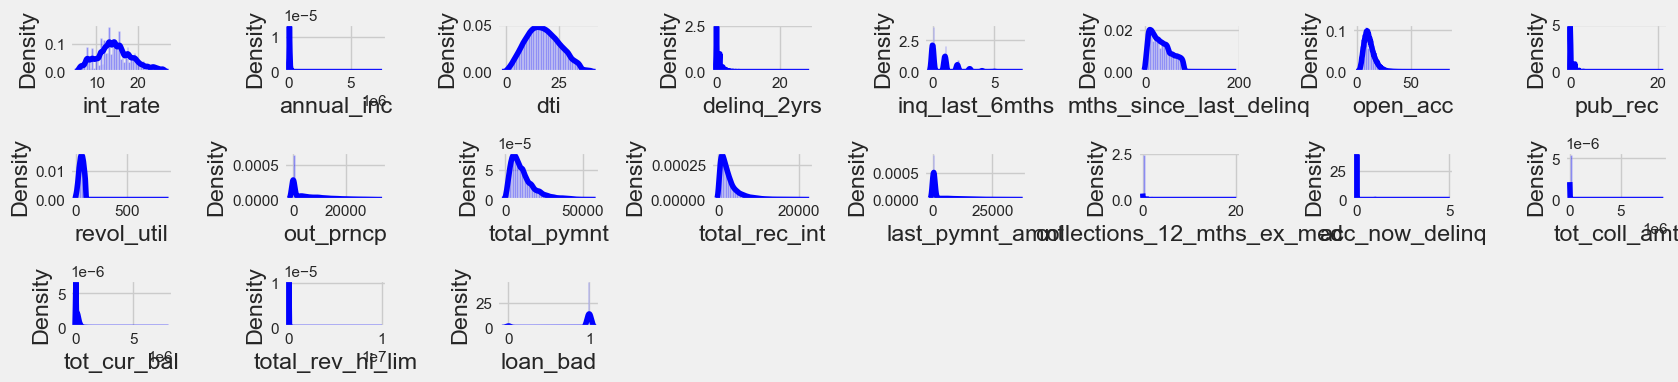

In [49]:
# cek distribusi menggunakan distplot:
plt.figure(figsize=(17, 10))
for i in range(0, len(numb)):
    plt.subplot(8, 8, i+1)
    sns.distplot(df[numb[i]], color = 'blue')
    plt.tight_layout()
plt.show()

# Bivariate Analisis

#### 1. Kombinasi Numerik vs Kategorikal

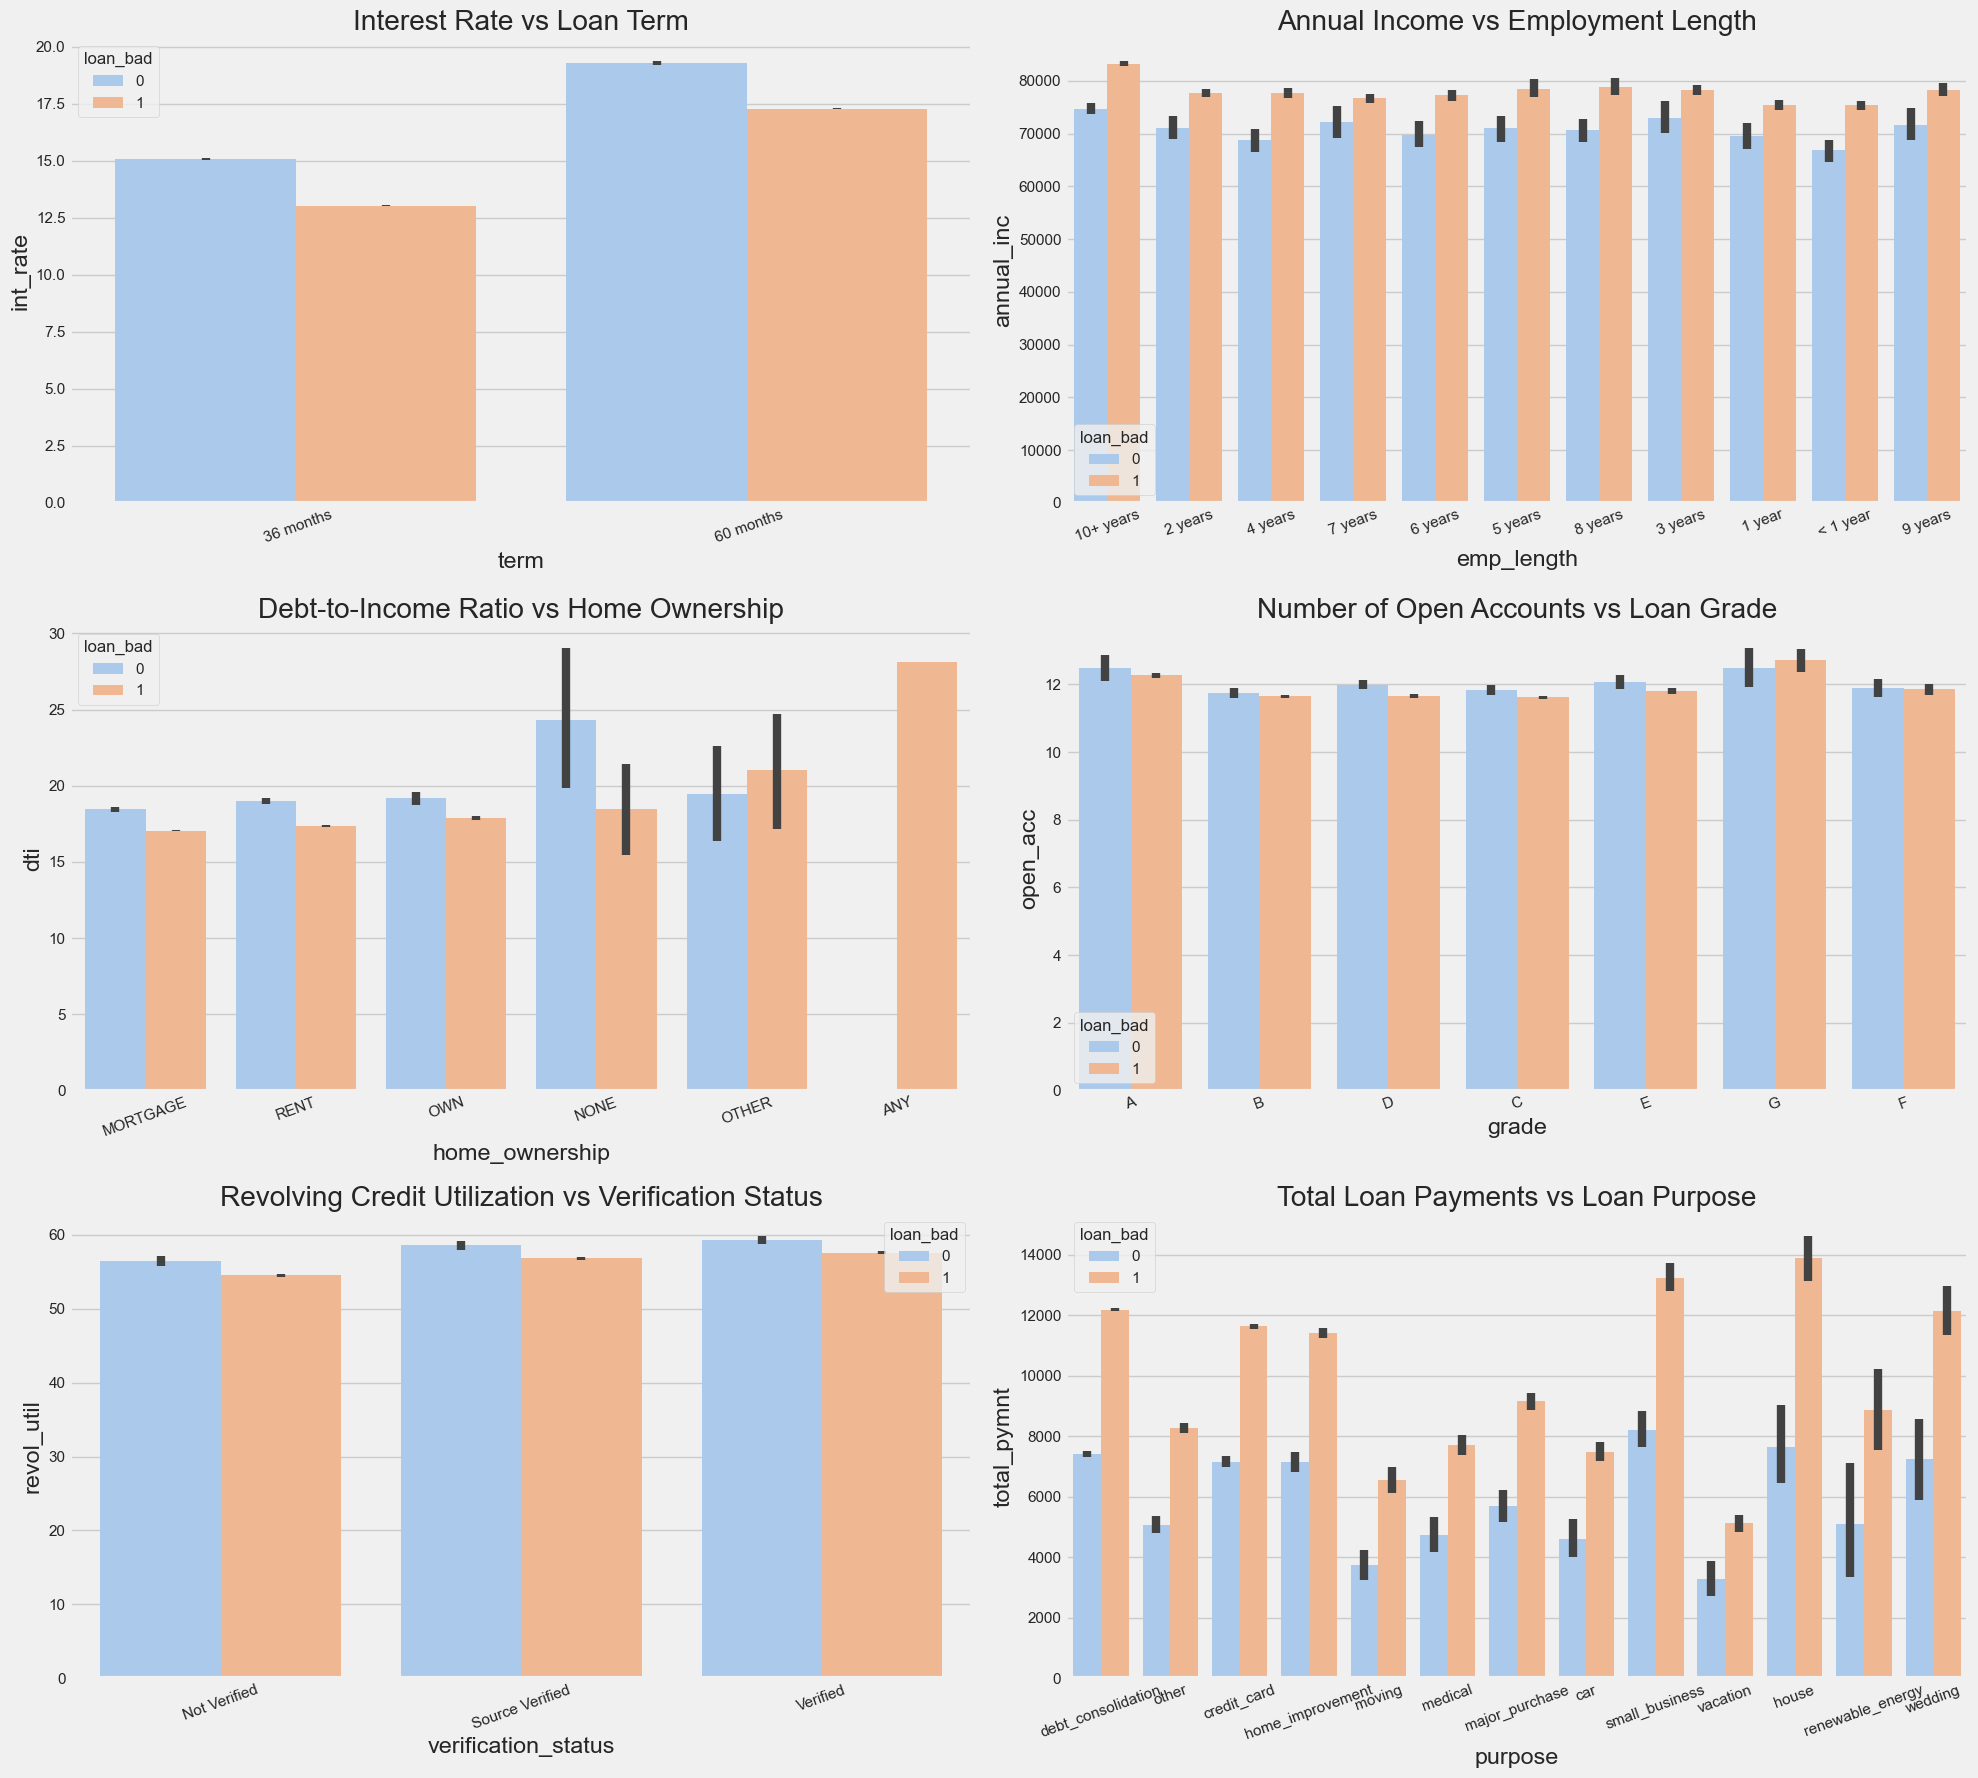

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set size for the plots
plt.figure(figsize=(20, 18))

# Soft color palette (you can also use other color palettes like 'pastel', 'muted', etc.)
soft_palette = sns.color_palette("pastel")

# 1. Interest Rate (int_rate) vs Loan Term (term) using barplot
plt.subplot(3, 2, 1)
sns.barplot(x='term', y='int_rate', data=df, hue='loan_bad', palette=soft_palette, edgecolor='none')
plt.xticks(rotation=20)
plt.title('Interest Rate vs Loan Term')

# 2. Annual Income (annual_inc) vs Employment Length (emp_length) using barplot
plt.subplot(3, 2, 2)
sns.barplot(x='emp_length', y='annual_inc', data=df, hue='loan_bad', palette=soft_palette, edgecolor='none')
plt.xticks(rotation=20)
plt.title('Annual Income vs Employment Length')

# 3. Debt-to-Income Ratio (dti) vs Home Ownership (home_ownership) using barplot
plt.subplot(3, 2, 3)
sns.barplot(x='home_ownership', y='dti', data=df, hue='loan_bad', palette=soft_palette, edgecolor='none')
plt.xticks(rotation=20)
plt.title('Debt-to-Income Ratio vs Home Ownership')

# 4. Number of Open Accounts (open_acc) vs Loan Grade (grade) using barplot
plt.subplot(3, 2, 4)
sns.barplot(x='grade', y='open_acc', data=df, hue='loan_bad', palette=soft_palette, edgecolor='none')
plt.xticks(rotation=20)
plt.title('Number of Open Accounts vs Loan Grade')

# 5. Revolving Credit Utilization (revol_util) vs Verification Status (verification_status) using barplot
plt.subplot(3, 2, 5)
sns.barplot(x='verification_status', y='revol_util', data=df, hue='loan_bad', palette=soft_palette, edgecolor='none')
plt.xticks(rotation=20)
plt.title('Revolving Credit Utilization vs Verification Status')

# 6. Total Loan Payments (total_pymnt) vs Loan Purpose (purpose) using barplot
plt.subplot(3, 2, 6)
sns.barplot(x='purpose', y='total_pymnt', data=df, hue='loan_bad', palette=soft_palette, edgecolor='none')
plt.xticks(rotation=20)
plt.title('Total Loan Payments vs Loan Purpose')

# Show the plots
plt.tight_layout()
plt.show()

1. Interest Rate vs Loan Term
Interpretasi:
Grafik menunjukkan bahwa tingkat bunga (interest rate) untuk pinjaman dengan durasi 60 bulan sedikit lebih rendah daripada pinjaman dengan durasi 36 bulan, baik untuk pinjaman yang baik (loan_bad=0) maupun buruk (loan_bad=1).
Tidak ada perbedaan yang mencolok antara kategori loan_bad=0 dan loan_bad=1, meskipun ada sedikit perbedaan pada tingkat bunga untuk pinjaman dengan durasi lebih panjang.
2. Annual Income vs Employment Length
Interpretasi:
Secara umum, grafik menunjukkan bahwa pendapatan tahunan (annual income) lebih tinggi untuk kategori "10+ years" dalam durasi pekerjaan (employment length), baik untuk pinjaman yang baik (loan_bad=0) maupun buruk (loan_bad=1).
Tidak ada perbedaan signifikan antara kedua kategori loan_bad dalam masing-masing kelompok durasi pekerjaan. Namun, terlihat bahwa beberapa kategori (misalnya, "1 year" dan "3 years") menunjukkan sedikit perbedaan antara loan_bad=0 dan loan_bad=1, di mana pendapatan untuk pinjaman buruk lebih rendah.
3. Debt-to-Income Ratio vs Home Ownership
Interpretasi:
Grafik ini menunjukkan rasio utang terhadap pendapatan (debt-to-income ratio, DTI) berdasarkan status kepemilikan rumah.
Tidak ada perbedaan besar dalam rasio DTI antara kategori loan_bad=0 dan loan_bad=1, meskipun kategori OWN dan NONE menunjukkan rasio yang lebih tinggi dibandingkan kategori MORTGAGE dan RENT. Hal ini menunjukkan bahwa mereka yang tidak memiliki rumah atau yang memiliki rumah mungkin lebih cenderung memiliki rasio utang yang lebih tinggi.
4. Number of Open Accounts vs Loan Grade
Interpretasi:
Jumlah akun terbuka (open accounts) sedikit lebih tinggi untuk pinjaman baik (loan_bad=0) di semua kategori loan grade.
Perbedaan antara kategori loan_bad=0 dan loan_bad=1 terlihat kecil, meskipun ada sedikit peningkatan pada kategori loan_bad=0 di sebagian besar grade pinjaman (A, B, C).
Secara umum, pinjaman dengan grade yang lebih baik (A, B) memiliki jumlah akun terbuka yang lebih tinggi dibandingkan dengan pinjaman yang lebih rendah (C, D, dan seterusnya).
5. Revolving Credit Utilization vs Verification Status
Interpretasi:
Utilisasi kredit berputar (revolving credit utilization) hampir serupa antara kategori loan_bad=0 dan loan_bad=1 di semua status verifikasi.
Tidak ada perbedaan yang jelas antara loan_bad=0 dan loan_bad=1, meskipun sedikit lebih tinggi untuk status "Verified".
6. Total Loan Payments vs Loan Purpose
Interpretasi:
Pembayaran total pinjaman (total loan payments) untuk tujuan pinjaman home_improvement dan education lebih tinggi dibandingkan dengan kategori lainnya, baik untuk pinjaman baik (loan_bad=0) maupun buruk (loan_bad=1).
Pada kategori tujuan pinjaman lain seperti medical dan renewable_energy juga terlihat perbedaan signifikan dalam jumlah pembayaran total, dengan loan_bad=0 cenderung lebih tinggi dibandingkan dengan loan_bad=1.
Hal ini menunjukkan bahwa tujuan pinjaman seperti home_improvement dan education mungkin lebih mengarah ke pinjaman yang lebih besar atau lebih stabil dalam hal pembayaran dibandingkan dengan kategori lainnya.

Kesimpulan:
Secara keseluruhan, grafik ini memberikan wawasan yang berharga terkait hubungan antara berbagai fitur numerik dan kategorikal dengan status pinjaman baik atau buruk (loan_bad).
Pinjaman dengan status baik (loan_bad=0) cenderung memiliki karakteristik tertentu, seperti pendapatan yang lebih tinggi dan lebih banyak akun terbuka, sementara pinjaman buruk (loan_bad=1) sering kali memiliki karakteristik yang lebih rendah pada fitur-fitur seperti annual income, open accounts, dan loan payments.

Hal ini dapat memberikan indikasi bahwa variabel seperti annual income, open accounts, dan loan grade dapat digunakan untuk memperkirakan kemungkinan status pinjaman yang buruk.

#### 2. Kombinasi Kategorikal vs Kategorikal

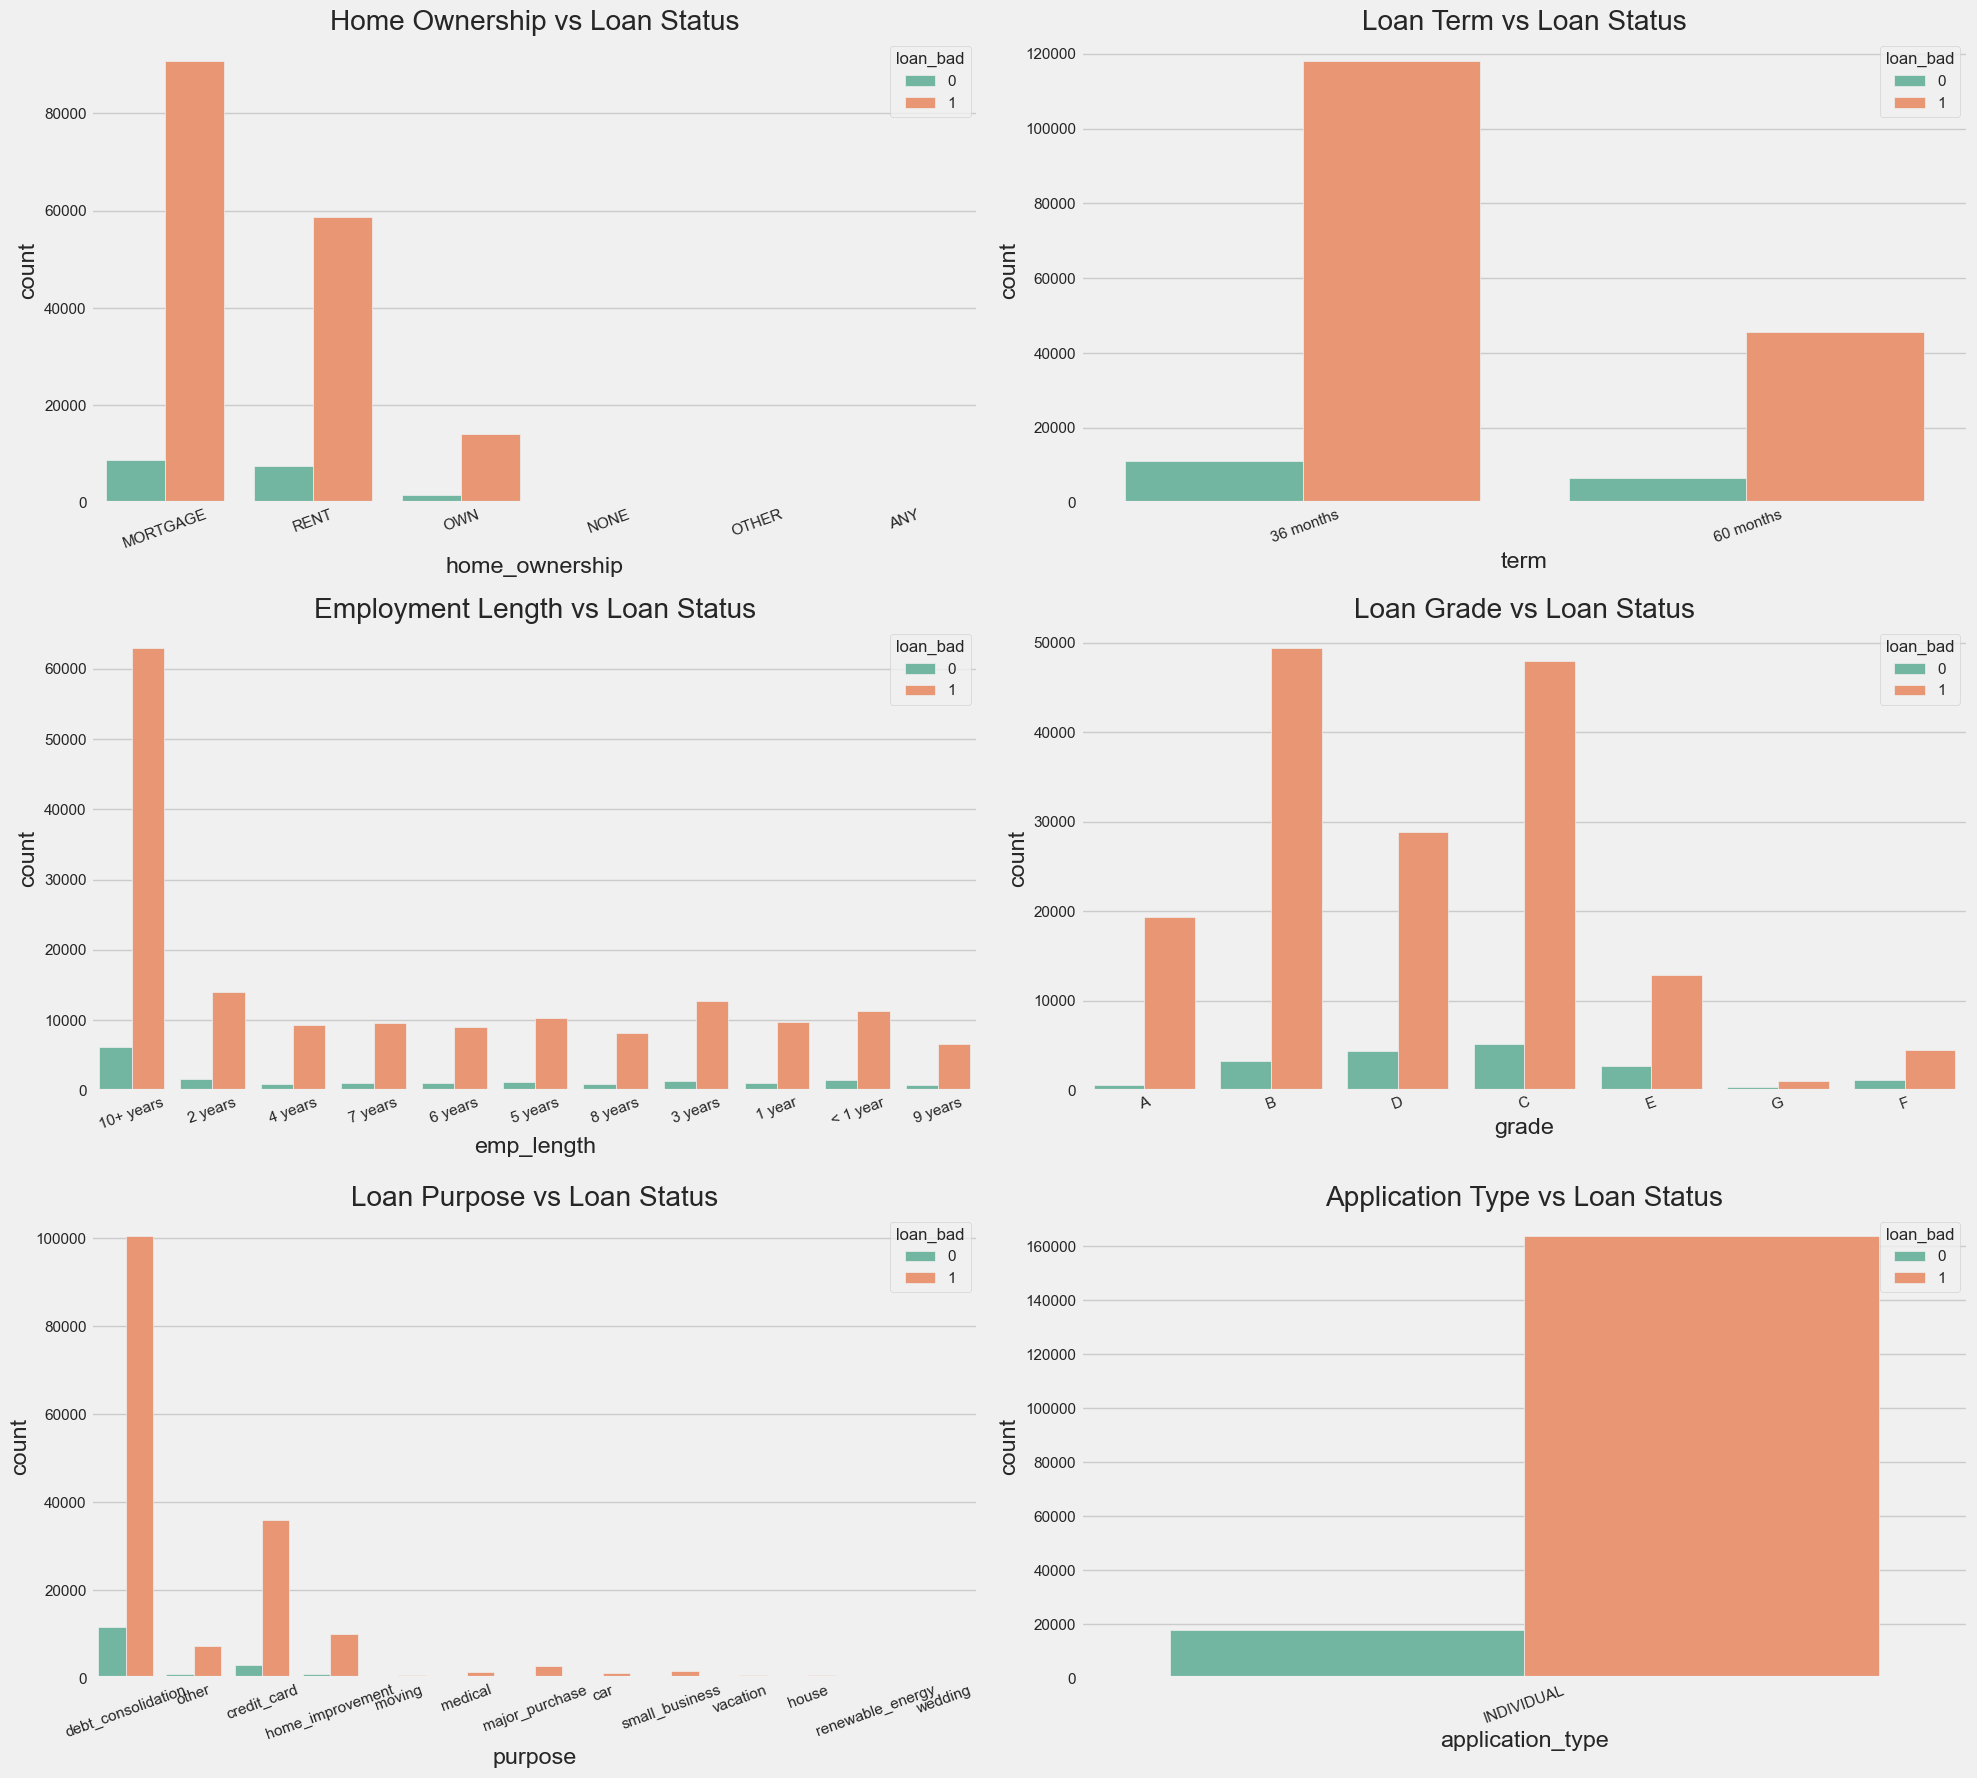

In [51]:
# Set size for the plots
plt.figure(figsize=(20, 18))

# 1. Home Ownership (home_ownership) vs Loan Status (loan_bad)
plt.subplot(3, 2, 1)
sns.countplot(x='home_ownership', hue='loan_bad', data=df, palette="Set2")
plt.xticks(rotation=20)
plt.title('Home Ownership vs Loan Status')

# 2. Loan Term (term) vs Loan Status (loan_bad)
plt.subplot(3, 2, 2)
sns.countplot(x='term', hue='loan_bad', data=df, palette="Set2")
plt.xticks(rotation=20)
plt.title('Loan Term vs Loan Status')

# 3. Employment Length (emp_length) vs Loan Status (loan_bad)
plt.subplot(3, 2, 3)
sns.countplot(x='emp_length', hue='loan_bad', data=df, palette="Set2")
plt.xticks(rotation=20)
plt.title('Employment Length vs Loan Status')

# 4. Grade (grade) vs Loan Status (loan_bad)
plt.subplot(3, 2, 4)
sns.countplot(x='grade', hue='loan_bad', data=df, palette="Set2")
plt.xticks(rotation=20)
plt.title('Loan Grade vs Loan Status')

# 5. Loan Purpose (purpose) vs Loan Status (loan_bad)
plt.subplot(3, 2, 5)
sns.countplot(x='purpose', hue='loan_bad', data=df, palette="Set2")
plt.xticks(rotation=20)
plt.title('Loan Purpose vs Loan Status')

# 6. Application Type (application_type) vs Loan Status (loan_bad)
plt.subplot(3, 2, 6)
sns.countplot(x='application_type', hue='loan_bad', data=df, palette="Set2")
plt.xticks(rotation=20)
plt.title('Application Type vs Loan Status')

# Show the plots
plt.tight_layout()
plt.show()

1. Home Ownership vs Loan Status
Interpretasi:
Mayoritas peminjam memiliki status "OWN" (memiliki rumah), diikuti oleh "MORTGAGE" dan "RENT".
Terkait dengan loan_status, hampir semua peminjam yang memiliki status loan_bad=1 (pinjaman buruk) berada dalam kategori "MORTGAGE" atau "RENT", dengan "OWN" yang cenderung memiliki lebih sedikit pinjaman buruk.
Hal ini mengindikasikan bahwa pemilik rumah yang memiliki loan_bad=1 lebih jarang dibandingkan dengan penyewa atau mereka yang tidak memiliki rumah.
2. Loan Term vs Loan Status
Interpretasi:
Grafik menunjukkan bahwa mayoritas pinjaman memiliki loan term = 36 months (36 bulan), sementara pinjaman dengan durasi 60 months lebih sedikit.
Untuk loan_bad=1, terlihat bahwa hampir semua pinjaman dengan durasi 60 months adalah pinjaman buruk. Sebaliknya, pinjaman 36 months lebih banyak ditemukan dalam kategori loan_bad=0 (pinjaman baik).
Ini menunjukkan bahwa pinjaman dengan durasi lebih panjang mungkin memiliki risiko lebih tinggi untuk mengalami kegagalan pembayaran.
3. Employment Length vs Loan Status
Interpretasi:
Sebagian besar peminjam memiliki durasi pekerjaan lebih dari 10 tahun.
Meskipun ada distribusi peminjam yang memiliki pekerjaan selama beberapa tahun, loan_bad=1 paling banyak ditemukan pada mereka yang memiliki durasi pekerjaan <1 year atau 1 year, serta lebih sedikit pada peminjam dengan durasi kerja lebih panjang (misalnya, 10+ years).
Ini menunjukkan bahwa peminjam dengan durasi pekerjaan yang lebih pendek lebih cenderung memiliki pinjaman yang buruk, sementara mereka dengan pekerjaan lebih lama memiliki risiko yang lebih rendah.
4. Loan Grade vs Loan Status
Interpretasi:
Pinjaman dengan grade B paling banyak ditemukan, diikuti oleh grade C, sedangkan grade lainnya (A, D, E, F, G) jauh lebih sedikit.
Loan_bad=1 lebih dominan pada kategori grade C, D, dan E, sedangkan loan_bad=0 cenderung terdapat pada grade A dan B.
Hal ini menunjukkan bahwa peminjam dengan grade pinjaman yang lebih rendah (C, D, E) lebih cenderung memiliki pinjaman yang buruk.
5. Loan Purpose vs Loan Status
Interpretasi:
Mayoritas tujuan pinjaman adalah untuk debt_consolidation dan credit_card, diikuti oleh home_improvement dan major_purchase.
Tujuan pinjaman debt_consolidation dan credit_card cenderung lebih banyak mengalami loan_bad=1, yang mengindikasikan bahwa pinjaman untuk konsolidasi utang atau untuk tujuan kartu kredit mungkin memiliki risiko yang lebih tinggi untuk gagal bayar dibandingkan dengan tujuan pinjaman lainnya seperti home_improvement atau major_purchase.
6. Application Type vs Loan Status
Interpretasi:
Sebagian besar aplikasi pinjaman adalah INDIVIDUAL (individu), sedangkan aplikasi JOINT sangat sedikit.
Loan_bad=1 lebih sering ditemukan pada aplikasi INDIVIDUAL, dengan hampir tidak ada kasus loan_bad=1 pada aplikasi JOINT.
Ini menunjukkan bahwa aplikasi pinjaman individu lebih cenderung terkait dengan pinjaman buruk, sementara aplikasi bersama (joint) jauh lebih jarang ditemukan, dan kemungkinan besar terkait dengan pinjaman yang lebih stabil.
Kesimpulan:
Grafik ini menunjukkan hubungan yang signifikan antara beberapa faktor seperti home ownership, loan term, loan grade, loan purpose, dan application type dengan status pinjaman.
Secara umum, peminjam dengan loan term 36 bulan, grade A atau B, dan lama pekerjaan lebih dari 10 tahun lebih cenderung memiliki pinjaman yang baik (loan_status=0).
Sebaliknya, peminjam dengan loan term 60 bulan, grade C atau lebih rendah, serta tujuan pinjaman untuk konsolidasi utang atau kartu kredit lebih sering mengalami pinjaman buruk (loan_status=1).
Aplikasi individu juga lebih berisiko gagal bayar dibandingkan aplikasi bersama. 

# Preprocessing

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_cr_lin

# Inconsistent Data 

## Data Type

### 1. Continuous Variable

In [53]:
# A. Fitur emp_length
df['emp_length'].unique()

array(['10+ years', '2 years', '4 years', '7 years', '6 years', '5 years',
       '8 years', '3 years', '1 year', '< 1 year', '9 years'],
      dtype=object)

In [54]:
df['emp_length_int'] = df['emp_length'].str.replace(r'\+ years','', regex = True)
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year',str(0), regex = True)
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a',str(0), regex = True)
df['emp_length_int'] = df['emp_length_int'].str.replace(' years','', regex = True)
df['emp_length_int'] = df['emp_length_int'].str.replace(' year','', regex = True)
df['emp_length_int'].describe()

count     181686
unique        11
top           10
freq       69102
Name: emp_length_int, dtype: object

In [55]:
df.emp_length_int = pd.to_numeric(df.emp_length_int)
df.emp_length_int.describe()

count    181686.000000
mean          6.324092
std           3.607371
min           0.000000
25%           3.000000
50%           7.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

In [56]:
# B. Fitur term
df['term_int'] = df['term'].str.replace(' months', '', regex = True)
df.term_int.value_counts()

term_int
36    129478
60     52208
Name: count, dtype: int64

In [57]:
df.term_int = pd.to_numeric(df.term_int)
df.term_int.unique()

array([36, 60], dtype=int64)

In [58]:
df['earliest_cr_line_date'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.earliest_cr_line_date.head()

42537   1994-03-01
42538   1998-10-01
42539   1998-03-01
42541   1988-06-01
42543   1989-10-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [59]:
total_hari = pd.to_datetime('2024-12-01') - df.earliest_cr_line_date
total_hari.head()

42537   11233 days
42538    9558 days
42539    9772 days
42541   13332 days
42543   12845 days
Name: earliest_cr_line_date, dtype: timedelta64[ns]

In [60]:
df['mths_since_earliest_cr_line'] = round(total_hari / np.timedelta64(1, 'D') / 30.44)

# Melihat hasil
df['mths_since_earliest_cr_line'].describe()

count    181686.000000
mean        334.169039
std          89.560308
min        -528.000000
25%         278.000000
50%         319.000000
75%         378.000000
max         671.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [61]:
df.mths_since_earliest_cr_line.max()

671.0

In [62]:
df.mths_since_earliest_cr_line[df.mths_since_earliest_cr_line < 0] = df.mths_since_earliest_cr_line.max()


In [63]:
min(df['mths_since_earliest_cr_line'])

159.0

In [64]:
from dateutil.relativedelta import relativedelta

# Konversi 'issue_d' ke datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Tanggal referensi
ref_date = pd.to_datetime('2024-12-01')

In [65]:
# Hitung selisih bulan
df['mths_since_issue_d'] = df['issue_d'].apply(lambda x: relativedelta(ref_date, x).years * 12 + relativedelta(ref_date, x).months).astype(float)

In [66]:
from dateutil.relativedelta import relativedelta

def date_columns(df, column):
    # Tanggal referensi
    today_date = pd.to_datetime('2024-12-01')
    # Konversi ke format datetime
    df[column] = pd.to_datetime(df[column], format='%b-%y')
    # Hitung selisih bulan menggunakan relativedelta
    df['mths_since_' + column] = df[column].apply(lambda x: relativedelta(today_date, x).years * 12 + relativedelta(today_date, x).months)
    # Jika ada nilai negatif, set ke maksimum
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # Hapus kolom tanggal asli
    df.drop(columns=[column], inplace=True)

# Gunakan fungsi
date_columns(df, 'last_pymnt_d')
date_columns(df, 'last_credit_pull_d')

In [67]:
# checking for missing values again 

missing_values = df.isnull().sum()
missing_values[missing_values>0]/len(df)

Series([], dtype: float64)

In [68]:
# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object', 'category'])
numerical_features = df.select_dtypes(include=['number'])

In [69]:
# Handle missing values (opsional, bisa disesuaikan dengan kebutuhan)
# Mengisi missing values pada fitur numerik dengan median
df[numerical_features.columns] = numerical_features.fillna(numerical_features.median())
# Mengisi missing values pada fitur kategorikal dengan 'Unknown'
df[categorical_features.columns] = categorical_features.fillna('Unknown')

In [70]:
# Menentukan data untuk preprocessing
preprocess_data = df.copy()

In [71]:
# Checking for any remaining missing values
missing = preprocess_data.isnull().sum()
if missing[missing > 0].empty:
    print("No missing values remaining.")
else:
    print("Remaining missing values:")
    print(missing[missing > 0])

# Info tentang dataset
print("Dataset Info:")
print(preprocess_data.info())

No missing values remaining.
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   term                           181686 non-null  object        
 1   int_rate                       181686 non-null  float64       
 2   grade                          181686 non-null  object        
 3   emp_length                     181686 non-null  object        
 4   home_ownership                 181686 non-null  object        
 5   annual_inc                     181686 non-null  float64       
 6   verification_status            181686 non-null  object        
 7   issue_d                        181686 non-null  datetime64[ns]
 8   pymnt_plan                     181686 non-null  object        
 9   purpose                        181686 non-null  object        
 10  addr_state                

In [72]:
# Fungsi IV dan WoE
def iv_woe(data, target, bins=10, show_woe=False):
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    # Run WoE and IV on all independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(data[ivars].unique()) > 10):
            binned_x = pd.qcut(data[ivars], bins, duplicates='drop')  # Bucketing untuk fitur numerik
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})  # Langsung proses untuk fitur kategorikal
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events'] / d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print(f"Information value of {ivars} is {round(d['IV'].sum(), 6)}")
        temp = pd.DataFrame({"Variable": [ivars], "IV": [d['IV'].sum()]}, columns=["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        if show_woe:
            print(d)

    return newDF.reset_index(drop=True), woeDF.reset_index(drop=True)

# Jalankan fungsi IV dan WoE
iv, woe = iv_woe(preprocess_data, target='loan_bad', bins=20)

# Output hasil IV
print("\nInformation Value (IV):")
print(iv)

# Output hasil WoE (opsional, karena besar)
print("\nWeight of Evidence (WoE):")
print(woe.head())

# Simpan hasil ke file (opsional)
iv.to_csv("iv_results.csv", index=False)
woe.to_csv("woe_results.csv", index=False)

Information value of term is 0.035478
Information value of int_rate is 0.347724
Information value of grade is 0.281145
Information value of emp_length is 0.007547
Information value of home_ownership is 0.017952
Information value of annual_inc is 0.037998
Information value of verification_status is 0.033377
Information value of issue_d is 0.091619
Information value of pymnt_plan is 0.000309
Information value of purpose is 0.028333
Information value of addr_state is 0.010291
Information value of dti is 0.041026
Information value of delinq_2yrs is 0.001039
Information value of earliest_cr_line is 0.055322
Information value of inq_last_6mths is 0.040454
Information value of mths_since_last_delinq is 0.002487
Information value of open_acc is 0.004499
Information value of pub_rec is 0.000504
Information value of revol_util is 0.008858
Information value of initial_list_status is 0.011513
Information value of out_prncp is 0.703375
Information value of total_pymnt is 0.515794
Information value 

Aturan praktisnya mengatakan bahwa semua variabel dengan IV < 0,02 tidak berguna untuk prediksi dan IV > 0,5 memiliki daya prediksi yang mencurigakan. Oleh karena itu, variabel berikut tidak akan disertakan out_prncp, last_pymnt_amnt, delinq_2yrs, mths_since_last_delinq, open_acc, pub_rec, total_acc, collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt dan mths_since_last_pymnt_d

In [73]:
# Drop columns with low IV
preprocess_data.drop(columns=['pymnt_plan', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 
                              'open_acc', 'pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'emp_length', 'application_type'], 
                     axis=1, inplace=True)

In [74]:
preprocess_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   term                           181686 non-null  object        
 1   int_rate                       181686 non-null  float64       
 2   grade                          181686 non-null  object        
 3   home_ownership                 181686 non-null  object        
 4   annual_inc                     181686 non-null  float64       
 5   verification_status            181686 non-null  object        
 6   issue_d                        181686 non-null  datetime64[ns]
 7   purpose                        181686 non-null  object        
 8   addr_state                     181686 non-null  object        
 9   dti                            181686 non-null  float64       
 10  earliest_cr_line               181686 non-null  object        
 11  i

### 2. Discerete variable

grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status

In [75]:
df_dummies = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=":"),
              pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=":"),
              pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=":"),
              pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=":"),
              pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=":"),
              pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=":")]

In [76]:
cat_dummies = pd.concat(df_dummies, axis=1)

In [77]:
cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   grade:A                              181686 non-null  bool 
 1   grade:B                              181686 non-null  bool 
 2   grade:C                              181686 non-null  bool 
 3   grade:D                              181686 non-null  bool 
 4   grade:E                              181686 non-null  bool 
 5   grade:F                              181686 non-null  bool 
 6   grade:G                              181686 non-null  bool 
 7   home_ownership:ANY                   181686 non-null  bool 
 8   home_ownership:MORTGAGE              181686 non-null  bool 
 9   home_ownership:NONE                  181686 non-null  bool 
 10  home_ownership:OTHER                 181686 non-null  bool 
 11  home_ownership:OWN                   181

In [78]:
# concatinating preprocess_data with categorical_dummies

preprocess_data = pd.concat([preprocess_data, cat_dummies], axis=1)

In [79]:
preprocess_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181686 entries, 42537 to 466284
Columns: 105 entries, term to initial_list_status:w
dtypes: bool(78), datetime64[ns](2), float64(12), int32(1), int64(4), object(8)
memory usage: 51.6+ MB


In [80]:
# Cek ukuran awal
print("Jumlah kolom preprocess_data:", preprocess_data.shape[1])
print("Jumlah kolom cat_dummies:", cat_dummies.shape[1])

# Reset index agar sinkron
preprocess_data = preprocess_data.reset_index(drop=True)
cat_dummies = cat_dummies.reset_index(drop=True)

# Tambahkan prefix untuk menghindari duplikasi nama kolom
cat_dummies = cat_dummies.add_prefix('dummy_')

# Gabungkan ulang
preprocess_data1 = pd.concat([preprocess_data, cat_dummies], axis=1)

# Cek jumlah kolom setelah penggabungan
print("Jumlah kolom setelah penggabungan:", preprocess_data1.shape[1])

# Identifikasi kolom yang hilang
expected_columns = list(preprocess_data.columns) + list(cat_dummies.columns)
missing_columns = [col for col in expected_columns if col not in preprocess_data1.columns]
print("Kolom yang hilang:", missing_columns)

# Jika ada kolom hilang, tambahkan kembali
for col in missing_columns:
    if col in preprocess_data.columns:
        preprocess_data1[col] = preprocess_data[col]
    elif col in cat_dummies.columns:
        preprocess_data1[col] = cat_dummies[col]

# Final check
print("Jumlah kolom final setelah perbaikan:", preprocess_data1.shape[1])

Jumlah kolom preprocess_data: 105
Jumlah kolom cat_dummies: 78
Jumlah kolom setelah penggabungan: 183
Kolom yang hilang: []
Jumlah kolom final setelah perbaikan: 183


In [81]:
# Function untuk menghitung WoE (Weight of Evidence) pada fitur kategorikal
def woe_categorical(preprocess_data, cat_feature, good_bad_df):
    # Menggabungkan kolom kategori dengan data target good_bad_df
    df = pd.concat([preprocess_data[cat_feature], good_bad_df], axis=1)
    
    # Menghitung jumlah total dan proporsi rata-rata nilai target
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
    ], axis=1)
    
    # Memilih dan mengganti nama kolom untuk kejelasan
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    
    # Menambahkan kolom statistik tambahan untuk WoE
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    
    # Mengurutkan berdasarkan WoE
    df = df.sort_values(['WoE']).reset_index(drop=True)
    
    # Menghitung perbedaan proporsi dan WoE
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Menghitung Information Value (IV)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df

In [82]:
# Function untuk membuat plot WoE (Weight of Evidence)
import numpy as np
import matplotlib.pyplot as plt

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    # Pastikan kolom pertama digunakan sebagai kategori
    x = np.array(df_WoE.iloc[:, 0].apply(str))  # Ubah kategori menjadi string
    y = df_WoE['WoE']  # Kolom WoE

    # Set ukuran figure
    plt.figure(figsize=(12, 8))

    # Plot garis WoE
    plt.plot(
        x, y, marker='o', color='hotpink', linestyle='dashed', 
        linewidth=2.5, markersize=10, markeredgecolor='cyan', markerfacecolor='black'
    )
    
    # Tambahkan label dan judul
    plt.xlabel(df_WoE.columns[0], fontsize=14)
    plt.ylabel('Weight of Evidence', fontsize=14)
    plt.title(f'Weight of Evidence by {df_WoE.columns[0]}', fontsize=16, fontweight='bold')

    # Atur rotasi dan ukuran label x-axis
    plt.xticks(rotation=rotation_of_x_axis_labels, fontsize=12)
    plt.yticks(fontsize=12)

    # Tampilkan plot
    plt.grid(alpha=0.6)  # Tambahkan grid untuk kejelasan
    plt.tight_layout()  # Sesuaikan layout agar lebih rapi
    plt.show()

In [83]:
# Memisahkan data menjadi target dan fitur
X = preprocess_data.drop(columns='loan_bad', axis=1)  # Fitur (X) tanpa kolom target
y = preprocess_data['loan_bad']  # Target (y) adalah kolom 'loan_bad'

In [84]:

import pandas as pd
pd.set_option('display.max_columns', None)  # Tidak membatasi jumlah kolom yang ditampilkan
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181686 entries, 0 to 181685
Columns: 104 entries, term to initial_list_status:w
dtypes: bool(78), datetime64[ns](2), float64(12), int64(4), object(8)
memory usage: 49.6+ MB


### Analisis Fitur kategori berdasarkan plot WoE

### 1. Analisis fitur Grade

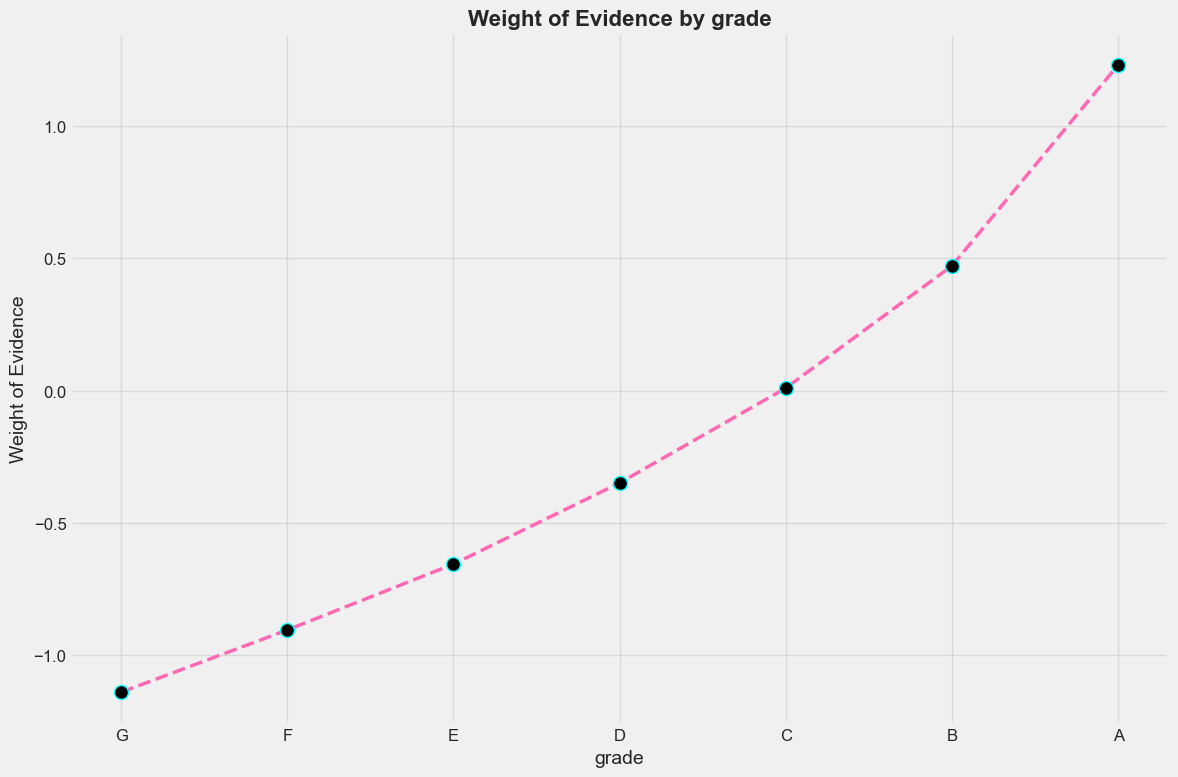

In [85]:
df_grade = woe_categorical(X, 'grade', y)
plot_by_woe(df_grade)

grafik di atas menunjukkan bahwa nilai-nilai tersebut memiliki perbedaan yang signifikan seiring dengan perubahan nilai. Oleh karena itu akan menyimpan setiap nilai sebagai fitur. 

### 2. Analisis Fitur Home Ownership

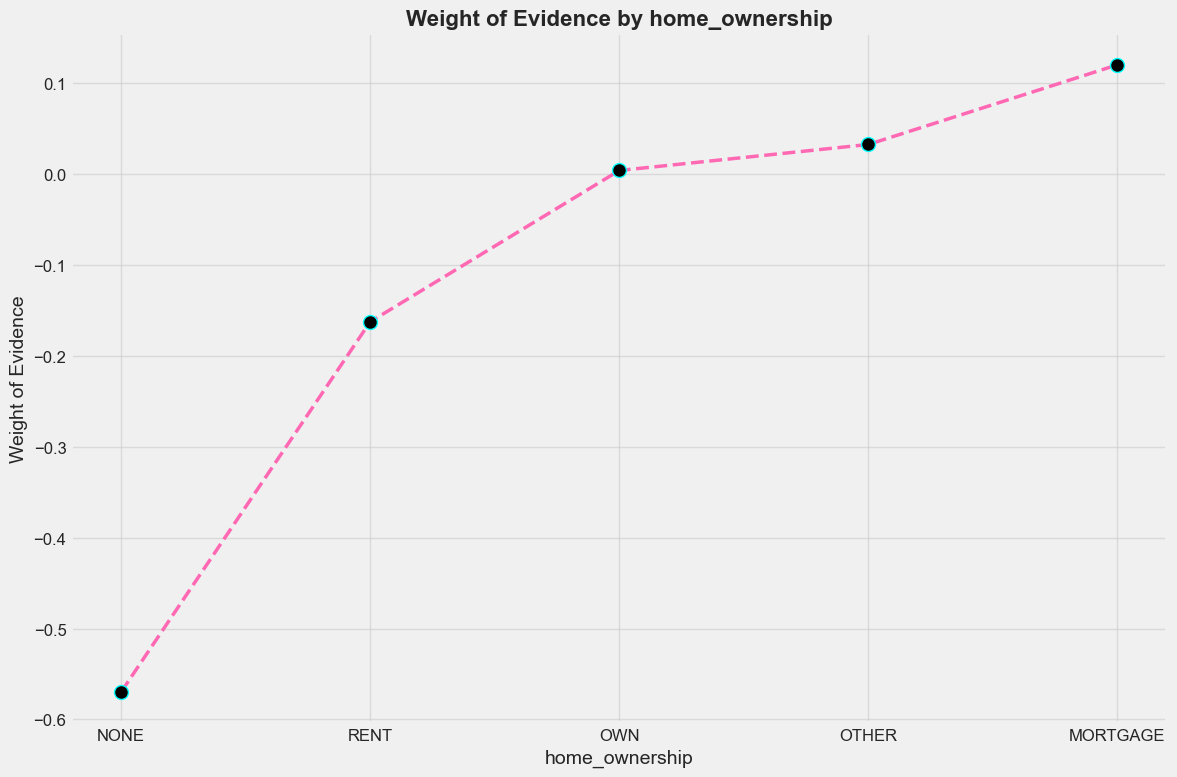

In [86]:
df_home = woe_categorical(X, 'home_ownership', y)
plot_by_woe(df_home)


NONE dan OTHER  memiliki pengamatan yang sangat sedikit dan harus digabungkan dengan kategori dengan risiko gagal bayar yang tinggi yaitu RENT

### 3. Analisis Fitur Verification Status

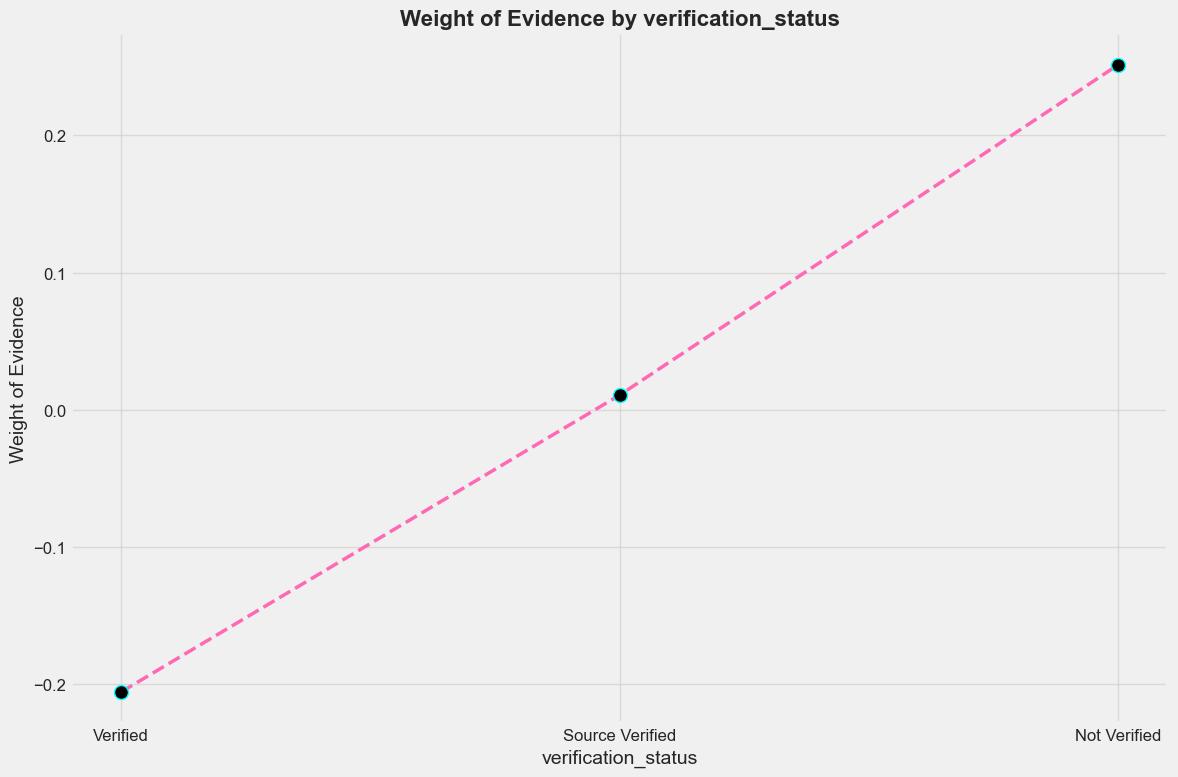

In [87]:
veri_df = woe_categorical(X, 'verification_status', y)
plot_by_woe(veri_df)

Variabel ini memiliki nilai WoE yang berbeda-beda dan dapat digunakan sebagai variabel tersendiri

### 4. Analisis Fitur Purpose

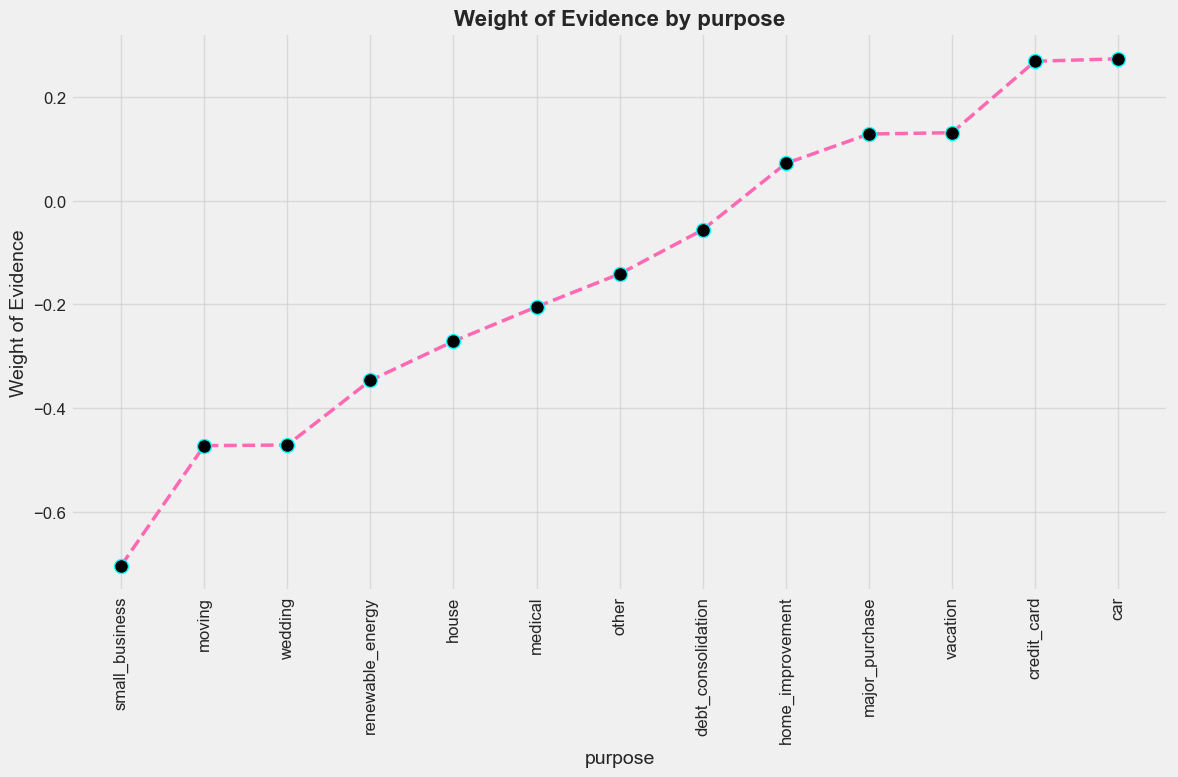

In [88]:
df_pur = woe_categorical(X, 'purpose', y)
plot_by_woe(df_pur, 90)

kategori yang akan digabungkan menjadi satu : 

educational, renewable_energy, moving, other,house, medical, weeding, vacation, debt_consolidation home_improvement, major purchase car, credit_card

### 5. Analisis Fitur Address

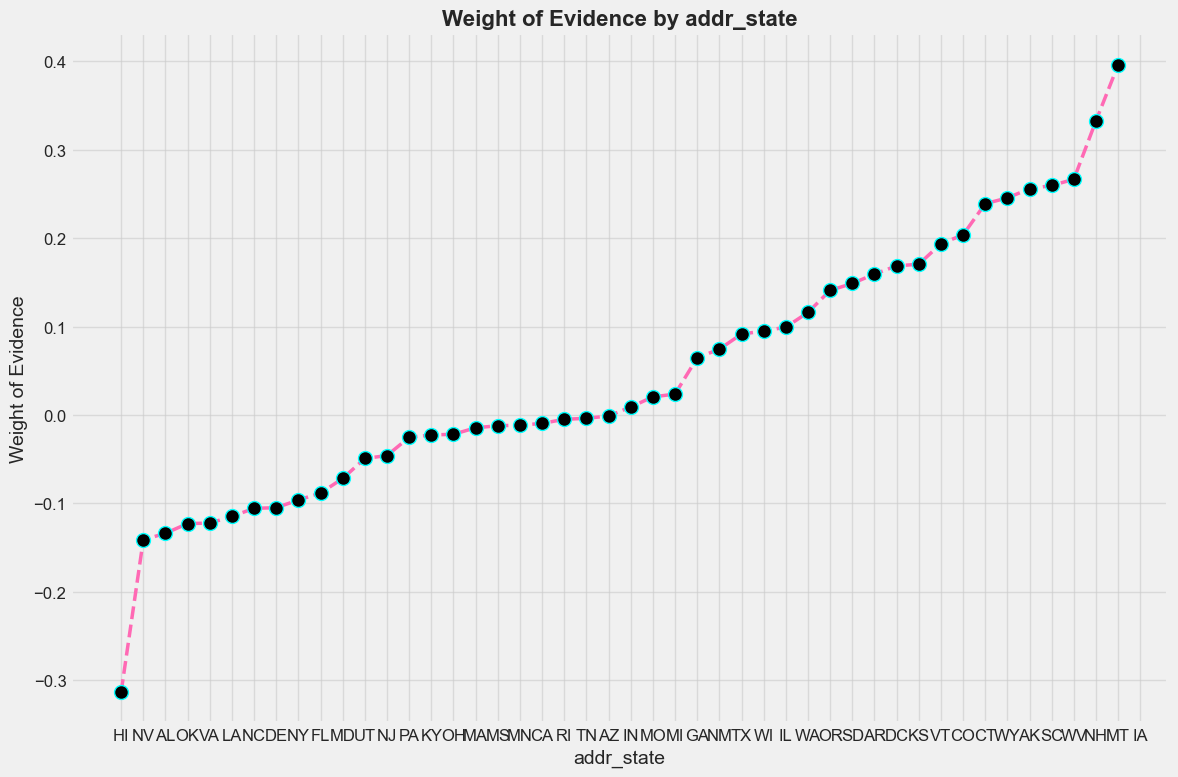

In [89]:
df_addr = woe_categorical(X, 'addr_state', y)
plot_by_woe(df_addr)

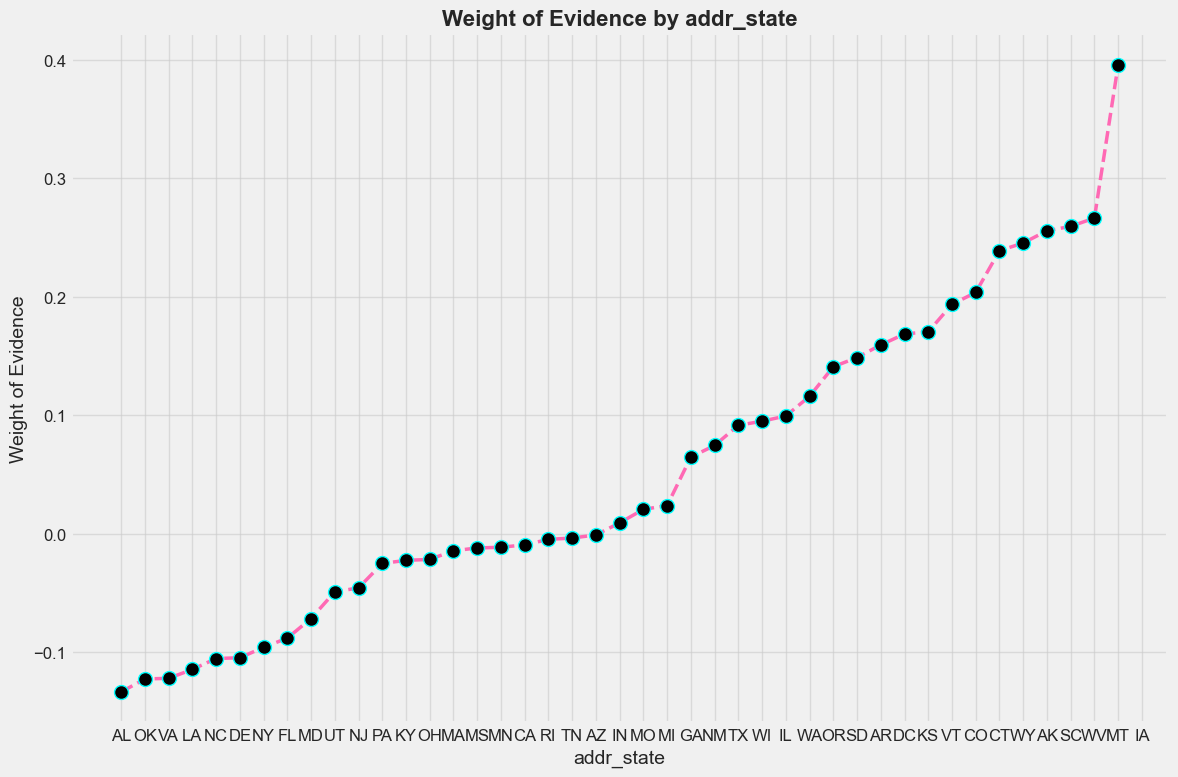

In [90]:
data1 = df_addr.iloc[2:44, :]
data2 = df_addr.iloc[45:49, :]
low_data_woe = pd.concat([data1, data2], axis=0)
plot_by_woe(low_data_woe)

Kategori yang akan digabungkan sebagai berikut:

NE, IA, NV, HI, FL, AL
NY
LA, NM, OK, NC, MO, MD, NJ, VA
CA
AZ, MI, UT, TN, AR, PA
RI, OH, KY, DE, MN, SD, MA, IN
TIDAK, WA
WI, ATAU
TX
IL, CT, MT
CO, SC
KS, VT, AK, MS
NH, WV, WY, DC
Secara total  membuat 13 kategori untuk addr_variable

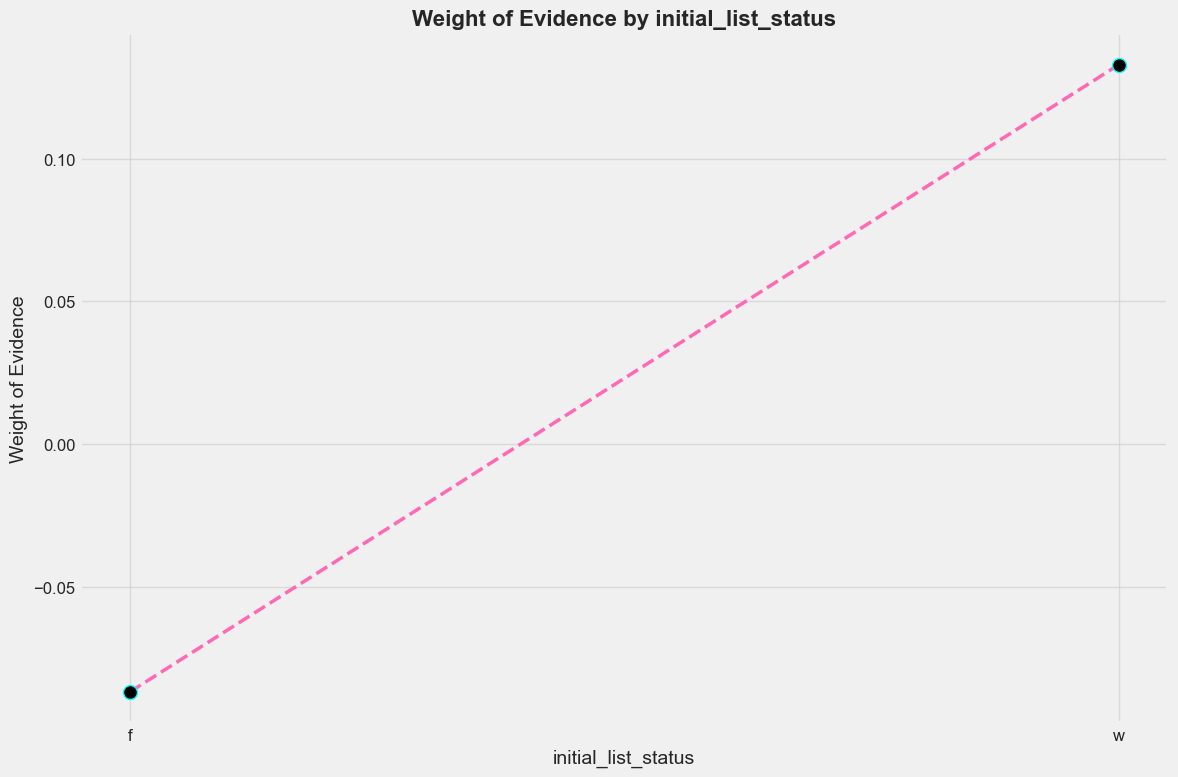

In [91]:
df_init_list = woe_categorical( X, 'initial_list_status', y)
plot_by_woe(df_init_list)

Variabel ini memiliki nilai WoE yang berbeda secara signifikan dan kategori harus disimpan sebagai variabel terpisah

In [92]:
# function to calculate WoE for continous variables
def woe_continous(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

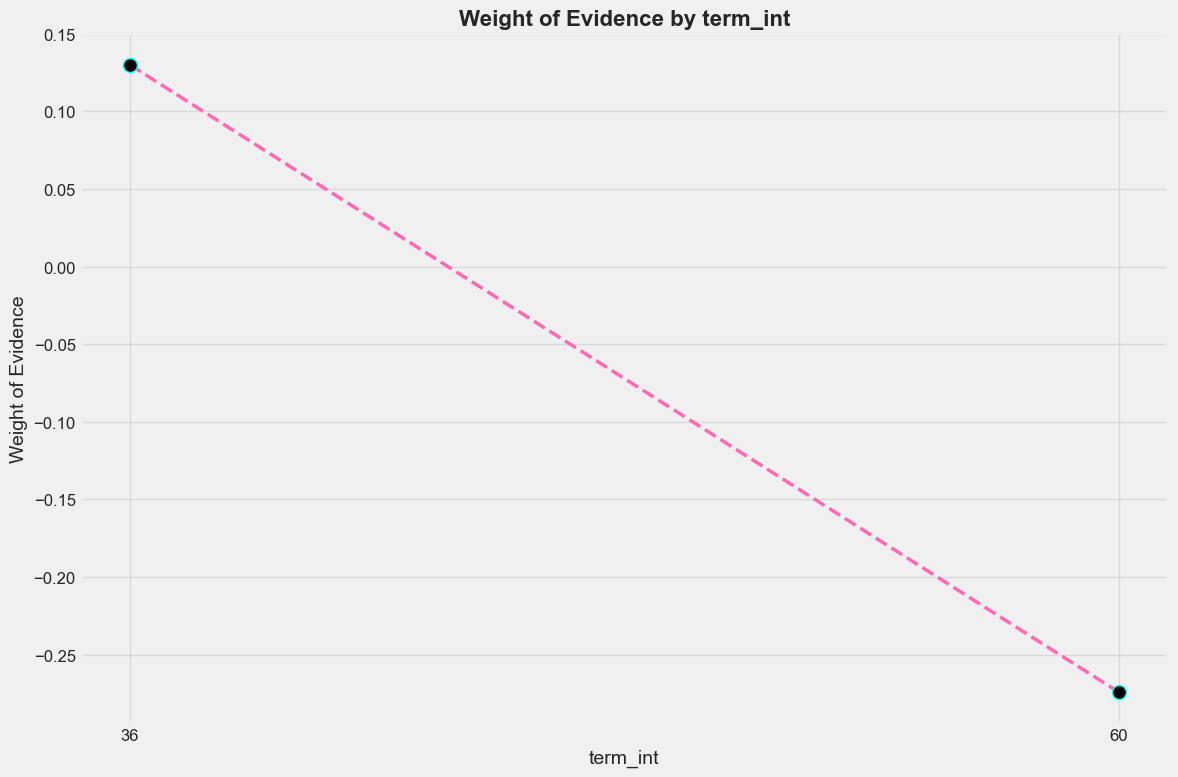

In [93]:
plot_by_woe(woe_continous(X,'term_int', y ))

In [94]:
X['mths_since_issue_d'].unique()

array([132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 120., 121., 122., 123., 124.,
       125., 126., 127., 128., 129., 130., 131.])

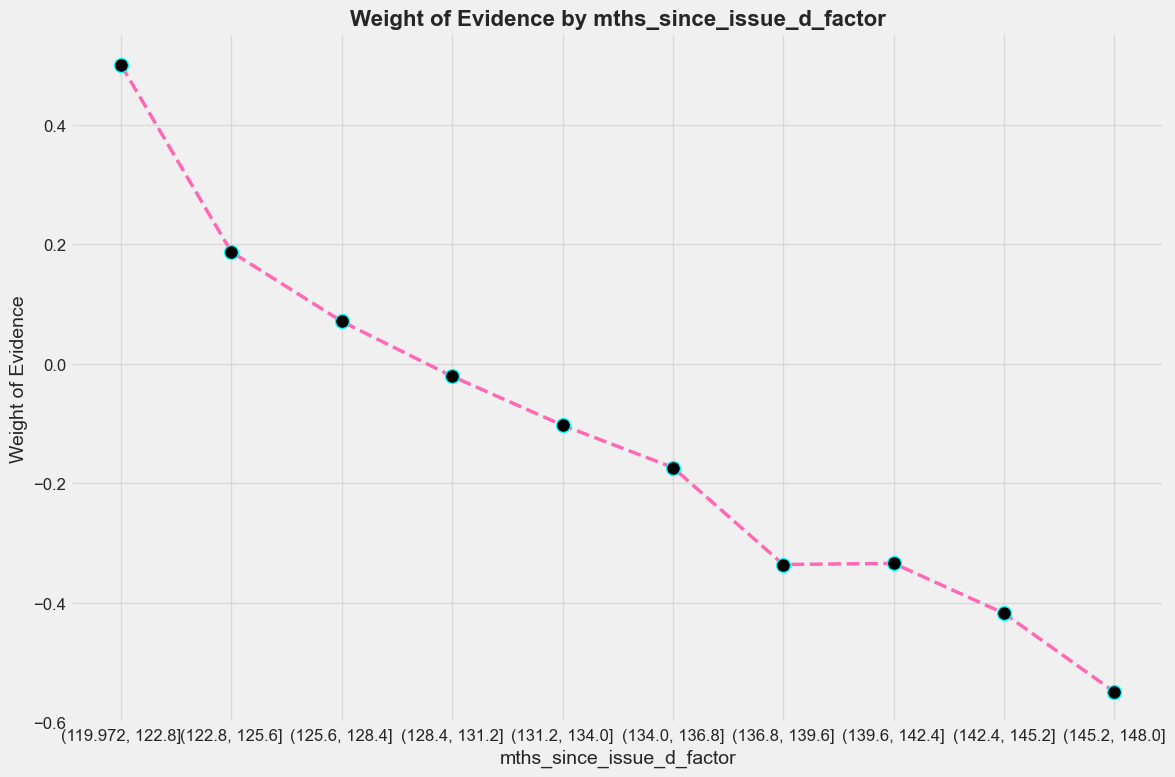

In [95]:
X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)
df_mths_since_iss = woe_continous(X, 'mths_since_issue_d_factor', y)
plot_by_woe(df_mths_since_iss)

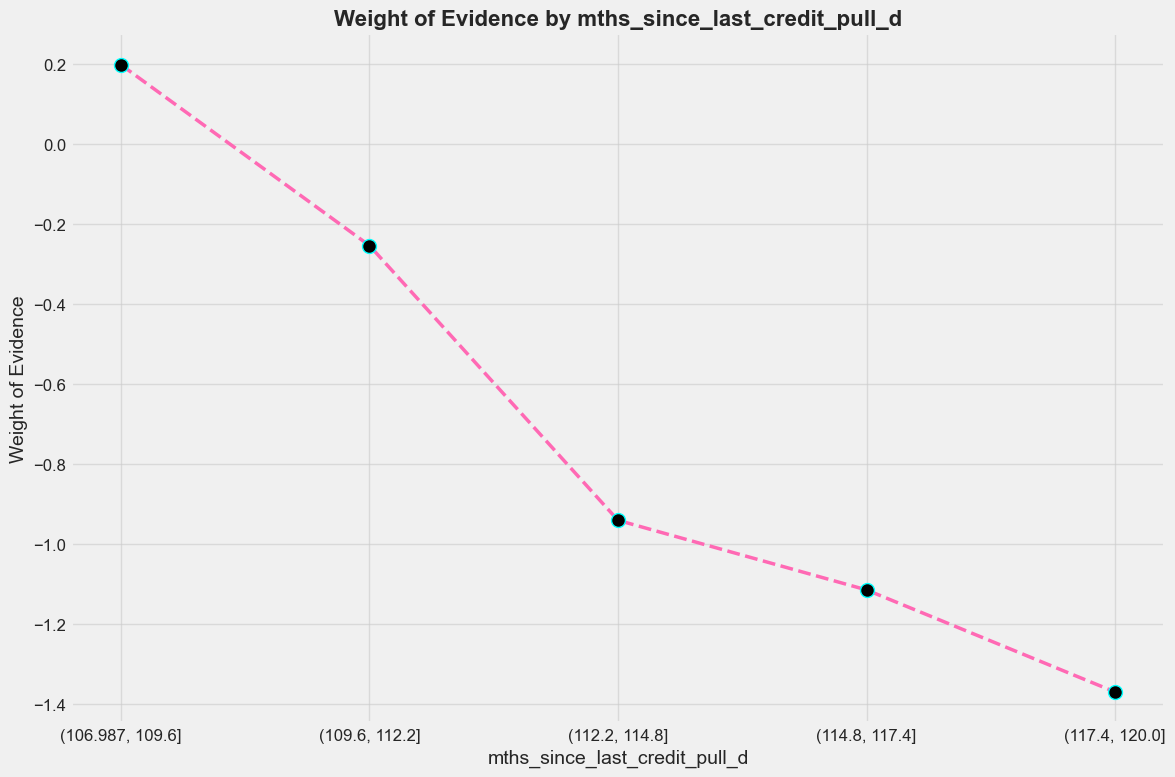

In [96]:
# Memilih data dengan kondisi tertentu (mths_since_last_credit_pull_d <= 60)
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 120].copy()

# Pembagian kategori dengan pd.cut
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)

# Memastikan bahwa y sesuai dengan indeks X_train_prepr_temp
y_temp = y[X_train_prepr_temp.index]

# Menghitung WoE untuk fitur yang telah dibagi kategori
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y_temp)

# Plot hasil WoE
plot_by_woe(df_temp)

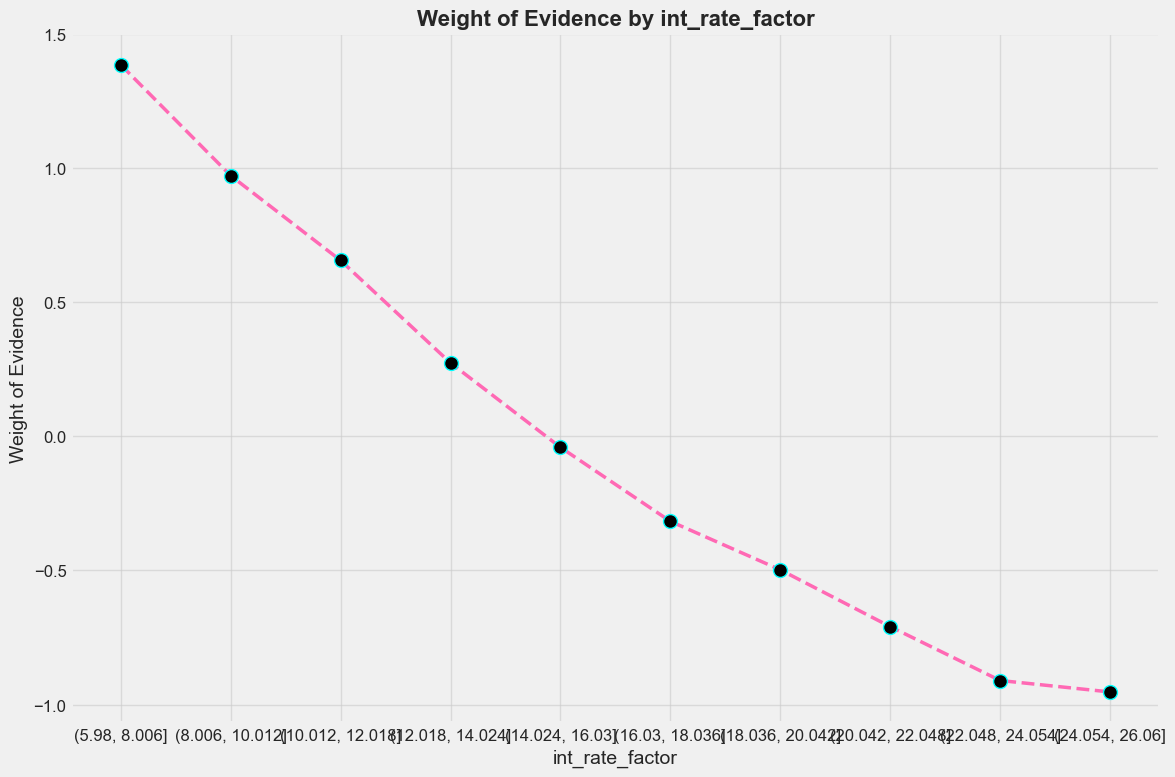

In [97]:
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)
df_int_rate = woe_continous(X, 'int_rate_factor',y)
plot_by_woe(df_int_rate)

Dari grafik di atas hanya dua kategori terakhir yang akan digabungkan.

(22.048, 26.06)

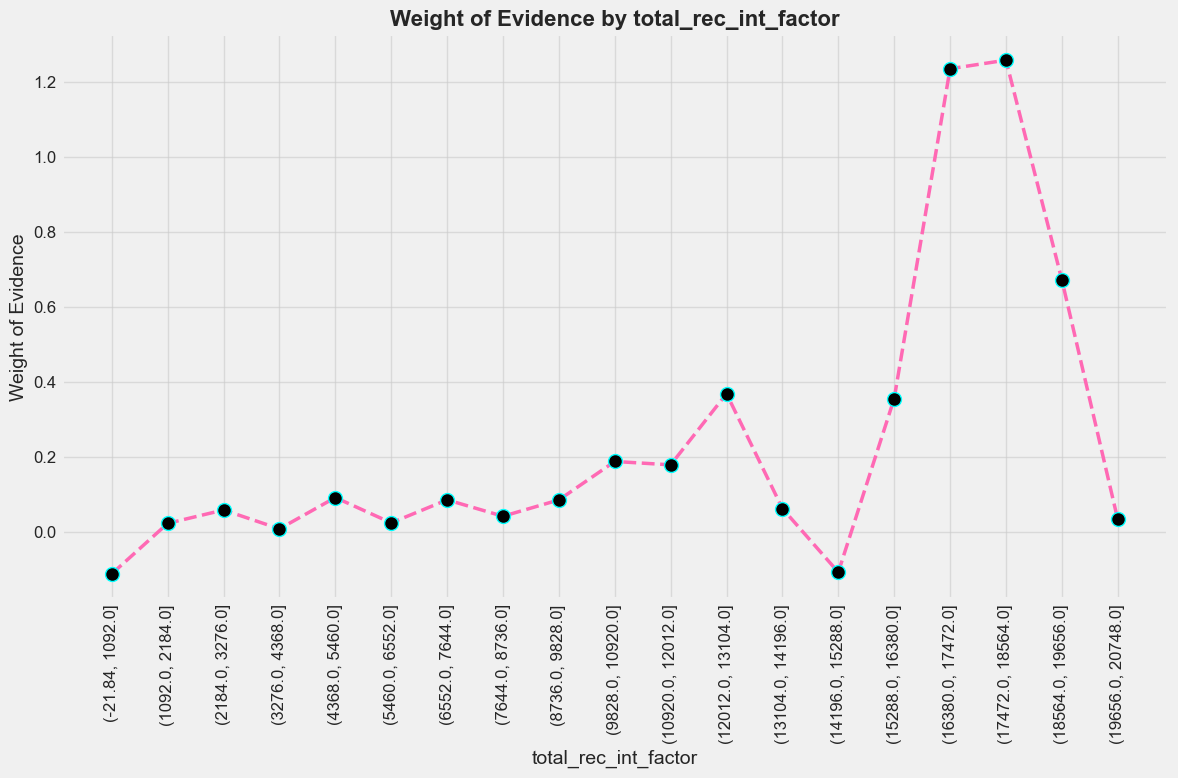

In [98]:
X['total_rec_int_factor'] = pd.cut(X['total_rec_int'], 20)
df_rec_int = woe_continous(X, 'total_rec_int_factor', y)
plot_by_woe(df_rec_int, 90)

In [99]:
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
df_revol_hi = woe_continous(X, 'total_rev_hi_lim_factor', y)
#plot_by_woe(revol_hi_df, 90)

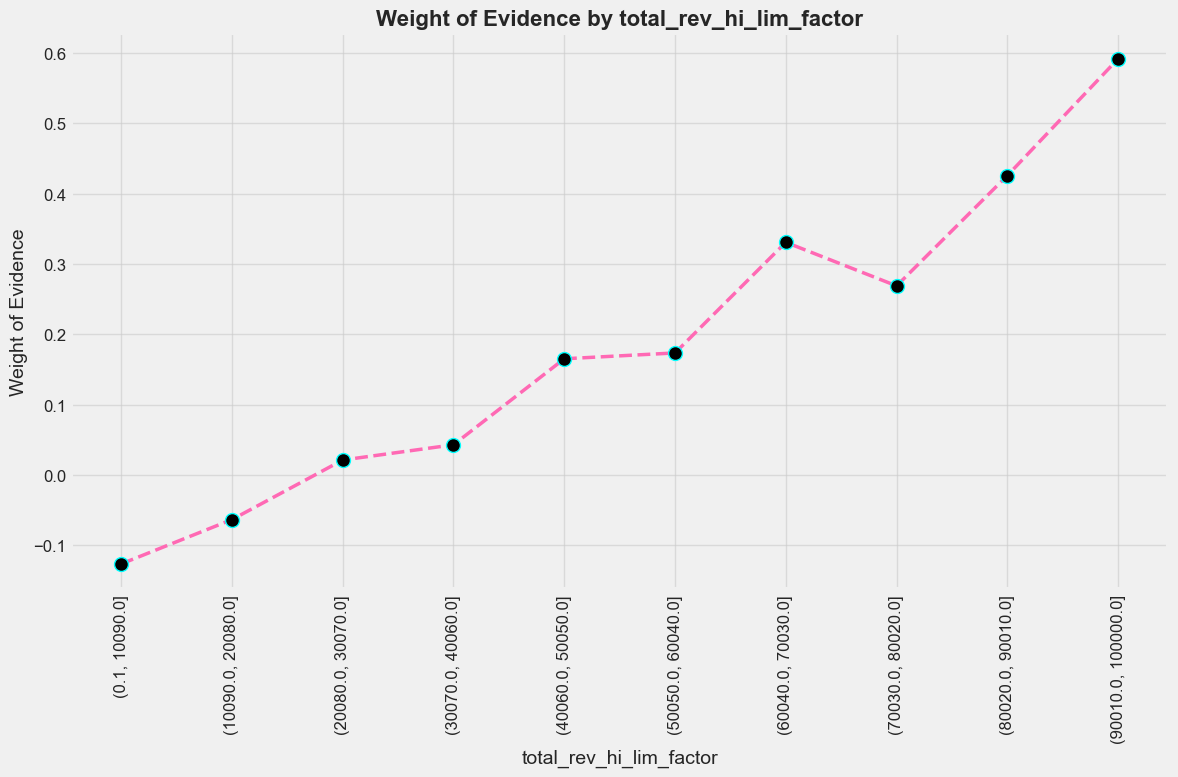

In [100]:
#analyzing below 100000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# select only the relevant index in the target col
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

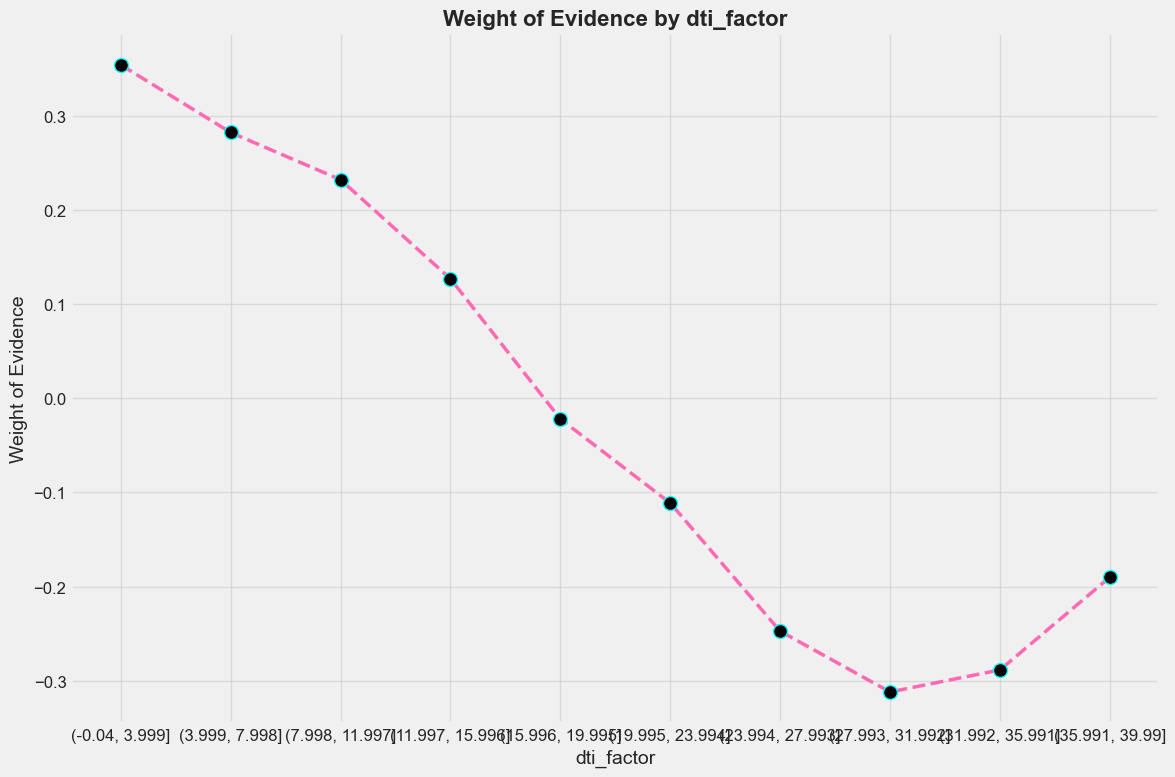

In [101]:
X['dti_factor'] = pd.cut(X['dti'], 10)
df_dti = woe_continous(X, 'dti_factor', y)
plot_by_woe(df_dti)

Kategori akan digabungkan:

(27.993, 31.992), (31.992, 35.991), (35.991, 39.99)

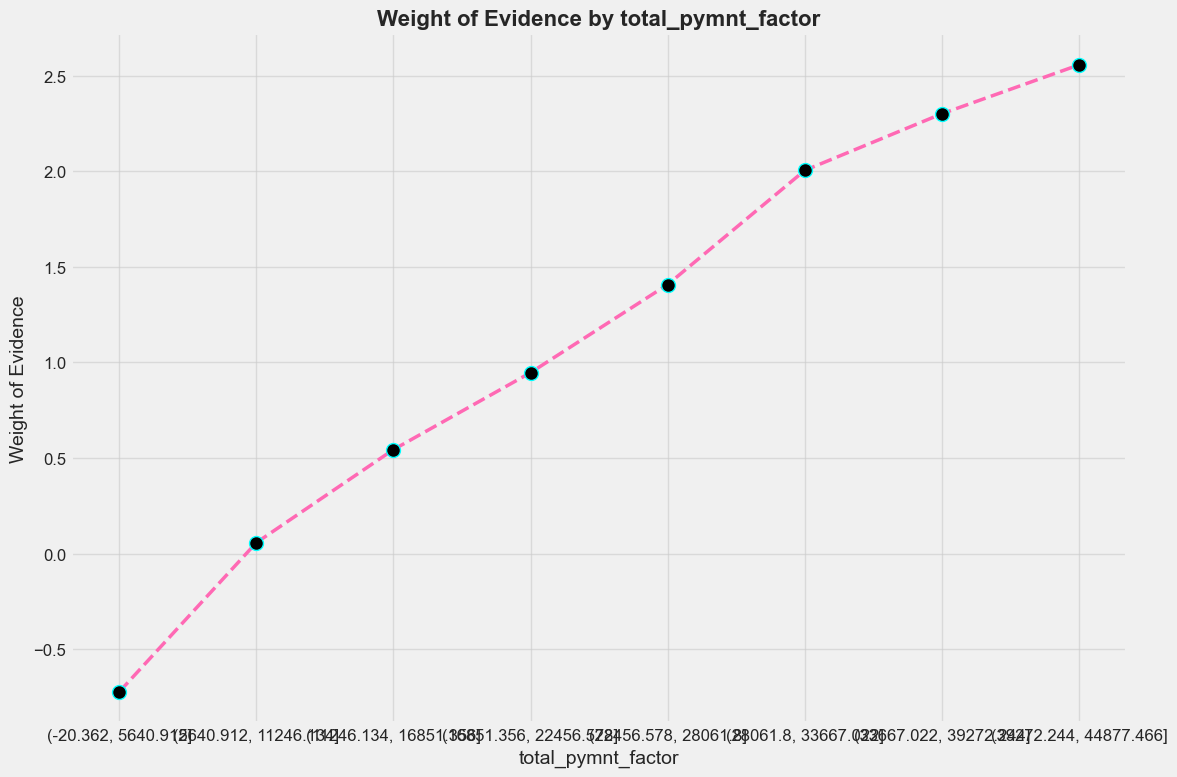

In [102]:
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
df_total_pym = woe_continous(X, 'total_pymnt_factor', y)
plot_by_woe(df_total_pym)

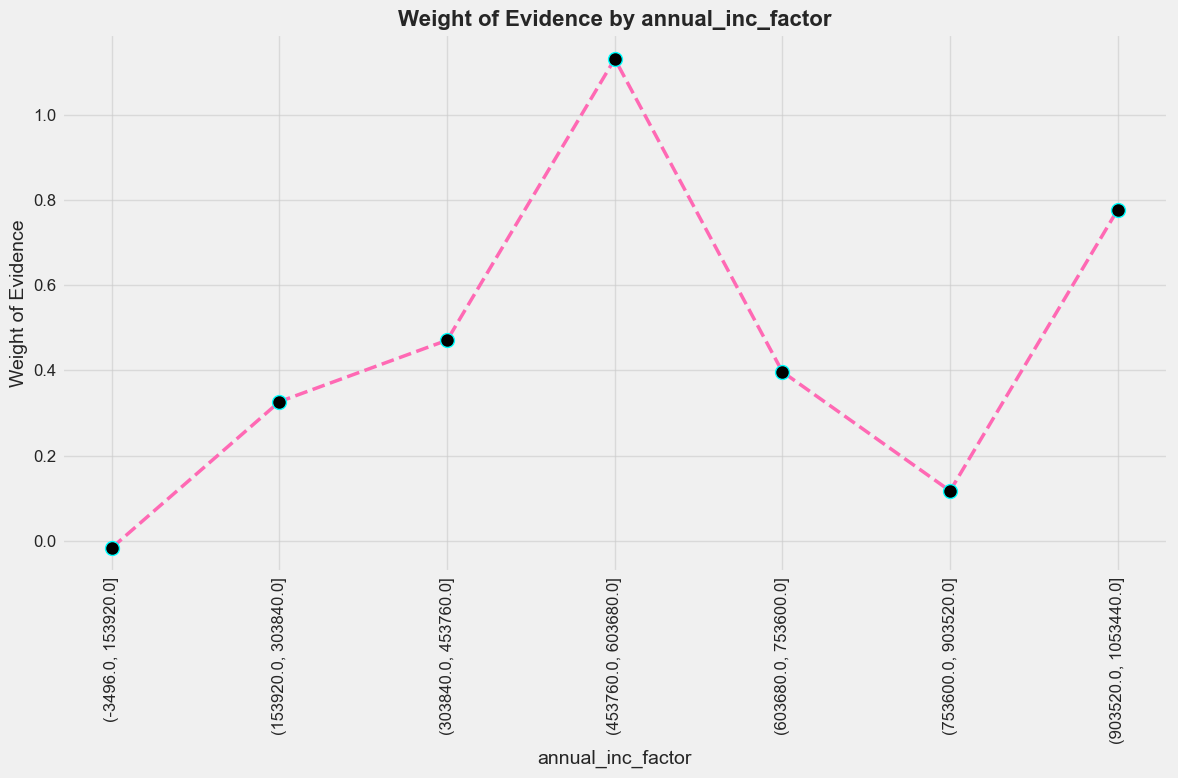

In [103]:
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
df_ann_inc = woe_continous(X, 'annual_inc_factor', y)
plot_by_woe(df_ann_inc, 90)

Memisahkan variabel : orang-orang dengan pendapatan lebih tinggi dan lebih rendah. 
Dari tabel WoE kita mengamati, ketika pendapatan tahunan meningkat, jumlah observasi menurun. 
Sebab, hanya sedikit orang yang berpenghasilan tinggi, akan dibuat variabel baru untuk orang dengan pendapatan di atas 150.000 dolar. Dan juga, menganalisis individu dengan pendapatan di bawah 150.000 dolar.

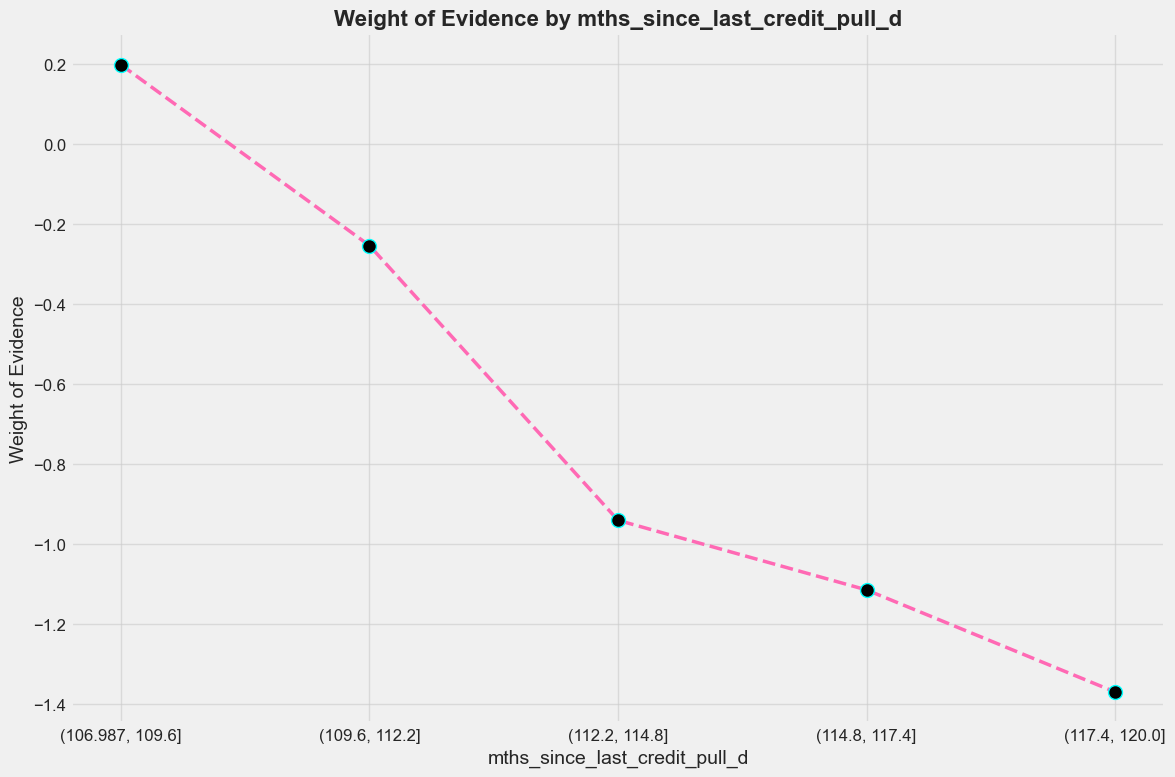

In [104]:
# Memilih data dengan kondisi tertentu (mths_since_last_credit_pull_d <= 60)
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 120].copy()

# Pembagian kategori dengan pd.cut
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)

# Memastikan bahwa y sesuai dengan indeks X_train_prepr_temp
y_temp = y[X_train_prepr_temp.index]

# Menghitung WoE untuk fitur yang telah dibagi kategori
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y_temp)

# Plot hasil WoE
plot_by_woe(df_temp)

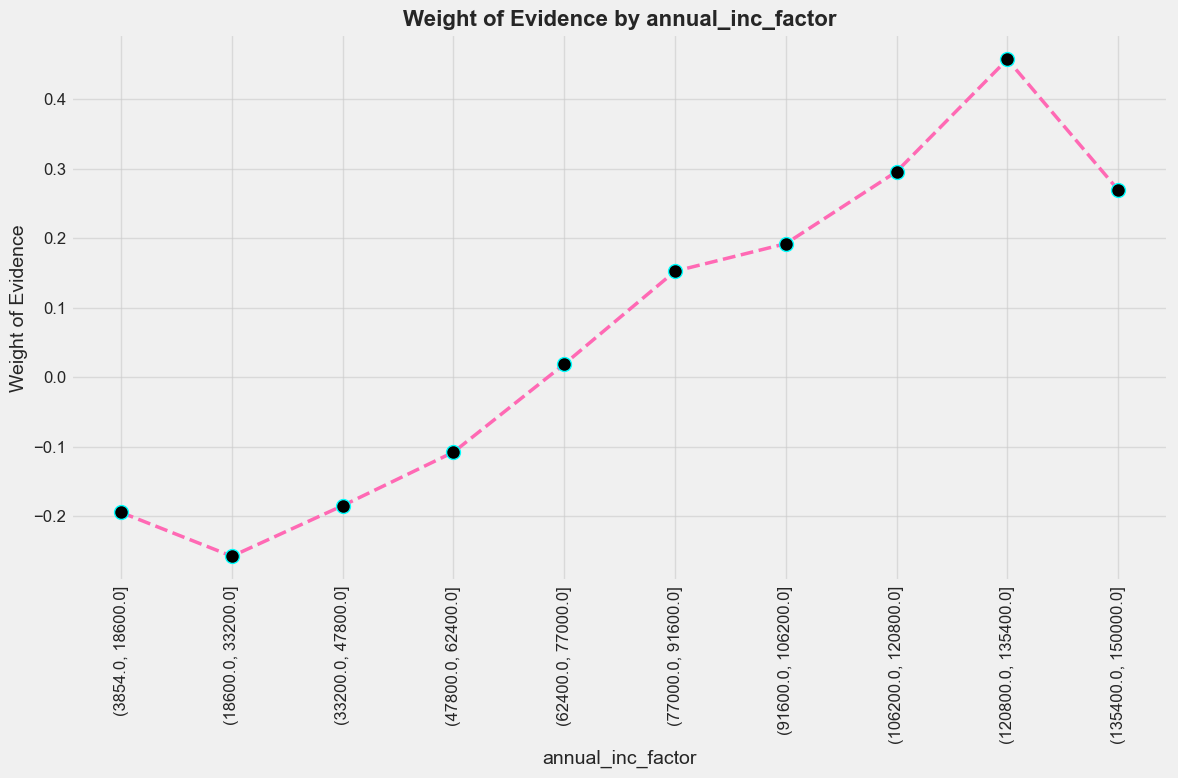

In [105]:
#Analyzing income  below 150000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# fine-classing
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# select only the relevant index in the target col
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

Menggabungkan kategori berikut berdasarkan WoE dan jumlah observasi sebagai berikut:

(<=32000),
(>32000 <= 50000),
(>50000 <= 60000),
(>60000 <=75000),
(>75000 <=90000),
(>90000 <=120000),
(>120000 <=135000),
(>135000 <=150000),
(>150000)


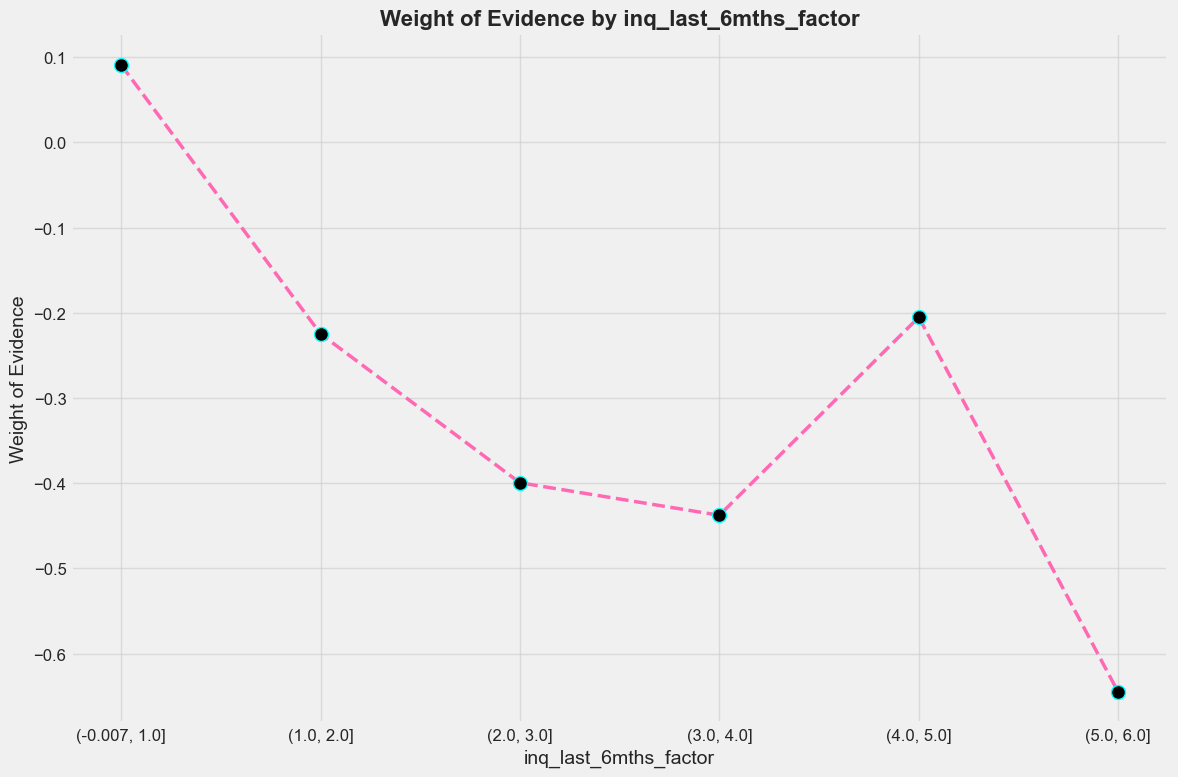

In [106]:
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
df_inq_fact = woe_continous(X, 'inq_last_6mths_factor', y)
plot_by_woe(df_inq_fact)

Kategori berikut akan dibuat

<1 bulan,
1-2,
2-4,
4-7

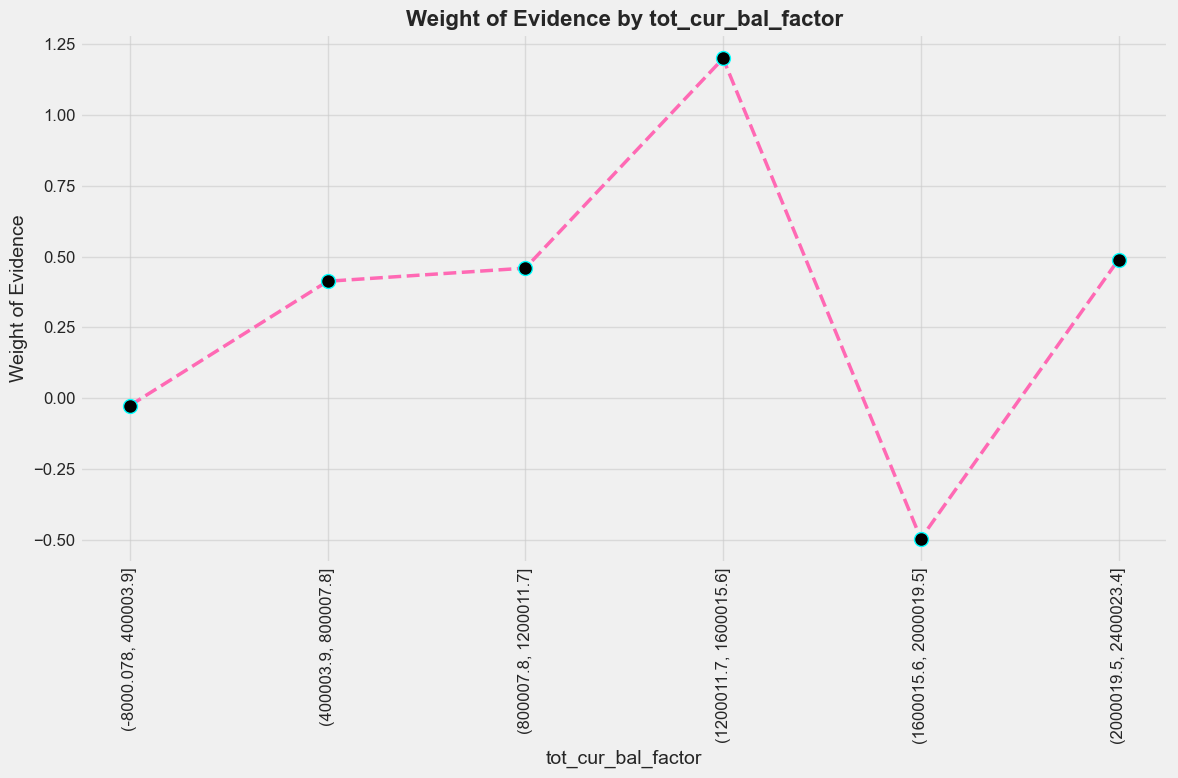

In [107]:
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
df_curr_bal = woe_continous(X, 'tot_cur_bal_factor', y)
plot_by_woe(df_curr_bal, 90)

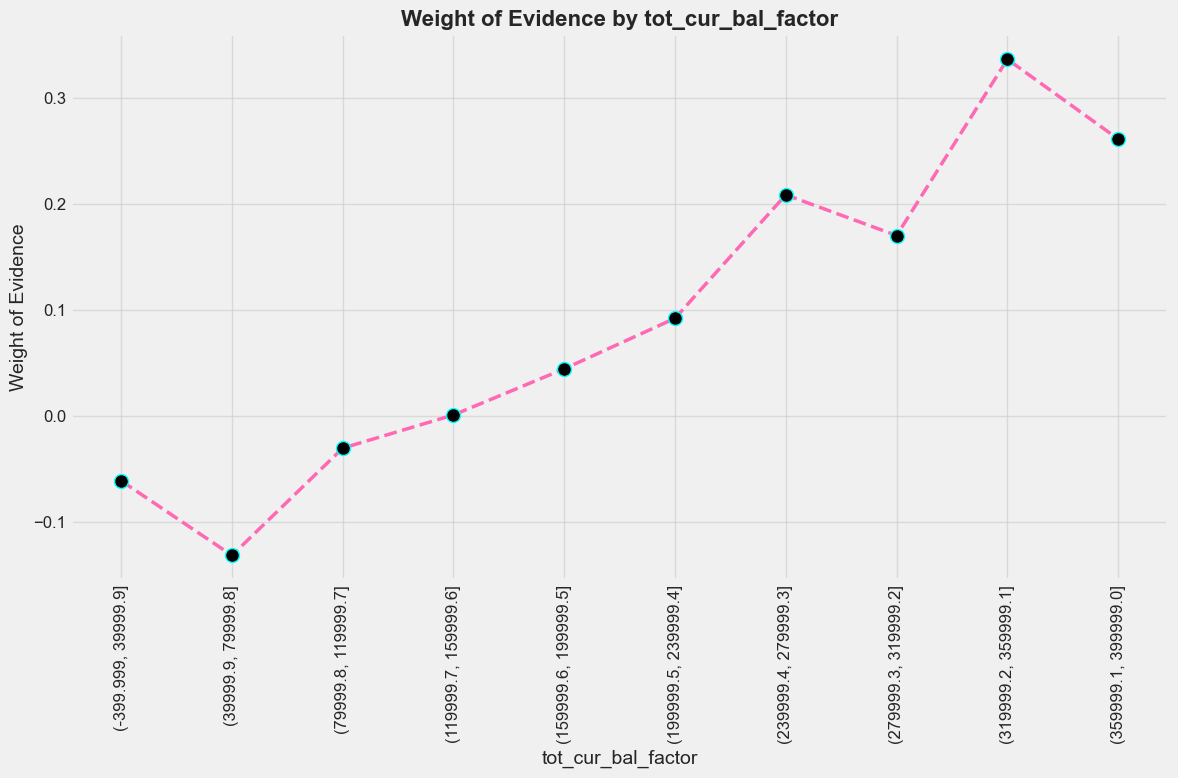

In [108]:
#Analyzing current balance  below 400000
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# select only the relevant index in the target column
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

akan dibuat variabel :

<40000,
40000-80000,
80000-120000,
120000-160000,
160000-200000,
200000-240000,
240000-320000,
320000-400000


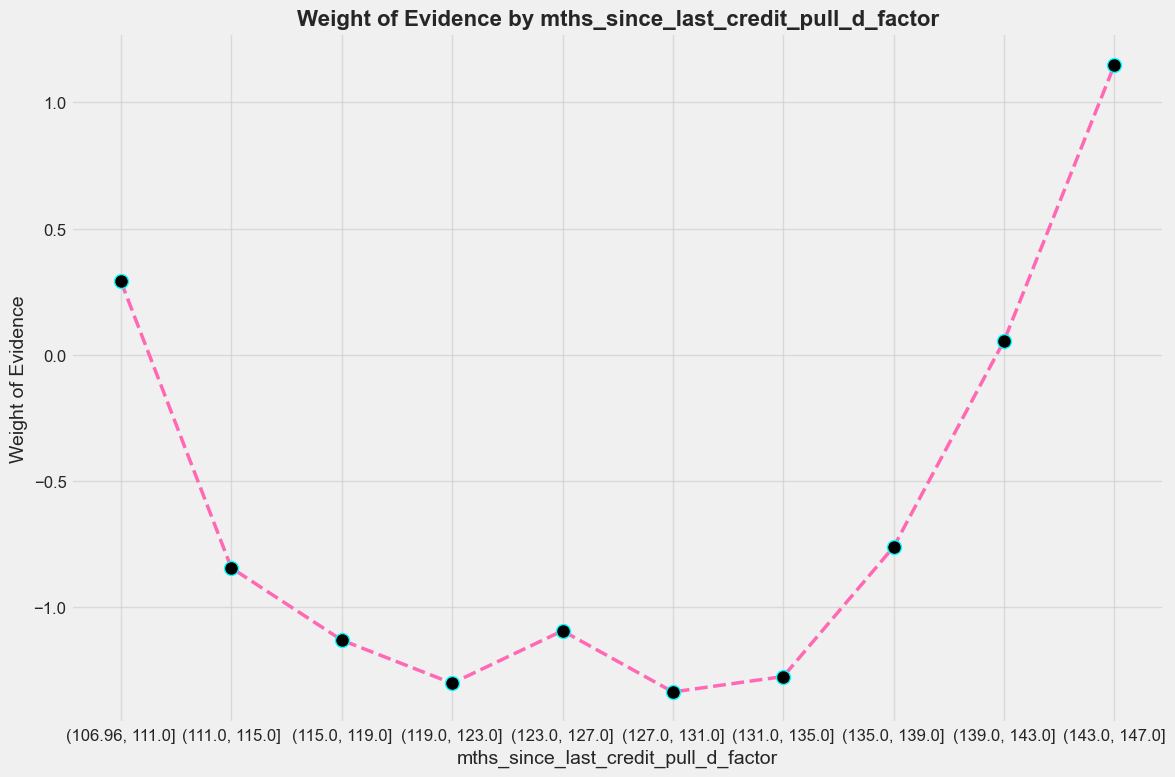

In [109]:
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
df_mths_cr_pull = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y)
plot_by_woe(df_mths_cr_pull)

In [110]:
print("Jumlah data sebelum filter:", X['mths_since_last_credit_pull_d'].shape[0])
print("Jumlah data setelah filter (<= 60):", X_train_prepr_temp.shape[0])

Jumlah data sebelum filter: 181686
Jumlah data setelah filter (<= 60): 169249


In [111]:
print(X['mths_since_last_credit_pull_d'].unique())

[107 112 110 108 115 109 128 117 123 124 116 111 127 121 119 120 125 130
 131 129 113 126 118 114 122 132 133 134 135 136 137 138 139 140 142 141
 143 144 145 146 147]


In [112]:
# Pastikan ada data yang memenuhi kondisi
if X['mths_since_last_credit_pull_d'].le(60).sum() > 0:
    X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 120].copy()

    # Pembagian kategori dengan pd.cut
    X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)

    # Memastikan bahwa y sesuai dengan indeks X_train_prepr_temp
    y_temp = y[X_train_prepr_temp.index]

    # Menghitung WoE untuk fitur yang telah dibagi kategori
    df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y_temp)

    # Plot hasil WoE
    plot_by_woe(df_temp)
else:
    print("Tidak ada data yang memenuhi kondisi mths_since_last_credit_pull_d <= 120")

Tidak ada data yang memenuhi kondisi mths_since_last_credit_pull_d <= 120


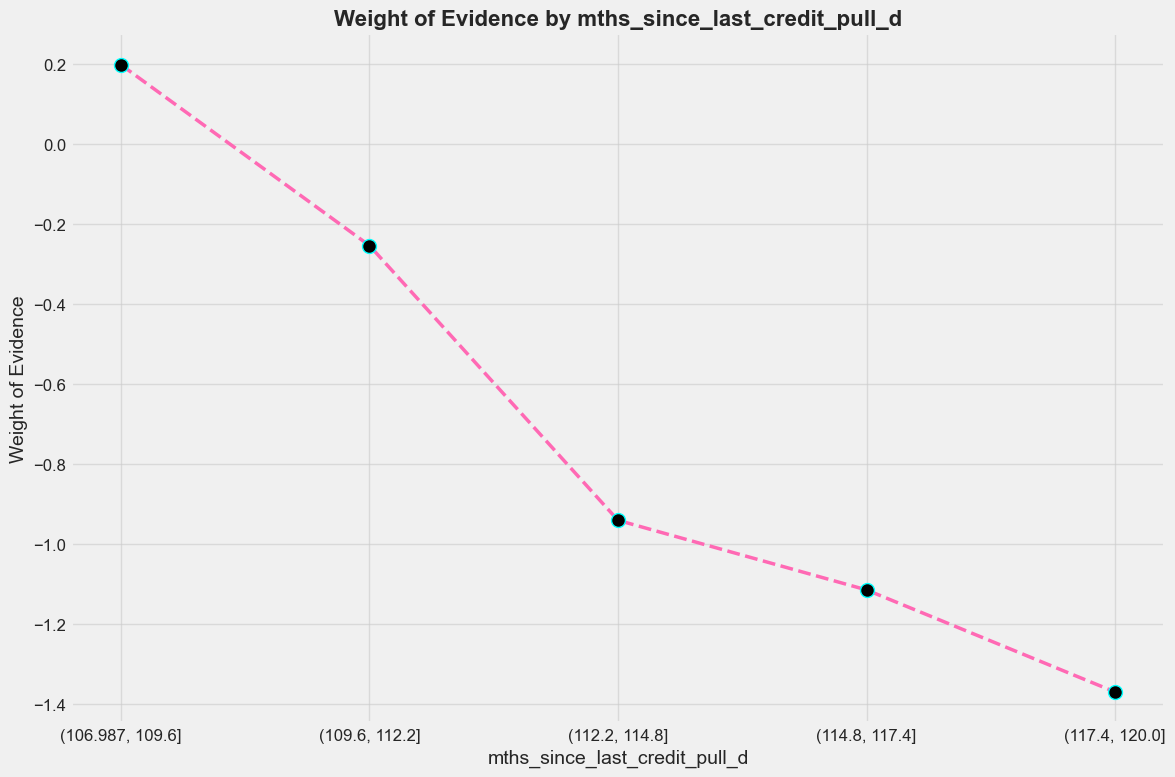

In [113]:
# Memilih data dengan kondisi tertentu (mths_since_last_credit_pull_d <= 60)
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 120].copy()

# Pembagian kategori dengan pd.cut
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)

# Memastikan bahwa y sesuai dengan indeks X_train_prepr_temp
y_temp = y[X_train_prepr_temp.index]

# Menghitung WoE untuk fitur yang telah dibagi kategori
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y_temp)

# Plot hasil WoE
plot_by_woe(df_temp)

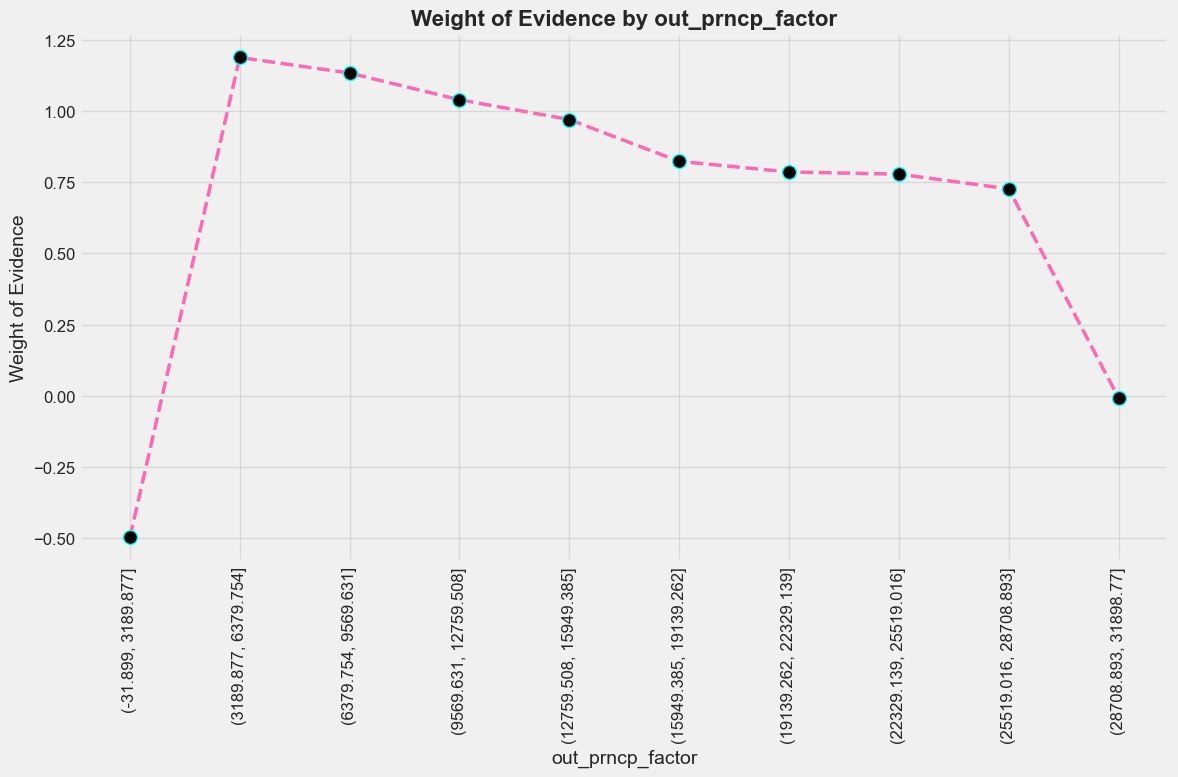

In [114]:
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
df_out = woe_continous(X, 'out_prncp_factor', y)
plot_by_woe(df_out, 90)

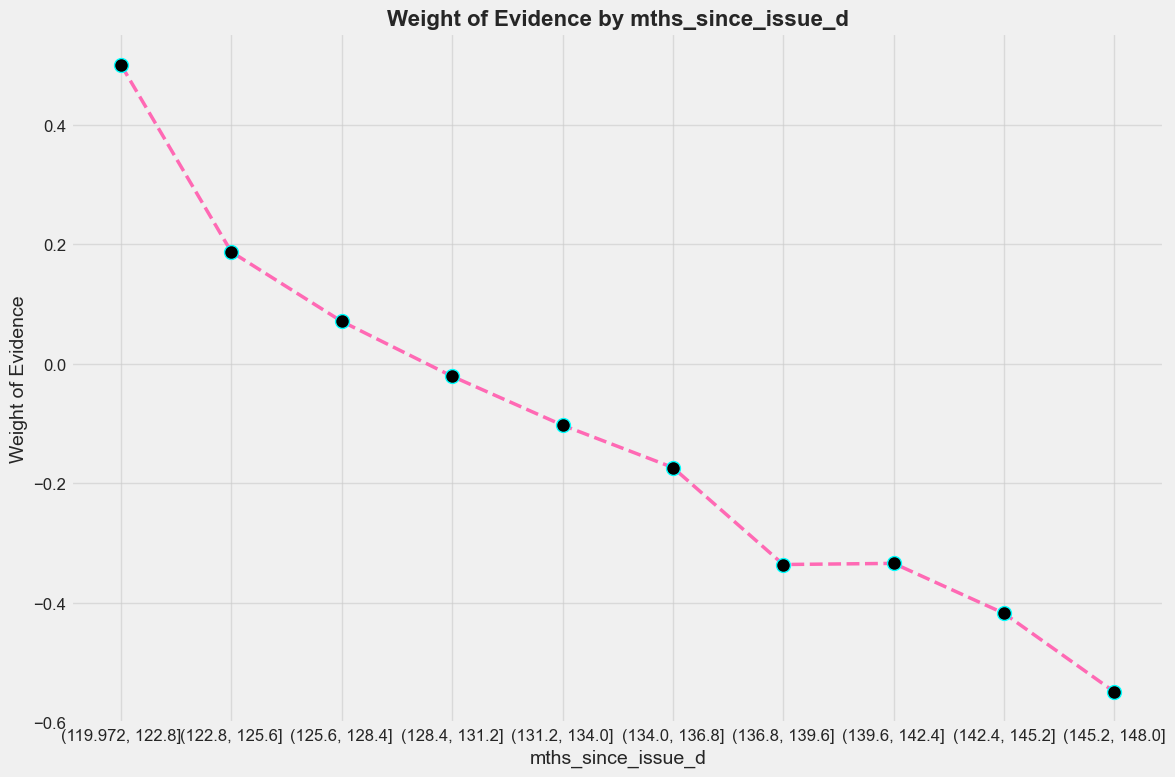

In [115]:
X['mths_since_issue_d'] = pd.cut(X['mths_since_issue_d'], 10)
df_iss = woe_continous(X, 'mths_since_issue_d', y)
plot_by_woe(df_iss)

In [116]:
df_new = preprocess_data.loc[:, 'grade:A':'grade:G']

# home_ownership
df_new['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
df_new['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'], 
                                                    preprocess_data['home_ownership:NONE'],
                                                    preprocess_data['home_ownership:RENT'], 
                                                    preprocess_data['home_ownership:ANY']])
df_new['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

# verification status
df_new['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
df_new['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
df_new['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose of loan
df_new['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([
    preprocess_data['purpose:small_business'],  
    preprocess_data['purpose:renewable_energy'], 
    preprocess_data['purpose:moving']
])
df_new['purpose:OTHER_HOUSE_MEDICAL'] = sum([
    preprocess_data['purpose:other'], 
    preprocess_data['purpose:house'], 
    preprocess_data['purpose:medical']
])
df_new['purpose:WEDDING_VACATION'] = sum([
    preprocess_data['purpose:wedding'], 
    preprocess_data['purpose:vacation']
])
df_new['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([
    preprocess_data['purpose:home_improvement'], 
    preprocess_data['purpose:major_purchase']
])
df_new['purpose:CAR_CREDIT_CARD'] = sum([
    preprocess_data['purpose:car'], 
    preprocess_data['purpose:credit_card']
])

# addr state
df_new['addr_state:NE_IA_NV_HI_FL_AL'] = sum([
    preprocess_data['addr_state:IA'],
    preprocess_data['addr_state:NV'],
    preprocess_data['addr_state:HI'],
    preprocess_data['addr_state:FL'],
    preprocess_data['addr_state:AL']
])
df_new['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
df_new['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([
    preprocess_data['addr_state:LA'],
    preprocess_data['addr_state:NM'],
    preprocess_data['addr_state:OK'],
    preprocess_data['addr_state:NC'],
    preprocess_data['addr_state:MO'],
    preprocess_data['addr_state:MD'],
    preprocess_data['addr_state:NJ'],
    preprocess_data['addr_state:VA']
])
df_new['addr_state:CA'] = preprocess_data.loc[:, 'addr_state:CA']
df_new['addr_state:AZ_MI_UT_TN_AR_PA'] = sum([
    preprocess_data['addr_state:AZ'],
    preprocess_data['addr_state:MI'],
    preprocess_data['addr_state:UT'],
    preprocess_data['addr_state:TN'],
    preprocess_data['addr_state:AR'],
    preprocess_data['addr_state:PA']
])

df_new['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] = sum([
    preprocess_data['addr_state:RI'],
    preprocess_data['addr_state:OH'],
    preprocess_data['addr_state:KY'],
    preprocess_data['addr_state:DE'],
    preprocess_data['addr_state:MN'],
    preprocess_data['addr_state:SD'],
    preprocess_data['addr_state:MA'],
    preprocess_data['addr_state:IN']
])

df_new['addr_state:GA_WA'] = sum([
    preprocess_data['addr_state:GA'],
    preprocess_data['addr_state:WA']
])
df_new['addr_state:WI_OR'] = sum([
    preprocess_data['addr_state:WI'],
    preprocess_data['addr_state:OR']
])
df_new['addr_state:TX'] = preprocess_data.loc[:, 'addr_state:TX']
df_new['addr_state:IL_CT_MT'] = sum([
    preprocess_data['addr_state:IL'],
    preprocess_data['addr_state:CT'],
    preprocess_data['addr_state:MT']
])
df_new['addr_state:CO_SC'] = sum([
    preprocess_data['addr_state:CO'],
    preprocess_data['addr_state:SC']
])
df_new['addr_state:KS_VT_AK_NS'] = sum([
    preprocess_data['addr_state:KS'],
    preprocess_data['addr_state:VT'],
    preprocess_data['addr_state:AK'],
    preprocess_data['addr_state:MS']
])
df_new['addr_state:NH_WV_WY_DC'] = sum([
    preprocess_data['addr_state:NH'],
    preprocess_data['addr_state:WV'],
    preprocess_data['addr_state:WY'], 
    preprocess_data['addr_state:DC']
])

# initial_list_status
df_new['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
df_new['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

# term
df_new['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
df_new['term:60'] = np.where((preprocess_data['term'] == 60), 1, 0)

# total_rec_int
df_new['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int'] <= 1000), 1, 0)
df_new['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int'] > 1000) & (preprocess_data['total_rec_int'] <= 2000), 1, 0)
df_new['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int'] > 2000) & (preprocess_data['total_rec_int'] <= 9000), 1, 0)
df_new['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int'] > 9000), 1, 0)

# total_revol_hi_lim
df_new['total_rev_hi_lim:<10000'] = np.where((preprocess_data['total_rev_hi_lim'] <= 10000), 1, 0)
df_new['total_rev_hi_lim:10000-20000'] = np.where((preprocess_data['total_rev_hi_lim'] > 10000) & (preprocess_data['total_rev_hi_lim'] <= 20000), 1, 0)
df_new['total_rev_hi_lim:20000-40000'] = np.where((preprocess_data['total_rev_hi_lim'] > 20000) & (preprocess_data['total_rev_hi_lim'] <= 40000), 1, 0)
df_new['total_rev_hi_lim:40000-60000'] = np.where((preprocess_data['total_rev_hi_lim'] > 40000) & (preprocess_data['total_rev_hi_lim'] <= 60000), 1, 0)
df_new['total_rev_hi_lim:60000-80000'] = np.where((preprocess_data['total_rev_hi_lim'] > 60000) & (preprocess_data['total_rev_hi_lim'] <= 80000), 1, 0)
df_new['total_rev_hi_lim:80000-100000'] = np.where((preprocess_data['total_rev_hi_lim'] > 80000) & (preprocess_data['total_rev_hi_lim'] <= 100000), 1, 0)
df_new['total_rev_hi_lim:<100000'] = np.where((preprocess_data['total_rev_hi_lim'] > 100000), 1, 0)

# total_pymnt
df_new['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt'] <= 5000), 1, 0)
df_new['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt'] > 5000) & (preprocess_data['total_pymnt'] <= 11000), 1, 0)
df_new['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt'] > 11000) & (preprocess_data['total_pymnt'] <= 16000), 1, 0)
df_new['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt'] > 16000) & (preprocess_data['total_pymnt'] <= 22000), 1, 0)
df_new['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt'] > 22000), 1, 0)

# int_Rate
df_new['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
df_new['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
df_new['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
df_new['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
df_new['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
df_new['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
df_new['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
df_new['int_rate:19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
df_new['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)

# dti
df_new['dti:<4'] = np.where((preprocess_data['dti'] <= 4), 1, 0)
df_new['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
df_new['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
df_new['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
df_new['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
df_new['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
df_new['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
df_new['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

# annual income
df_new['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
df_new['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
df_new['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
df_new['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
df_new['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
df_new['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
df_new['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
df_new['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
df_new['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

# inq_last_6mths
df_new['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <= 1), 1, 0)
df_new['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] > 1) & (preprocess_data['inq_last_6mths'] <= 2), 1, 0)
df_new['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] > 2) & (preprocess_data['inq_last_6mths'] <= 4), 1, 0)
df_new['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] > 4) & (preprocess_data['inq_last_6mths'] <= 7), 1, 0)

# tot_cur_balance
df_new['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
df_new['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
df_new['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
df_new['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
df_new['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
df_new['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
df_new['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
df_new['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
df_new['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

# mths_since_last_credit_pull_d
df_new['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] <= 109), 1, 0)
df_new['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 109) & (preprocess_data['mths_since_last_credit_pull_d'] <= 76), 1, 0)
df_new['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 120), 1, 0)

# mths_since_issue_d_factor
df_new['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d'] <= 119.9), 1, 0)
df_new['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] > 122.8) & (preprocess_data['mths_since_issue_d'] <= 125.6), 1, 0)
df_new['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d'] > 125.6) & (preprocess_data['mths_since_issue_d'] <= 128.4), 1, 0)
df_new['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] > 128.4) & (preprocess_data['mths_since_issue_d'] <= 131.2), 1, 0)
df_new['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] > 131.2) & (preprocess_data['mths_since_issue_d'] <= 134), 1, 0)
df_new['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] > 134) & (preprocess_data['mths_since_issue_d'] <= 136.8), 1, 0)
df_new['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] > 136.8) & (preprocess_data['mths_since_issue_d'] <= 139.6), 1, 0)
df_new['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] > 139.6) & (preprocess_data['mths_since_issue_d'] <= 148), 1, 0)

# out_prncp
df_new['out_prncp:<3000'] = np.where((preprocess_data['out_prncp'] <= 3000), 1, 0)
df_new['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp'] > 3000) & (preprocess_data['out_prncp'] <= 6000), 1, 0)
df_new['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp'] > 6000) & (preprocess_data['out_prncp'] <= 10000), 1, 0)
df_new['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp'] > 10000) & (preprocess_data['out_prncp'] <= 12000), 1, 0)
df_new['out_prncp:>12000'] = np.where((preprocess_data['out_prncp'] > 12000), 1, 0)

# Add bad_loan column
df_new['bad_loan'] = preprocess_data['loan_bad']


In [117]:
#Displaying first 10 rows of new_df
pd.options.display.max_columns = None
df_new.head(10)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0     True    False    False    False    False    False    False   
1    False     True    False    False    False    False    False   
2     True    False    False    False    False    False    False   
3    False     True    False    False    False    False    False   
4    False     True    False    False    False    False    False   
5    False     True    False    False    False    False    False   
6    False    False    False     True    False    False    False   
7    False    False     True    False    False    False    False   
8    False     True    False    False    False    False    False   
9    False    False    False     True    False    False    False   

   home_ownership:OWN  home_ownership:OTHER_NONE_RENT_ANY  \
0               False                                   0   
1               False                                   1   
2               False                                   0   
3               False                                   1   
4               False                                   0   
5               False                                   1   
6               False                                   0   
7               False                                   0   
8               False                                   1   
9               False                                   1   

   home_ownership:MORTGAGE  verification_status:NOT_VERIFIED  \
0                     True                              True   
1                    False                             False   
2                     True                              True   
3                    False                              True   
4                     True                              True   
5                    False                             False   
6                     True                             False   
7                     True                              True   
8                    False                             False   
9                    False                              True   

   verification_status:SOURCE_VERIFIED  verification_status:VERIFIED  \
0                                False                         False   
1                                 True                         False   
2                                False                         False   
3                                False                         False   
4                                False                         False   
5                                False                          True   
6                                 True                         False   
7                                False                         False   
8                                False                          True   
9                                False                         False   

   purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            
5                                                  0            
6                                                  0            
7                                                  0            
8                                                  0            
9                                                  0            

   purpose:OTHER_HOUSE_MEDICAL  purpose:WEDDING_VACATION  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
5       

In [118]:
# Mengubah nilai True/False menjadi 1/0
df_new = df_new.astype(int)
df_new.sample(5)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
170422        0        0        1        0        0        0        0   
76561         0        0        1        0        0        0        0   
89624         0        0        0        1        0        0        0   
90020         0        0        1        0        0        0        0   
33037         0        0        1        0        0        0        0   

        home_ownership:OWN  home_ownership:OTHER_NONE_RENT_ANY  \
170422                   0                                   1   
76561                    0                                   1   
89624                    0                                   1   
90020                    0                                   0   
33037                    0                                   0   

        home_ownership:MORTGAGE  verification_status:NOT_VERIFIED  \
170422                        0                                 0   
76561                         0                                 1   
89624                         0                                 0   
90020                         1                                 0   
33037                         1                                 1   

        verification_status:SOURCE_VERIFIED  verification_status:VERIFIED  \
170422                                    0                             1   
76561                                     0                             0   
89624                                     0                             1   
90020                                     0                             1   
33037                                     0                             0   

        purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING  \
170422                                                  0            
76561                                                   0            
89624                                                   0            
90020                                                   0            
33037                                                   0            

        purpose:OTHER_HOUSE_MEDICAL  purpose:WEDDING_VACATION  \
170422                            0                         0   
76561                             0                         0   
89624                             0                         0   
90020                             0                         0   
33037                             0                         0   

        purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE  purpose:CAR_CREDIT_CARD  \
170422                                        0                        0   
76561                                         0                        0   
89624                                         0                        0   
90020                                         0                        0   
33037                                         0                        0   

        addr_state:NE_IA_NV_HI_FL_AL  addr_state:NY  \
170422                             0              0   
76561                              0              0   
89624                              0              0   
90020                              0              0   
33037                              0              0   

        addr_state:LA_NM_OK_NC_MO_MD_NJ_VA  addr_state:CA  \
170422                                   0              1   
76561                                    0              1   
89624                                    0              1   
90020                                    0              0   
33037                                    0              0   

        addr_state:AZ_MI_UT_TN_AR_PA  addr_state:RI_OH_KY_DE_MN_SD_MA_IN  \
170422                             0                                   0   
76561                              0                                   0   
89624                              0                                   0   
90020                  

Data berbentuk OHE atau pengelompokan kategori ke dalam kolom biner), normalisasi/standarisasi tidak diperlukan untuk kolom-kolom biner (kolom dengan nilai 0 atau 1). Alasannya:

Skala Sudah Konsisten: Nilai biner (0 dan 1) secara alami sudah berada dalam skala yang sama sehingga tidak memerlukan penyesuaian lebih lanjut.
Tidak Ada Nilai Numerik Kontinu: Normalisasi atau standarisasi biasanya diperlukan untuk kolom numerik kontinu, seperti total_pymnt, annual_inc, atau int_rate, agar algoritme seperti gradient descent bekerja lebih efektif.
Namun, jika ada fitur numerik kontinu di dataset, seperti:

total_rec_int:<1000, annual_inc:<32000, atau dti:<4,
Anda perlu mempertimbangkan untuk melakukan standarisasi atau normalisasi agar fitur-fitur tersebut berada dalam skala yang sama, terutama jika Anda menggunakan algoritme berbasis jarak (distance-based algorithms, seperti KNN atau SVM) atau algoritme yang sensitif terhadap skala data (seperti Logistic Regression atau Neural Networks).

Rekomendasi:
Kolom Biner: Tidak perlu normalisasi/standarisasi.
Kolom Numerik Kontinu: Lakukan normalisasi (min-max scaling) atau standarisasi (z-score standardization), tergantung kebutuhan model.
Jika dataset ini digunakan untuk model seperti Random Forest atau Gradient Boosting (misalnya XGBoost, LightGBM), maka normalisasi/standarisasi tidak diperlukan karena algoritme ini tidak sensitif terhadap skala data.

In [119]:
#dummy categories to drop
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                 'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']
#col dropped
df_new.drop(columns=ref_categories, inplace=True, axis=1)

In [120]:
df_new.shape

(181686, 89)

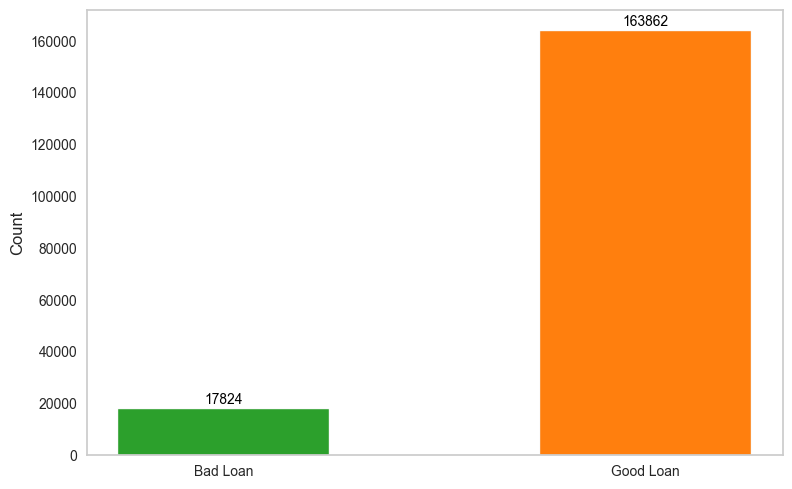

In [121]:
from yellowbrick.target import ClassBalance
from yellowbrick.style import set_palette
import matplotlib.pyplot as plt

# Mengganti palet warna dengan hijau dan oranye
set_palette(["#2ca02c", "#ff7f0e"])  # Warna hijau dan oranye

# Memisahkan fitur dan target
X = df_new.drop(columns='bad_loan', axis=1)
y = df_new['bad_loan']

# Visualisasi distribusi kelas
visualizer = ClassBalance()
visualizer.fit(y)

# Akses sumbu matplotlib dari visualizer
ax = visualizer.ax  

# Menambahkan label angka di atas batang
for p in ax.patches:  
    height = p.get_height()  # Tinggi batang
    ax.annotate(f'{int(height)}',  # Label angka
                (p.get_x() + p.get_width() / 2., height + 1000),  # Posisi teks sedikit di atas batang
                ha='center', va='bottom', fontsize=10, color='black')  # Properti teks

# Mengganti label y-axis
ax.set_ylabel('Count', fontsize=12)

# Menyusun label untuk sumbu x secara manual
ax.set_xticks([0, 1])  # Posisi untuk Bad Loan dan Good Loan
ax.set_xticklabels(['Bad Loan', 'Good Loan'], fontsize=10)

# Menghilangkan grid
ax.grid(False)

# Menampilkan diagram akhir
plt.show()

In [122]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181686 entries, 0 to 181685
Data columns (total 89 columns):
 #   Column                                   Non-Null Count   Dtype
---  ------                                   --------------   -----
 0   grade:A                                  181686 non-null  int32
 1   grade:B                                  181686 non-null  int32
 2   grade:C                                  181686 non-null  int32
 3   grade:D                                  181686 non-null  int32
 4   grade:E                                  181686 non-null  int32
 5   grade:F                                  181686 non-null  int32
 6   home_ownership:OWN                       181686 non-null  int32
 7   home_ownership:MORTGAGE                  181686 non-null  int32
 8   verification_status:NOT_VERIFIED         181686 non-null  int32
 9   verification_status:SOURCE_VERIFIED      181686 non-null  int32
 10  purpose:OTHER_HOUSE_MEDICAL              181686 non-null

In [123]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#checking  imbalance for training dataset
y_train.value_counts()

bad_loan
1    131100
0     14248
Name: count, dtype: int64

In [124]:
#import libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek



#dealing with imbalanced data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
#check value counts after oversampling
y_train_series.value_counts()

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Oversampling dengan RandomOverSampler
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
print("Value counts after oversampling:")
print(y_train_series.value_counts())

# Fungsi untuk evaluasi model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_o)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_o)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train_o, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, zero_division=0))
    print("Precision (Train Set): %.2f" % precision_score(y_train_o, y_pred_train, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train_o, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train_o, y_pred_train))

    # Menampilkan nilai ROC-AUC
    print("ROC_AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC_AUC (Train Set): %.2f" % roc_auc_score(y_train_o, y_pred_proba_train[:, 1]))

    # Cross-validation dengan skor ROC-AUC
    cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
    score = cross_validate(model, X=X_train_o, y=y_train_o, cv=cv, scoring='roc_auc', return_train_score=True)
    print('ROC_AUC (crossval train): %.3f' % score['train_score'].mean())
    print('ROC_AUC (crossval test): %.3f' % score['test_score'].mean())

# Fungsi untuk Grid Search dengan Pipeline
def grid_pipe(pipedict, hyperdict, scoring='roc_auc', display=True):
    fitted_models = {}
    fit_time = []
    for name, pipeline in pipedict.items():
        # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score=True, error_score='raise')

        # Fit menggunakan grid search
        start = time.time()
        model.fit(X_train_o, y_train_o)
        end = time.time()
        fit_time.append(round(end - start, 2))
        # Menyimpan model yang sudah fit
        fitted_models[name] = model
        if display:
            # Menampilkan hasil setelah model terlatih
            print(f'The {name} model has been fitted.')
            print('Total Fit Time: %.3fs' % (end - start))
            print('Best roc_auc: %.3f' % model.best_score_)
            print('Best params:\n', model.best_params_, '\n')

    return fitted_models, fit_time

# Fungsi untuk evaluasi confusion matrix
def confusion(model):
    # Prediksi model
    y_pred_proba = model.predict_proba(X_test)
    y_predict = model.predict(X_test)

    # Evaluasi performa model
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100))
    print('Precision (FP): %.2f%%' % (precision_score(y_test, y_predict, zero_division=0) * 100))
    print('Recall (FN): %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score (FP&FN): %.2f%%' % (f1_score(y_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y_test, y_pred_proba[:, 1]) * 100))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_predict)

    # Ekstrak nilai TP, FP, TN, FN dari confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Tampilkan nilai-nilai TP, FP, TN, FN
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

    # Visualisasi confusion matrix menggunakan heatmap
    plt.figure(figsize=(6, 4))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')  # Menggunakan cmap untuk memperindah
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

# Contoh penggunaan:
# eval_classification(model)
# grid_pipe(pipedict, hyperdict)
# confusion(model)

Value counts after oversampling:
bad_loan
1    131100
0    131100
Name: count, dtype: int64


Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.79
Precision (Test Set): 0.97
Precision (Train Set): 0.78
Recall (Test Set): 0.80
Recall (Train Set): 0.80
F1-Score (Test Set): 0.87
F1-Score (Train Set): 0.79
ROC_AUC (Test Set): 0.85
ROC_AUC (Train Set): 0.86
ROC_AUC (crossval train): 0.859
ROC_AUC (crossval test): 0.858
Accuracy: 79.44%
Precision (FP): 96.94%
Recall (FN): 79.71%
F1_Score (FP&FN): 87.48%
ROC_AUC: 85.32%
True Positives (TP): 26114
False Positives (FP): 824
True Negatives (TN): 2752
False Negatives (FN): 6648


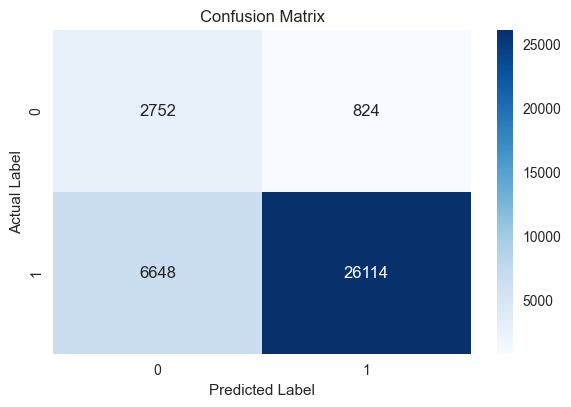

In [126]:
from sklearn.linear_model import LogisticRegression 

# Melatih model logistic regression
logreg1 = LogisticRegression(random_state=42)
logreg1.fit(X_train_o, y_train_o)

# Evaluasi model menggunakan fungsi eval_classification
eval_classification(logreg1)

# Confusion matrix menggunakan fungsi confusion
confusion(logreg1)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.93
F1-Score (Train Set): 1.00
ROC_AUC (Test Set): 0.68
ROC_AUC (Train Set): 1.00
ROC_AUC (crossval train): 1.000
ROC_AUC (crossval test): 0.960
Accuracy: 88.19%
Precision (FP): 93.74%
Recall (FN): 93.12%
F1_Score (FP&FN): 93.43%
ROC_AUC: 68.08%
True Positives (TP): 30508
False Positives (FP): 2037
True Negatives (TN): 1539
False Negatives (FN): 2254


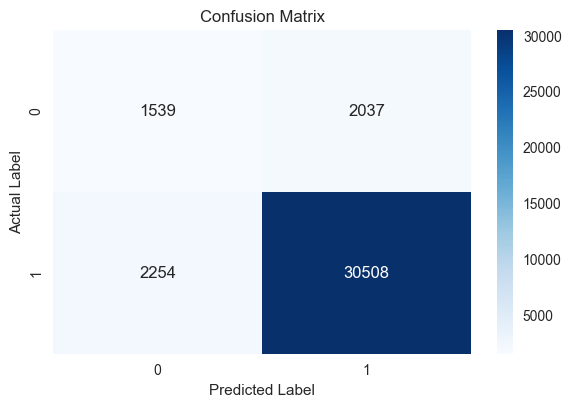

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(random_state = 42)
dt1.fit(X_train_o, y_train_o)

eval_classification(dt1)

# Confusion matrix

confusion(dt1)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.98
Recall (Train Set): 1.00
F1-Score (Test Set): 0.96
F1-Score (Train Set): 1.00
ROC_AUC (Test Set): 0.85
ROC_AUC (Train Set): 1.00
ROC_AUC (crossval train): 1.000
ROC_AUC (crossval test): 1.000
Accuracy: 92.39%
Precision (FP): 93.71%
Recall (FN): 98.14%
F1_Score (FP&FN): 95.87%
ROC_AUC: 85.00%
True Positives (TP): 32152
False Positives (FP): 2157
True Negatives (TN): 1419
False Negatives (FN): 610


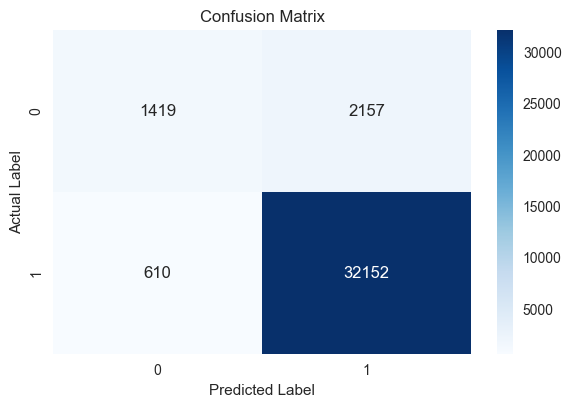

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train_o, y_train_o)

eval_classification(rf1)

confusion(rf1)

berdasarkan hasil ke 3 model machine learning didapatkan roc-auc yg baik yaitu menggunakan logistik regression

Assessing Discriminatory Power of the PD Model

In [129]:
#predicting
y_preds = logreg1.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.29      0.77      0.42      3576
           1       0.97      0.80      0.87     32762

    accuracy                           0.79     36338
   macro avg       0.63      0.78      0.65     36338
weighted avg       0.90      0.79      0.83     36338



In [130]:
y_hat_test_proba = logreg1.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

y_test_class_actual  y_hat_test_proba  y_hat_test
175418                    1          0.911443           1
44731                     1          0.687358           1
119577                    1          0.900619           1
78652                     1          0.464315           0
133263                    1          0.599744           1

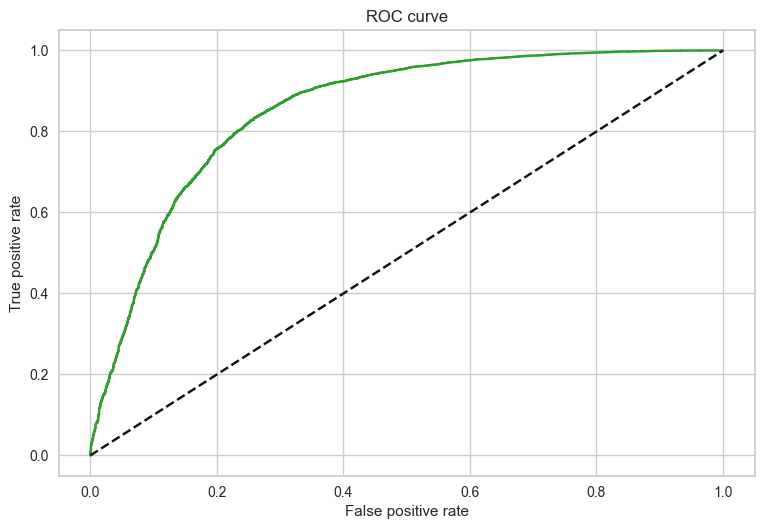

In [131]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [132]:
# Prediksi probabilitas menggunakan model
y_pred_proba = logreg1.predict_proba(X_test)

# Cetak hasil probabilitas
print("Predicted probabilities (y_pred_proba):")
print(y_pred_proba[:10])  # Menampilkan 10 hasil pertama

Predicted probabilities (y_pred_proba):
[[0.0885567  0.9114433 ]
 [0.31264195 0.68735805]
 [0.0993808  0.9006192 ]
 [0.53568514 0.46431486]
 [0.40025612 0.59974388]
 [0.77190011 0.22809989]
 [0.1869799  0.8130201 ]
 [0.23023364 0.76976636]
 [0.09694396 0.90305604]
 [0.55890645 0.44109355]]


Area Under ROC Curve (AUROC): 0.8532


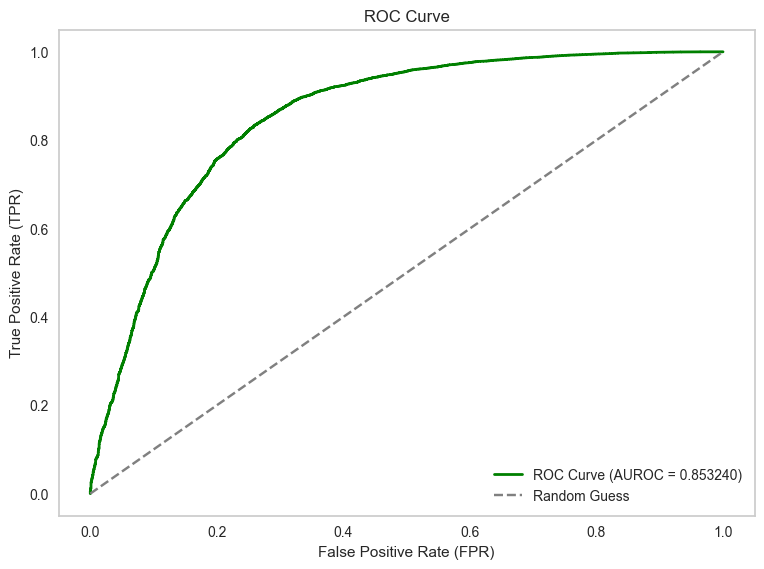

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan model sudah dilatih
logreg1.fit(X_train_o, y_train_o)

# Membuat DataFrame untuk menyimpan nilai aktual dan probabilitas prediksi
y_test_proba = pd.DataFrame({
    'y_test_class_actual': y_test,  # Nilai aktual (label sebenarnya)
    'y_hat_test_proba': logreg1.predict_proba(X_test)[:, 1]  # Probabilitas prediksi untuk kelas positif
})

# Menghitung AUROC
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
print(f"Area Under ROC Curve (AUROC): {AUROC:.4f}")

# Plot kurva ROC
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUROC = {AUROC:.6f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Gini

In [134]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Menghitung ROC-AUC
y_pred_proba = logreg1.predict_proba(X_test)  # Dapatkan probabilitas prediksi dari model
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # Menggunakan probabilitas kelas positif

# Menghitung Gini
gini = (roc_auc * 2) - 1

# Menampilkan hasil
print(f"ROC-AUC: {roc_auc:.6f}")
print(f"Gini: {gini:.6f}")

ROC-AUC: 0.853240
Gini: 0.706480


Interpretasi:
Nilai 0.847717 berarti model memiliki kemampuan yang cukup baik dalam membedakan antara bad loan dan good loan.
Nilai ROC-AUC yang mendekati 1 (lebih dari 0.8) menunjukkan bahwa model memiliki performa yang sangat baik dalam prediksi. Dengan nilai 0.847717, model dapat dengan tepat mengidentifikasi kemungkinan terjadinya bad loan pada sebagian besar kasus, memberikan indikasi bahwa model tersebut cukup andal dalam memprediksi risiko default.
Gini Coefficient (0.695434):

Definisi: Gini Coefficient adalah metrik yang berhubungan erat dengan ROC-AUC, mengukur ketidaksetaraan dalam distribusi probabilitas model. Nilai Gini dihitung sebagai dua kali area di bawah kurva ROC, dikurangi 1:
0 berarti model tidak dapat membedakan antara kelas positif dan negatif (sama dengan ROC-AUC 0.5).
1 berarti model sempurna dalam membedakan kedua kelas.
Interpretasi:
Nilai 0.695434 menunjukkan bahwa model memiliki kemampuan pemisahan yang sangat baik antara kelas positif dan negatif.
Nilai Gini yang lebih besar dari 0.6 sering dianggap menunjukkan bahwa model memiliki prediktor yang kuat dan dapat diandalkan untuk menangani ketidakseimbangan kelas.
Kesimpulan:
Dengan ROC-AUC sebesar 0.847717, model Anda memiliki kemampuan yang sangat baik dalam memisahkan bad loan dan good loan.
Nilai Gini sebesar 0.695434 lebih lanjut memperkuat temuan tersebut, menunjukkan bahwa model Anda sangat efektif dalam memprediksi probabilitas terjadinya bad loan dan meminimalkan kesalahan prediksi.

In [135]:
from scipy.stats import ks_2samp

# Ambil probabilitas kelas positif (kelas 1)
y_pred_proba = logreg1.predict_proba(X_test)[:, 1]

# Pisahkan probabilitas berdasarkan kelas asli (0 atau 1)
y_pred_1 = y_pred_proba[y_test == 1]  # Probabilitas untuk kelas 1 (positif)
y_pred_0 = y_pred_proba[y_test == 0]  # Probabilitas untuk kelas 0 (negatif)

# Hitung Kolmogorov-Smirnov Statistic
ks_statistic, p_value = ks_2samp(y_pred_1, y_pred_0)

# Menampilkan hasil KS Statistic dan p-value
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.6f}")
print(f"P-value: {p_value:.12f}")

Kolmogorov-Smirnov Statistic: 0.574822
P-value: 0.000000000000


Interpretasi:
Nilai KS = 0.565131 menunjukkan bahwa model dapat memisahkan kelas positif (bad loan) dan negatif (good loan) dengan cukup baik.
Biasanya, nilai KS lebih dari 0.3 dianggap cukup baik, sementara nilai yang lebih tinggi menunjukkan performa model yang lebih baik dalam membedakan antara kelas yang berbeda. Nilai 0.565131 ini menunjukkan bahwa model Anda memiliki kemampuan yang signifikan untuk membedakan antara bad loan dan good loan, dengan perbedaan yang cukup besar antara distribusi kelas.
P-value (0.000000):

Definisi: P-value digunakan untuk mengukur signifikansi statistik dari uji hipotesis yang dilakukan. Dalam hal ini, P-value digunakan untuk menguji apakah perbedaan distribusi kumulatif antara kelas yang diprediksi dan kelas aktual signifikan.
P-value rendah (biasanya di bawah 0.05 atau 0.01) menunjukkan bahwa perbedaan distribusi antara kelas positif dan negatif adalah signifikan secara statistik, artinya model Anda memang mampu membedakan antara kedua kelas.
Interpretasi:
P-value sebesar 0.000000 menunjukkan bahwa perbedaan distribusi antara bad loan dan good loan sangat signifikan. Ini berarti model Anda tidak hanya membedakan kedua kelas dengan baik, tetapi perbedaan tersebut tidak terjadi secara kebetulan atau karena faktor acak.
Kesimpulan:
Kolmogorov-Smirnov Statistic sebesar 0.565131 menunjukkan bahwa model memiliki kemampuan yang baik untuk membedakan antara bad loan dan good loan, dengan perbedaan yang cukup signifikan.
P-value yang sangat kecil (0.000000) mengindikasikan bahwa perbedaan antara distribusi kelas yang diprediksi dan distribusi aktual sangat signifikan, mengonfirmasi bahwa model Anda bekerja dengan baik dan tidak hanya memberikan hasil yang terjadi karena kebetulan.

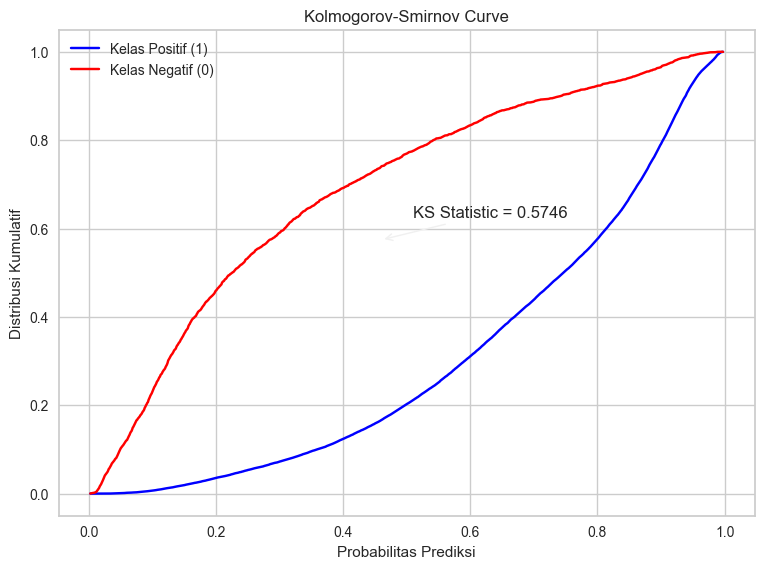

Kolmogorov-Smirnov Statistic: 0.574577


In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil probabilitas untuk kelas positif (kelas 1)
y_pred_proba = logreg1.predict_proba(X_test)[:, 1]

# Pisahkan berdasarkan kelas asli (0 atau 1)
y_true_1 = y_pred_proba[y_test == 1]  # Probabilitas untuk kelas 1 (positif)
y_true_0 = y_pred_proba[y_test == 0]  # Probabilitas untuk kelas 0 (negatif)

# Urutkan probabilitas untuk kelas positif dan negatif
sorted_y_true_1 = np.sort(y_true_1)
sorted_y_true_0 = np.sort(y_true_0)

# Hitung distribusi kumulatif untuk kelas positif dan negatif
cdf_1 = np.arange(1, len(sorted_y_true_1) + 1) / len(sorted_y_true_1)
cdf_0 = np.arange(1, len(sorted_y_true_0) + 1) / len(sorted_y_true_0)

# Tambahkan nilai 0 di awal untuk memulai kurva di titik (0,0)
cdf_1 = np.insert(cdf_1, 0, 0)
cdf_0 = np.insert(cdf_0, 0, 0)

# Untuk interpolasi, kita buat grid yang lebih halus untuk kedua kurva
from scipy.interpolate import interp1d

# Interpolasi kedua CDF ke titik yang sama untuk membandingkan
min_val = min(np.min(sorted_y_true_1), np.min(sorted_y_true_0))
max_val = max(np.max(sorted_y_true_1), np.max(sorted_y_true_0))
x_values = np.linspace(min_val, max_val, 1000)

# Interpolasi fungsi untuk kedua distribusi kumulatif
interp_cdf_1 = interp1d(sorted_y_true_1, cdf_1[1:], bounds_error=False, fill_value=(0, 1))
interp_cdf_0 = interp1d(sorted_y_true_0, cdf_0[1:], bounds_error=False, fill_value=(0, 1))

# Hitung nilai distribusi kumulatif pada grid yang sama
cdf_1_interp = interp_cdf_1(x_values)
cdf_0_interp = interp_cdf_0(x_values)

# Gambarkan kurva Kolmogorov-Smirnov
plt.figure(figsize=(8, 6))
plt.plot(x_values, cdf_1_interp, label='Kelas Positif (1)', color='blue')
plt.plot(x_values, cdf_0_interp, label='Kelas Negatif (0)', color='red')

# Tandai nilai perbedaan terbesar (KS Statistic)
ks_statistic = np.max(np.abs(cdf_1_interp - cdf_0_interp))
ks_x = x_values[np.argmax(np.abs(cdf_1_interp - cdf_0_interp))]
ks_y = np.max(np.abs(cdf_1_interp - cdf_0_interp))

plt.annotate(f'KS Statistic = {ks_statistic:.4f}', xy=(ks_x, ks_y), 
             xytext=(ks_x + 0.05, ks_y + 0.05),
             arrowprops=dict(arrowstyle="->", lw=1), fontsize=12)

# Menambahkan label dan judul
plt.xlabel('Probabilitas Prediksi')
plt.ylabel('Distribusi Kumulatif')
plt.title('Kolmogorov-Smirnov Curve')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan KS Statistic
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.6f}")

Kurva Biru (Kelas Positif / 1): Kurva ini mewakili distribusi kumulatif dari probabilitas prediksi untuk kelas positif. Semakin cepat kurva ini naik, semakin banyak kasus positif yang memiliki probabilitas tinggi.

Kurva Merah (Kelas Negatif / 0): Kurva ini mewakili distribusi kumulatif dari probabilitas prediksi untuk kelas negatif. Semakin cepat kurva ini naik, semakin banyak kasus negatif yang memiliki probabilitas tinggi.

KS Statistic = 0.5649: Nilai KS statistic mengukur perbedaan terbesar antara kedua kurva distribusi kumulatif. Dalam hal ini, nilai KS sebesar 0.5649 menunjukkan perbedaan yang cukup besar antara distribusi probabilitas untuk kelas positif dan negatif. Artinya, model ini dapat memisahkan kedua kelas dengan cukup baik.

Apa yang bisa disimpulkan?
Semakin besar nilai KS, semakin baik kemampuan model dalam memisahkan antara kelas positif dan negatif. Nilai KS mendekati 1 menunjukkan pemisahan yang sempurna antara kedua kelas.
Perbedaan yang lebih besar antara kedua kurva menunjukkan bahwa model lebih baik dalam membedakan antara kelas yang berbeda. Dalam hal ini, KS statistic 0.5649 menunjukkan pemisahan yang baik namun masih ada ruang untuk perbaikan.
Poin Penting:
KS statistic memberikan gambaran yang lebih jelas tentang seberapa baik model dapat membedakan antara kelas dengan memeriksa distribusi probabilitas yang diprediksi.
Grafik ini juga berguna dalam evaluasi model klasifikasi dan membantu dalam menentukan threshold untuk memisahkan prediksi kelas positif dan negatif.
Dengan KS statistic sebesar 0.5649, model ini cukup baik dalam memisahkan kedua kelas, namun perbaikan lebih lanjut dapat dilakukan untuk meningkatkan pemisahan tersebut.

### precision dan recall

Accuracy: 0.7944
Precision: 0.9694
Recall: 0.7971
F1 Score: 0.8748


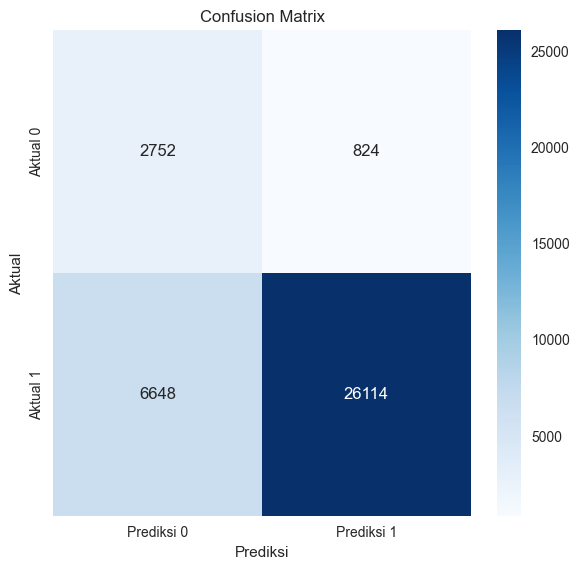

In [137]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan y_pred_proba adalah probabilitas prediksi untuk kelas positif (1)
# y_test adalah nilai aktual (ground truth)

# Tentukan threshold (misalnya 0.5)
threshold = 0.5

# Menghitung prediksi kelas berdasarkan threshold (y_pred_proba sudah berupa probabilitas untuk kelas 1)
y_pred_class = (y_pred_proba >= threshold).astype(int)

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

# Menghitung metrik-metrik lainnya
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# Menampilkan hasil metrik
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Visualisasi Confusion Matrix menggunakan heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi 0', 'Prediksi 1'], yticklabels=['Aktual 0', 'Aktual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Accuracy: 0.7944
Precision: 0.9694
Recall: 0.7971
F1 Score: 0.8748


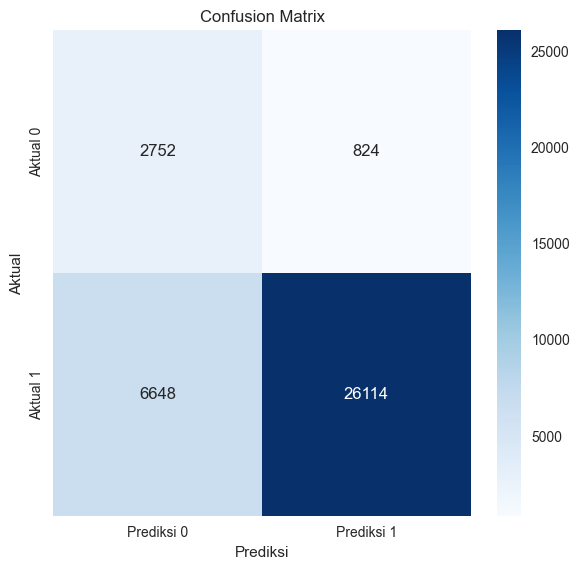

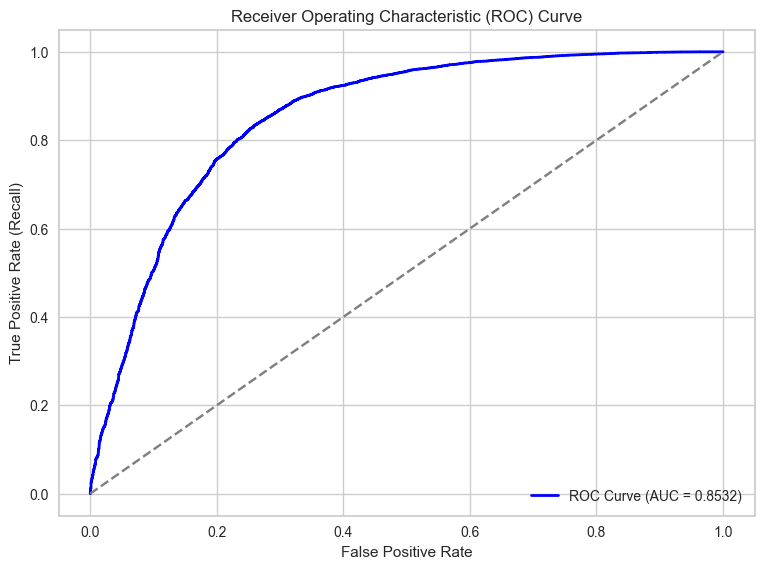

In [138]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan y_pred_proba adalah probabilitas prediksi untuk kelas positif (1)
# y_test adalah nilai aktual (ground truth)

# Tentukan threshold (misalnya 0.5)
threshold = 0.5

# Menghitung prediksi kelas berdasarkan threshold (y_pred_proba sudah berupa probabilitas untuk kelas 1)
y_pred_class = (y_pred_proba >= threshold).astype(int)

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

# Menghitung metrik-metrik lainnya
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# Menampilkan hasil metrik
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Visualisasi Confusion Matrix menggunakan heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi 0', 'Prediksi 1'], yticklabels=['Aktual 0', 'Aktual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # y_pred_proba adalah probabilitas kelas positif
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis acuan diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

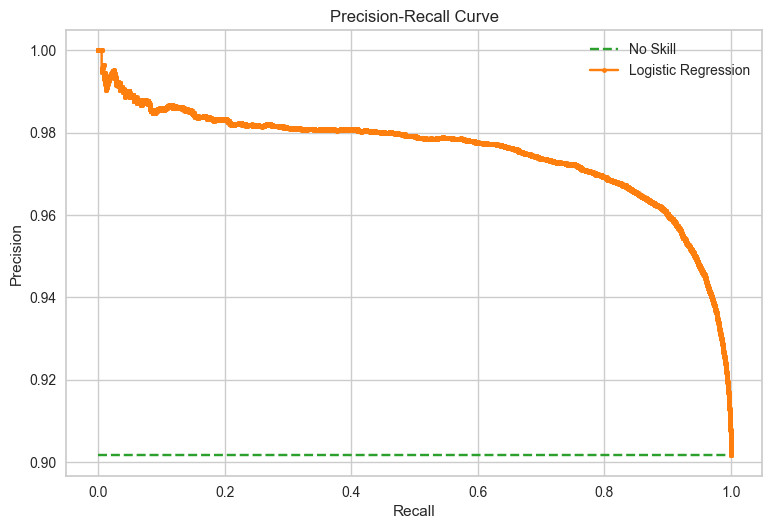

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Menghitung garis no-skill sebagai proporsi kelas positif
no_skill = len(y_test[y_test == 1]) / len(y_test)

# Plot garis no-skill pada PR Curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Menghitung precision, recall, dan thresholds untuk PR curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic Regression')

# Menambahkan label dan judul
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')

# Menampilkan plot
plt.show()

Grafik di atas adalah Precision-Recall Curve (PR Curve) yang menggambarkan performa model prediksi berdasarkan recall (sensitivitas) dan precision pada berbagai threshold probabilitas.

Interpretasi Grafik:
Garis Hijau (No Skill):

Garis horizontal hijau mewakili no-skill line, yang merupakan kinerja dari model yang hanya menebak berdasarkan proporsi kelas positif (di sini sekitar 0.90, artinya sekitar 90% dari data adalah kelas positif). Ini menunjukkan kinerja yang tidak lebih baik dari tebakan acak.
Kurva Orange (Logistic Regression):

Precision dimulai sangat tinggi di sebelah kiri (untuk recall yang sangat rendah) dan kemudian menurun seiring dengan peningkatan recall.
Pada recall rendah (yaitu ketika kita tidak banyak memprediksi positif), precision tetap sangat tinggi. Hal ini menunjukkan bahwa model sangat selektif dalam memprediksi kelas positif, sehingga hampir semua prediksi positif adalah benar (high precision).
Namun, ketika recall meningkat (model mulai memprediksi lebih banyak kelas positif), precision mulai turun. Ini adalah trade-off alami antara precision dan recall: semakin banyak prediksi positif yang dibuat, semakin banyak prediksi yang mungkin salah, menurunkan precision.
Celah Tajam:

Terlihat adanya penurunan tajam di bagian akhir grafik. Hal ini menunjukkan bahwa setelah titik tertentu, model lebih cenderung memprediksi semua data sebagai kelas positif, yang menyebabkan penurunan tajam dalam precision.
Perbandingan Kinerja:

Logistic Regression (kurva orange) jauh di atas garis no skill (hijau) sepanjang grafik, yang menunjukkan bahwa model tersebut bekerja lebih baik daripada model tebak-tebakan acak pada semua threshold.
Kesimpulan:
Model Logistic Regression memiliki kinerja yang sangat baik dalam hal precision dan recall, terutama di bagian awal kurva, namun ada trade-off saat recall meningkat.
Semakin besar nilai recall yang dicapai, semakin rendah precision-nya, namun model tetap lebih baik daripada model tanpa keterampilan (no skill) pada setiap threshold.
Jika Anda ingin mengevaluasi lebih lanjut kinerja model ini, Anda bisa menggunakan AUC (Area Under Curve) untuk mendapatkan ukuran yang lebih komprehensif tentang kualitas model pada berbagai threshold.

In [140]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9754045666944994

Nilai AUC-PR (Area Under the Precision-Recall Curve) sebesar 0.9744 menunjukkan bahwa model memiliki performa yang sangat baik dalam memprediksi kelas positif (1) dibandingkan dengan tebakan acak. Berikut adalah interpretasinya:

Interpretasi Nilai AUC-PR:
Mendekati 1 (0.9744):

Nilai ini sangat mendekati 1, yang berarti model secara konsisten memberikan kombinasi precision dan recall yang tinggi di berbagai threshold.
Semakin tinggi nilai AUC-PR, semakin baik kemampuan model untuk memisahkan kelas positif dari kelas negatif.
Konteks Precision-Recall:

Precision menggambarkan seberapa akurat model dalam memprediksi kelas positif.
Recall menggambarkan seberapa baik model menangkap semua instance dari kelas positif.
AUC-PR tinggi menunjukkan bahwa model mampu menjaga precision tinggi bahkan saat recall meningkat, yang ideal untuk dataset dengan ketidakseimbangan kelas.
Ketidakseimbangan Kelas:

Precision-Recall AUC lebih relevan daripada ROC-AUC untuk dataset yang memiliki kelas positif yang jarang (imbalanced dataset). Nilai 0.9744 menegaskan bahwa model ini bekerja sangat baik meskipun data kemungkinan memiliki ketidakseimbangan.
Kesimpulan:
Nilai AUC-PR 0.9744 menunjukkan bahwa model memiliki performa prediksi yang sangat baik, dengan kemampuan tinggi untuk menangkap kelas positif secara akurat di berbagai threshold probabilitas. Model ini sangat cocok digunakan pada masalah dengan kelas minoritas yang penting untuk diidentifikasi.

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membagi data menjadi train-test split (jika belum dilakukan)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data menggunakan scaler yang sama dengan data training
scaler = StandardScaler()
X_train_o = scaler.fit_transform(X_train)  # Data training yang sudah distandarisasi
X_test_o = scaler.transform(X_test)       # Data test yang distandarisasi

# Tetapkan y_test_o sebagai target dari data test
y_test_o = y_test

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fungsi evaluasi model
def eval_classification(model, X_test, y_test):
    # Prediksi pada data test
    y_pred = model.predict(X_test)
    
    # Menghitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Menampilkan hasil evaluasi
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

In [143]:
# Melakukan evaluasi pada data test
eval_classification(logreg1, X_test_o, y_test_o)

Accuracy: 0.4734
Precision: 0.9797
Recall: 0.4239
F1-Score: 0.5918


In [144]:
# Menghitung metrik evaluasi secara manual
from sklearn.metrics import classification_report

# Prediksi pada data test
y_pred = logreg1.predict(X_test_o)

# Menampilkan hasil evaluasi dengan classification report
print(classification_report(y_test_o, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.92      0.26      3623
           1       0.98      0.42      0.59     32715

    accuracy                           0.47     36338
   macro avg       0.57      0.67      0.43     36338
weighted avg       0.90      0.47      0.56     36338



In [145]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Prediksi probabilitas
y_proba = logreg1.predict_proba(X_test_o)[:, 1]  # Probabilitas untuk kelas positif (bad loan)

# 2. Tentukan threshold (misalnya, 0.5)
threshold = 0.5
y_pred_class = (y_proba >= threshold).astype(int)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test_o, y_pred_class)
tn, fp, fn, tp = cm.ravel()

# 4. Hitung metrik:
# Total pinjaman
total_loans = len(y_test_o)

# Persentase pinjaman baik dan berisiko
good_loans_percentage = (tn + fn) / total_loans * 100
bad_loans_percentage = (tp + fp) / total_loans * 100

# Persentase investasi pada pinjaman baik yang tersedia
invest_good_loans = tn / (tn + fn) * 100

# Rasio pinjaman berisiko yang dihindari terhadap pinjaman baik yang dihindari
bad_loans_avoided = tp
good_loans_avoided = fp
risk_to_good_ratio = bad_loans_avoided / (bad_loans_avoided + good_loans_avoided) * 100

# 5. Cetak hasil
print(f"Portofolio kita terdiri dari {good_loans_percentage:.2f}% pinjaman baik : {bad_loans_percentage:.2f}% pinjaman berisiko.")
print(f"Kita akan berinvestasi dalam {invest_good_loans:.2f}% dari pinjaman baik yang tersedia.")
print(f"Untuk setiap 100 pinjaman yang dihindari, {risk_to_good_ratio:.2f}% di antaranya adalah pinjaman berisiko.")


Portofolio kita terdiri dari 61.05% pinjaman baik : 38.95% pinjaman berisiko.
Kita akan berinvestasi dalam 15.04% dari pinjaman baik yang tersedia.
Untuk setiap 100 pinjaman yang dihindari, 97.97% di antaranya adalah pinjaman berisiko.


In [148]:
# Memeriksa panjang fitur dan koefisien
print("Jumlah fitur:", len(feature_names))
print("Jumlah koefisien:", len(logreg1.coef_[0]))

Jumlah fitur: 4
Jumlah koefisien: 88


In [150]:
# Memastikan koefisien berada dalam bentuk 1 dimensi
coefficients = logreg1.coef_.flatten()

# Ambil nama fitur dari DataFrame X_train (gunakan X_test jika menggunakan data uji)
feature_names = X_train.columns  # Jika X_train adalah DataFrame

# Pastikan panjang fitur dan koefisien cocok
print("Jumlah fitur:", len(feature_names))
print("Jumlah koefisien:", len(coefficients))

# Buat DataFrame untuk menampilkan koefisien
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# Urutkan berdasarkan nilai koefisien absolut untuk melihat fitur yang paling penting
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

Jumlah fitur: 88
Jumlah koefisien: 88
                                    Feature  Coefficient  Abs_Coefficient
40                       total_pymnt:>22000     6.136260         6.136260
39                  total_pymnt:16000-22000     4.447963         4.447963
30                      total_rec_int:>9000    -4.179011         4.179011
38                  total_pymnt:11000-16000     3.389473         3.389473
29                  total_rec_int:2000-9000    -2.496583         2.496583
84                          out_prncp:<3000    -2.032025         2.032025
37                   total_pymnt:5000-11000     2.019565         2.019565
41                          int_rate:<7.484     1.475353         1.475353
42                     int_rate:7.484-9.548     1.264915         1.264915
28                  total_rec_int:1000-2000    -1.227027         1.227027
43                    int_rate:9.548-11.612     1.095348         1.095348
75        mths_since_last_credit_pull_d:<65     0.987682         0.987682


In [151]:
# Ambil nama fitur setelah transformasi
from sklearn.compose import ColumnTransformer

# Misalkan transformer Anda adalah ColumnTransformer yang diterapkan pada X_train
# Dapatkan nama fitur dari kolom yang telah ditransformasi
feature_names = X_train.columns

# Pastikan jumlah kolom dan koefisien sesuai
coefficients = logreg1.coef_.flatten()